# Project 1

#### The methodology used in this project:

**CRIP-DM** (Cross-Industry Standard Process for Data Mining) 

<img src="https://raw.githubusercontent.com/E-man85/project1/main/02-Images/crisp_dm_image.png" width="600" height = "300">

### Load libraries

In [95]:
# Data exploration and visualization
if (!require("tidyverse")) install.packages("tidyverse")
library(tidyverse)
# Data vizualization
if (!require("ggplot2")) install.packages("ggplot2")
library(ggplot2)
# Creating tree maps
if (!require("treemap")) install.packages("treemap")
library(treemap)
# Provides functions that perform statistical procedures
if (!require("stats")) install.packages("stats")
library(stats)
# Extract and visualize the output of multiple analyzes of multivariate data
if (!require("factoextra")) install.packages("factoextra")
library(factoextra)
# Working with HTML in R
if (!require("htmltools")) install.packages("htmltools")
library(htmltools)
# Use of algorithm and its evaluation
if (!require("caret")) install.packages("caret")
library(caret) 
# ROC curves
if (!require("pROC")) install.packages("pROC")
library(pROC) 
# Random forest algorithm
if (!require("randomForest")) install.packages("randomForest")
library(randomForest)
# Create Queries in SQL
if (!require("sqldf")) install.packages("sqldf")
library(sqldf)
if (!require("rpart")) install.packages("rpart")
library(rpart)
library(rpart.plot)

## Business Understanding

#### Business Purpose:
> Online sale of various types of articles.
#### Business Goals:
> Increase sales through a customer-focused strategy.
> Understand customer behavior patterns.
#### Client Segmentation
> Division of Customers into distinct groups with the objective of allowing a differentiated approach strategy to each group.

#### Predict Next Order
> Predict which customers will buy again and what factors are related to the purchase.

## Data Understanding

The data provided were 5 .CSV files. 

We used "Pandas Profiling" to get a quick overview. [Check here](https://github.com/E-man85/project1/tree/main/04-PandasProfiling)

We repeated the analysis by loading the data into R-Studio and using the SQL language to perform queries

### Load csv data

In [98]:
url_dim_customer <- 'https://raw.githubusercontent.com/E-man85/project1/main/01-RawData/dim_customer.csv'
raw_customers <- read.csv(url_dim_customer)
rm(url_dim_customer)
url_dim_payments <- 'https://raw.githubusercontent.com/E-man85/project1/main/01-RawData/dim_payments.csv'
raw_payments <- read.csv(url_dim_payments)
rm(url_dim_payments)
url_dim_products <- 'https://raw.githubusercontent.com/E-man85/project1/main/01-RawData/dim_product.csv'
raw_products <- read.csv(url_dim_products)
rm(url_dim_products)
url_fct_orders <- 'https://raw.githubusercontent.com/E-man85/project1/main/01-RawData/fct_orders.csv'
raw_orders <- read.csv(url_fct_orders)
rm(url_fct_orders)
url_fct_order_item <- 'https://raw.githubusercontent.com/E-man85/project1/main/01-RawData/fct_order_item.csv'
raw_orders_item <- read.csv(url_fct_order_item)
rm(url_fct_order_item)

### Table raw_customer

This table is the dimension table that represents customer data. This has two columns, a customer_id column and a customer_unique_id column.

The customer_unique_id is unique and can have multiple customer_id records. 

It seems to us that for each order, there is a unique customer_id, using the raw_customers table we can see which were the real customers who bought a certain order.

#### Overview

In [99]:
# First lines of the table
head(raw_customers)
# Last lines of the table
tail(raw_customers)
# Table dimensions
dim(raw_customers)
# Types of table column variables
sapply(raw_customers, function(x) class(x)[1])
# Column data type
str(raw_customers)
# Verify na's
any(is.na(raw_customers))
# Check lines for missing values
raw_customers[apply(is.na(raw_customers), 1, any), ]
# Duplicate lines
any(duplicated(raw_customers))

,customer_id,customer_unique_id
,<chr>,<chr>
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0
2,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3
3,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e
4,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c
5,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066
6,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4


,customer_id,customer_unique_id
,<chr>,<chr>
99436,7fe2e80252a9ea476f950ae8f85b0f8f,4b5820135d360a45552b5163835b1d89
99437,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8
99438,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d
99439,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99
99440,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e
99441,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398


[1] 99441     2

customer_id customer_unique_id 
       "character"        "character"

'data.frame':	99441 obs. of  2 variables:
 $ customer_id       : chr  "06b8999e2fba1a1fbc88172c00ba8bc7" "18955e83d337fd6b2def6b18a428ac77" "4e7b3e00288586ebd08712fdd0374a03" "b2b6027bc5c5109e529d4dc6358b12c3" ...
 $ customer_unique_id: chr  "861eff4711a542e4b93843c6dd7febb0" "290c77bc529b7ac935b93aa66c333dc3" "060e732b5b29e8181a18229c7b0b2b5e" "259dac757896d24d7702b9acbbff3f3c" ...


[1] FALSE

customer_id,customer_unique_id
<chr>,<chr>


[1] FALSE

### Table raw_products

It is a dimension table that contains several columns about the products, such as the product category, height, length, width, product photos, among others.

#### Overview

In [4]:
# First lines of the table
head(raw_products)
# Last lines of the table
tail(raw_products)
# Table dimensions
dim(raw_products)
# Types of table column variables
sapply(raw_products, function(x) class(x)[1])
# Column data type
str(raw_products)
# Verify na's
any(is.na(raw_products))
# Check lines for missing values
raw_products[apply(is.na(raw_products), 1, any), ]
# Duplicate lines
any(duplicated(raw_products))

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40,287,1,225,16,10,14
2,3aa071139cb16b67ca9e5dea641aaa2f,artes,44,276,1,1000,30,18,20
3,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46,250,1,154,18,9,15
4,cef67bcfe19066a932b7673e239eb23d,bebes,27,261,1,371,26,4,26
5,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37,402,4,625,20,17,13
6,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60,745,1,200,38,5,11


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
32946,c4e71b64511b959455e2107fe7859020,utilidades_domesticas,59,1371,2,200,18,15,15
32947,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45,67,2,12300,40,40,40
32948,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41,971,1,1700,16,19,16
32949,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50,799,1,1400,27,7,27
32950,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60,156,2,700,31,13,20
32951,106392145fca363410d287a815be6de4,cama_mesa_banho,58,309,1,2083,12,2,7


[1] 32951     9

product_id      product_category_name 
               "character"                "character" 
       product_name_lenght product_description_lenght 
                 "integer"                  "integer" 
        product_photos_qty           product_weight_g 
                 "integer"                  "integer" 
         product_length_cm          product_height_cm 
                 "integer"                  "integer" 
          product_width_cm 
                 "integer"

'data.frame':	32951 obs. of  9 variables:
 $ product_id                : chr  "1e9e8ef04dbcff4541ed26657ea517e5" "3aa071139cb16b67ca9e5dea641aaa2f" "96bd76ec8810374ed1b65e291975717f" "cef67bcfe19066a932b7673e239eb23d" ...
 $ product_category_name     : chr  "perfumaria" "artes" "esporte_lazer" "bebes" ...
 $ product_name_lenght       : int  40 44 46 27 37 60 56 56 57 36 ...
 $ product_description_lenght: int  287 276 250 261 402 745 1272 184 163 1156 ...
 $ product_photos_qty        : int  1 1 1 1 4 1 4 2 1 1 ...
 $ product_weight_g          : int  225 1000 154 371 625 200 18350 900 400 600 ...
 $ product_length_cm         : int  16 30 18 26 20 38 70 40 27 17 ...
 $ product_height_cm         : int  10 18 9 4 17 5 24 8 13 10 ...
 $ product_width_cm          : int  14 20 15 26 13 11 44 40 17 12 ...


[1] TRUE

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
106,a41e356c76fab66334f36de622ecbd3a,,NA,NA,NA,650,17,14,12
129,d8dee61c2034d6d075997acef1870e9b,,NA,NA,NA,300,16,7,20
146,56139431d72cd51f19eb9f7dae4d1617,,NA,NA,NA,200,20,20,20
155,46b48281eb6d663ced748f324108c733,,NA,NA,NA,18500,41,30,41
198,5fb61f482620cb672f5e586bb132eae9,,NA,NA,NA,300,35,7,12
245,e10758160da97891c2fdcbc35f0f031d,,NA,NA,NA,2200,16,2,11
295,39e3b9b12cd0bf8ee681bbc1c130feb5,,NA,NA,NA,300,16,7,11
300,794de06c32a626a5692ff50e4985d36f,,NA,NA,NA,300,18,8,14
348,7af3e2da474486a3519b0cba9dea8ad9,,NA,NA,NA,200,22,14,14


[1] FALSE

#### Check records without product_category_name, and Replace with string 'undefined'

In [5]:
# Check records 
raw_products %>% 
  group_by(product_category_name) %>% 
  summarise(cont_registos = n()) %>% 
  filter(product_category_name == '')
# Replace with string 'undefined'
raw_products <- raw_products %>%
  mutate(product_category_name = if_else(is.na(product_category_name) | product_category_name == "", "undefined", product_category_name))
# Confirmation of change
raw_products %>% 
  group_by(product_category_name) %>% 
  summarise(cont_registos = n()) %>% 
  filter(product_category_name == 'undefined')

product_category_name,cont_registos
<chr>,<int>
,610


product_category_name,cont_registos
<chr>,<int>
undefined,610


#### Check existing product categories

In [6]:
Query_NumberOfProductsPerCategory <- raw_products %>% group_by(product_category_name) %>% 
  summarise(nr_of_products = n()) %>% 
  arrange(desc(nr_of_products))

Query_NumberOfProductsPerCategory

product_category_name,nr_of_products
<chr>,<int>
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
automotivo,1900
informatica_acessorios,1639
brinquedos,1411
relogios_presentes,1329


#### See the previous result in a Tree Map

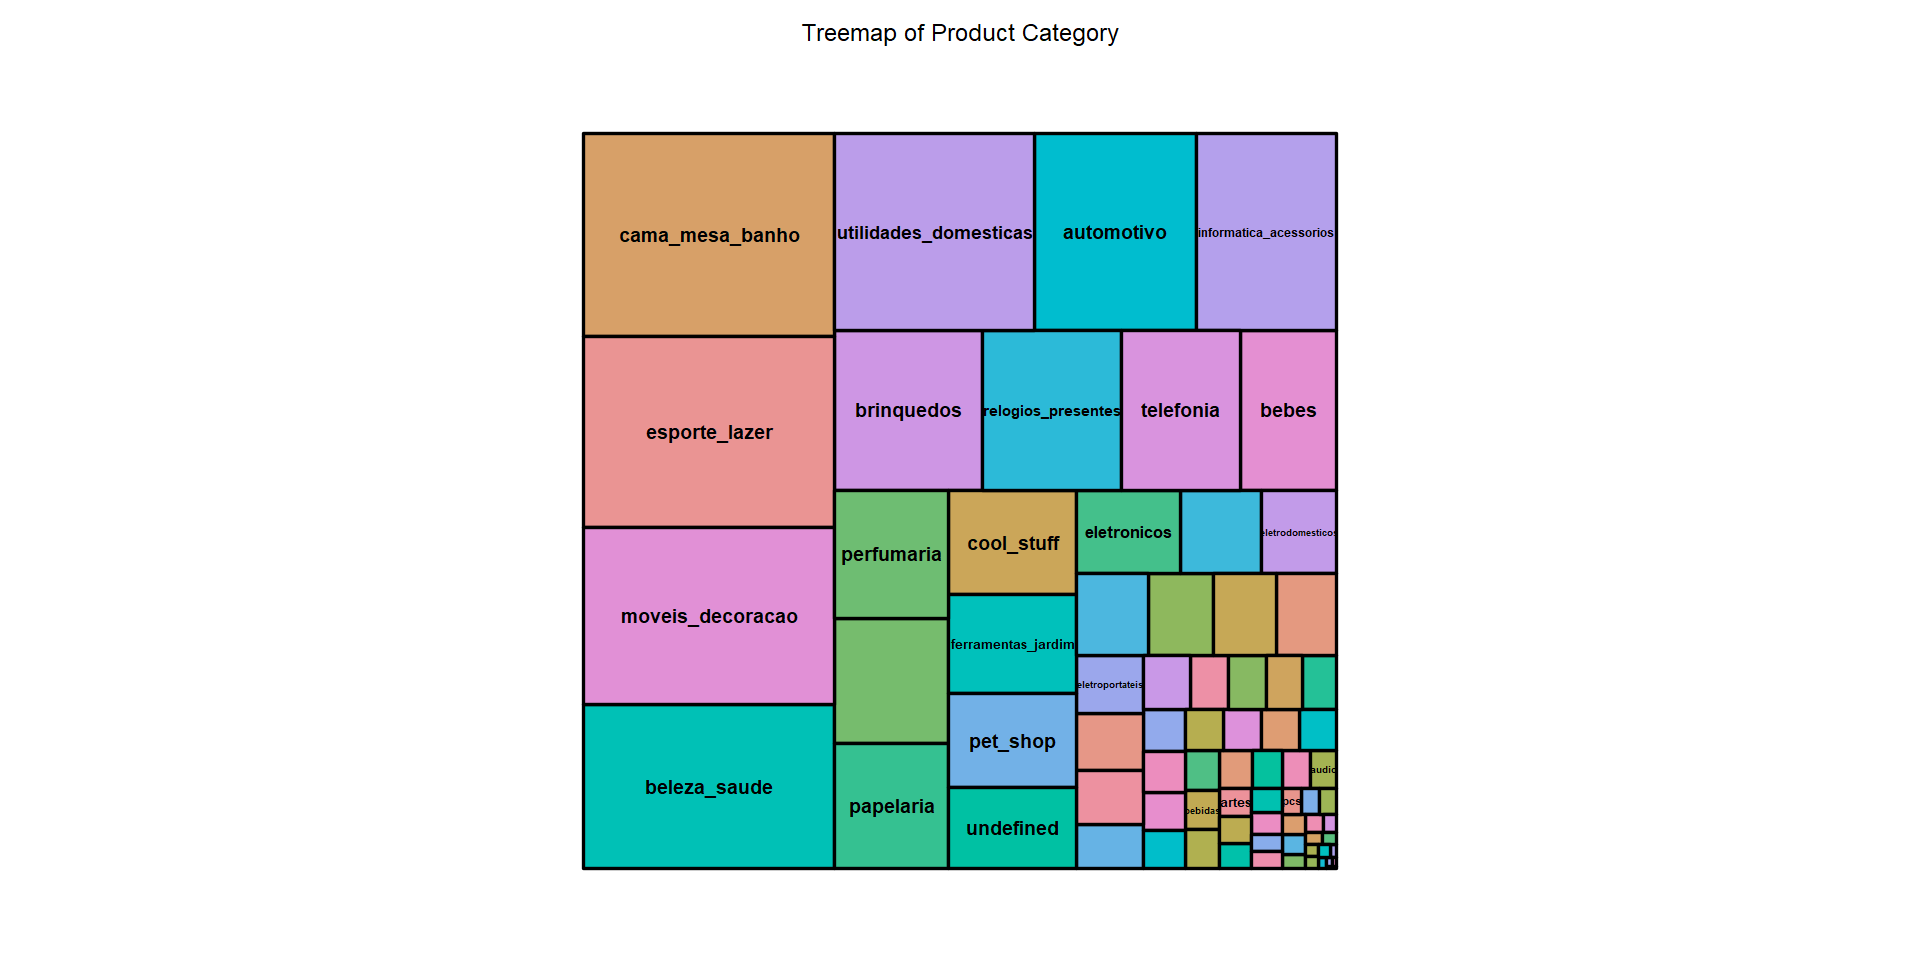

In [37]:
options(repr.plot.width=16, repr.plot.height=8)
treemap(Query_NumberOfProductsPerCategory, 
        index=c("product_category_name"), 
        vSize="nr_of_products", 
        type="index",
        title="Treemap of Product Category")

### Table raw_pyments

This table refers to the payments made for the order table, many times an order had multiple payments, we believe that this is due to the fact that the company allows the sale of products on credit, which will generate multiple payments subsequent to the purchase of a certain product .

Some relevant information:
- Order_id is not unique there are 103886 records and 99440 unique values
- Payment_sequential is the sequence of payments for each order_id, there are 3039 with sequence different from 1, it means that there are at least 2 payment lines on the order_id.
- Payment_type There are 5 payment types “not_defined” ,“boleto”, “debit_card”, “voucher” ,“credit_card”
- Payment_installments , payment installments , defined when there is the first order record in this table, with type_payment= credit_card. 
There is a record (744bade1fcf9ff3f31d860ace076d422) with payment_installments = 0.
- Payment_value is the value of each payment line, with values ​​between 0 and 13664.08, 9 records with column = 0.
- In the table there are 103886 records, there are no duplicate rows

#### Overview

In [8]:
# First lines of the table
head(raw_payments)
# Last lines of the table
tail(raw_payments)
# Table dimensions
dim(raw_payments)
# Types of table column variables
sapply(raw_payments, function(x) class(x)[1])
# Column data type
str(raw_payments)
# Verify na's
any(is.na(raw_payments))
# Check lines for missing values
raw_payments[apply(is.na(raw_payments), 1, any), ]
# Duplicate lines
any(duplicated(raw_payments))

,order_id,payment_sequential,payment_type,payment_installments,payment_value
,<chr>,<int>,<chr>,<int>,<dbl>
1,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
2,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
3,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
5,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
6,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12


,order_id,payment_sequential,payment_type,payment_installments,payment_value
,<chr>,<int>,<chr>,<int>,<dbl>
103881,7159096c5aa9be77f7f0c26c01ee9793,1,credit_card,4,280.65
103882,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103883,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103884,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103885,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54
103886,28bbae6599b09d39ca406b747b6632b1,1,boleto,1,191.58


[1] 103886      5

order_id   payment_sequential         payment_type 
         "character"            "integer"          "character" 
payment_installments        payment_value 
           "integer"            "numeric"

'data.frame':	103886 obs. of  5 variables:
 $ order_id            : chr  "b81ef226f3fe1789b1e8b2acac839d17" "a9810da82917af2d9aefd1278f1dcfa0" "25e8ea4e93396b6fa0d3dd708e76c1bd" "ba78997921bbcdc1373bb41e913ab953" ...
 $ payment_sequential  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ payment_type        : chr  "credit_card" "credit_card" "credit_card" "credit_card" ...
 $ payment_installments: int  8 1 1 8 2 2 1 3 6 1 ...
 $ payment_value       : num  99.3 24.4 65.7 107.8 128.4 ...


[1] FALSE

order_id,payment_sequential,payment_type,payment_installments,payment_value
<chr>,<int>,<chr>,<int>,<dbl>


[1] FALSE

#### View records by payment sequential

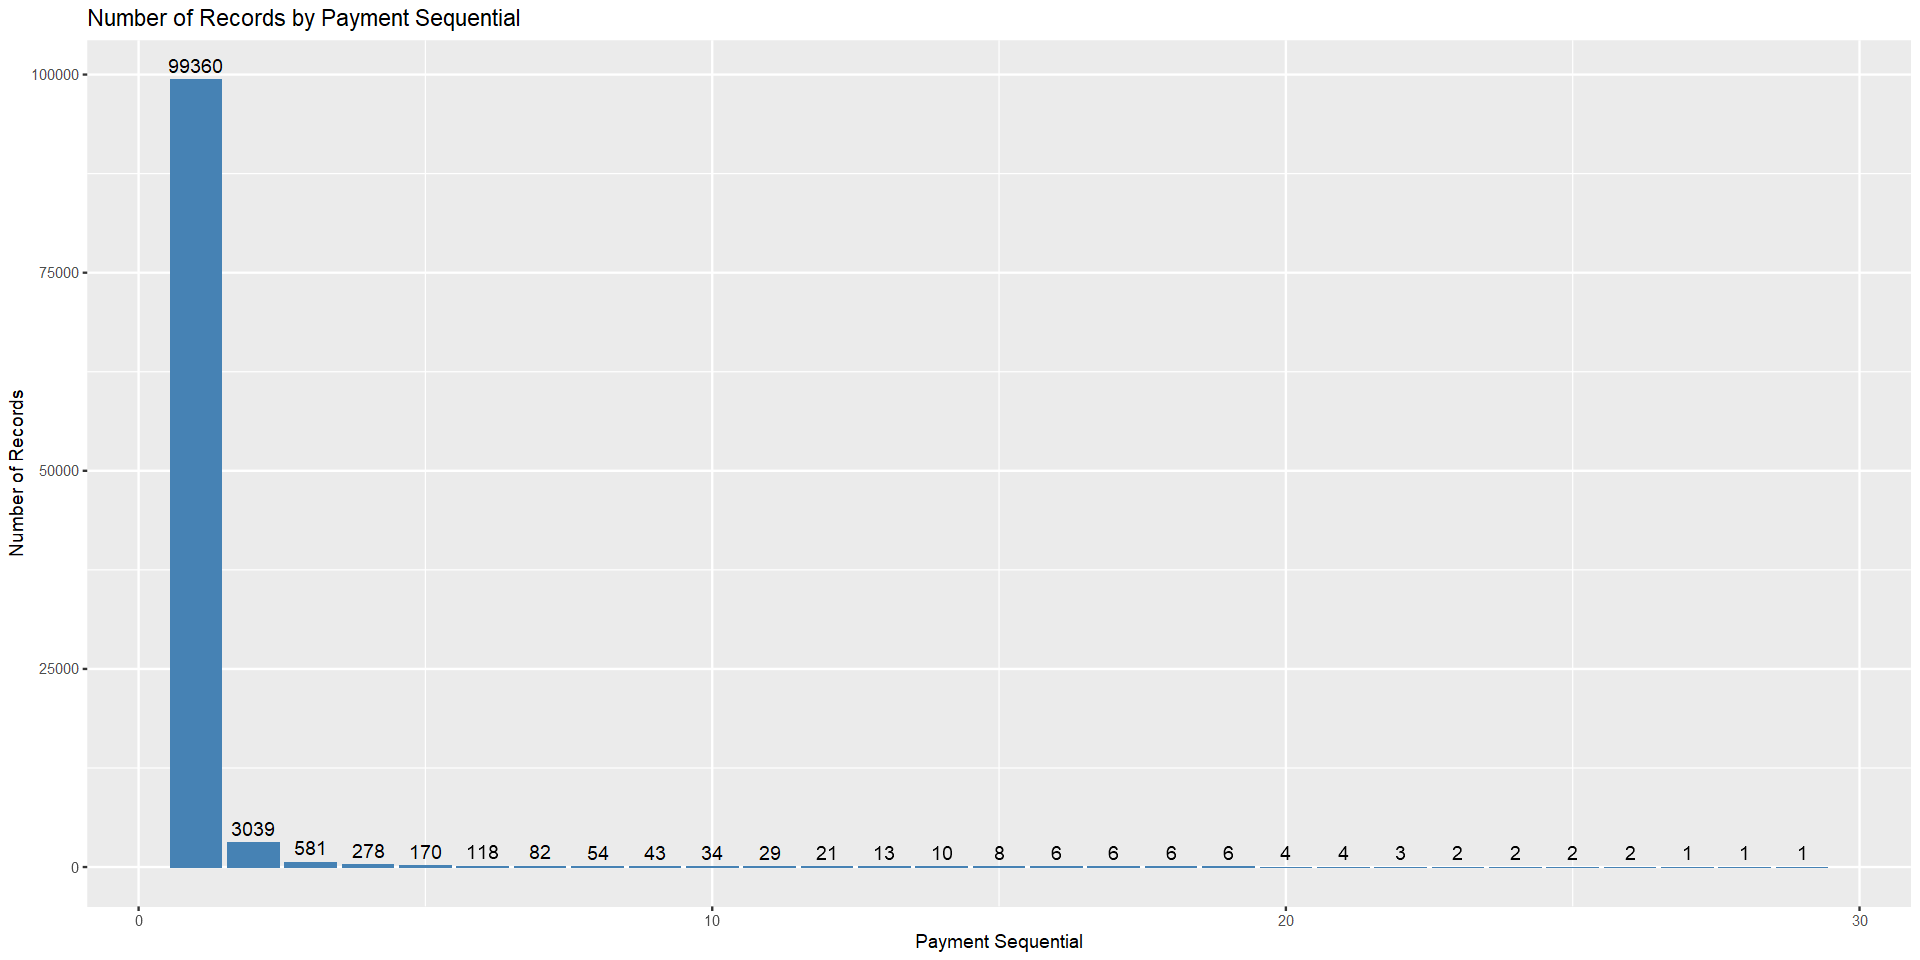

In [38]:
raw_payments %>% 
  group_by(payment_sequential) %>% 
  summarise(nr_of_records = n()) %>% 
  ggplot(aes(x = payment_sequential, y = nr_of_records)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  geom_text(aes(label = nr_of_records), vjust = -0.5) +
  xlab("Payment Sequential") +
  ylab("Number of Records") +
  ggtitle("Number of Records by Payment Sequential") 

#### Check that there are orders_id(82) that do not have payment_sequential = 1

In [10]:
raw_payments %>% 
  group_by(order_id) %>% 
  mutate(min_payment_sequential = min(payment_sequential),
         max_payment_sequential = max(payment_sequential)) %>% 
  select(order_id, min_payment_sequential,max_payment_sequential) %>% 
  filter(min_payment_sequential != 1)

order_id,min_payment_sequential,max_payment_sequential
<chr>,<int>,<int>
900fac51d850dfc38fceb9c413441c67,2,2
510bff1cf06be1143d3b6698df2fd486,2,2
d7d9f1ff0b6aa62f2d4e7fc99e60e8ea,2,2
cfa1591318ed6c901b0c80debfd4b811,2,2
e17ed9c20d79f29256a4a514e8d07230,2,2
c3a4760791fe90fe58b360dbfc812805,2,2
9769f28d910e7304d7bf0fcd32d8ecd6,2,2
615915458e5cdf8939ae422e043ca879,2,2
f5691c2b1ca263490374d13d020bd950,2,2


#### Number of Records by Payment Type

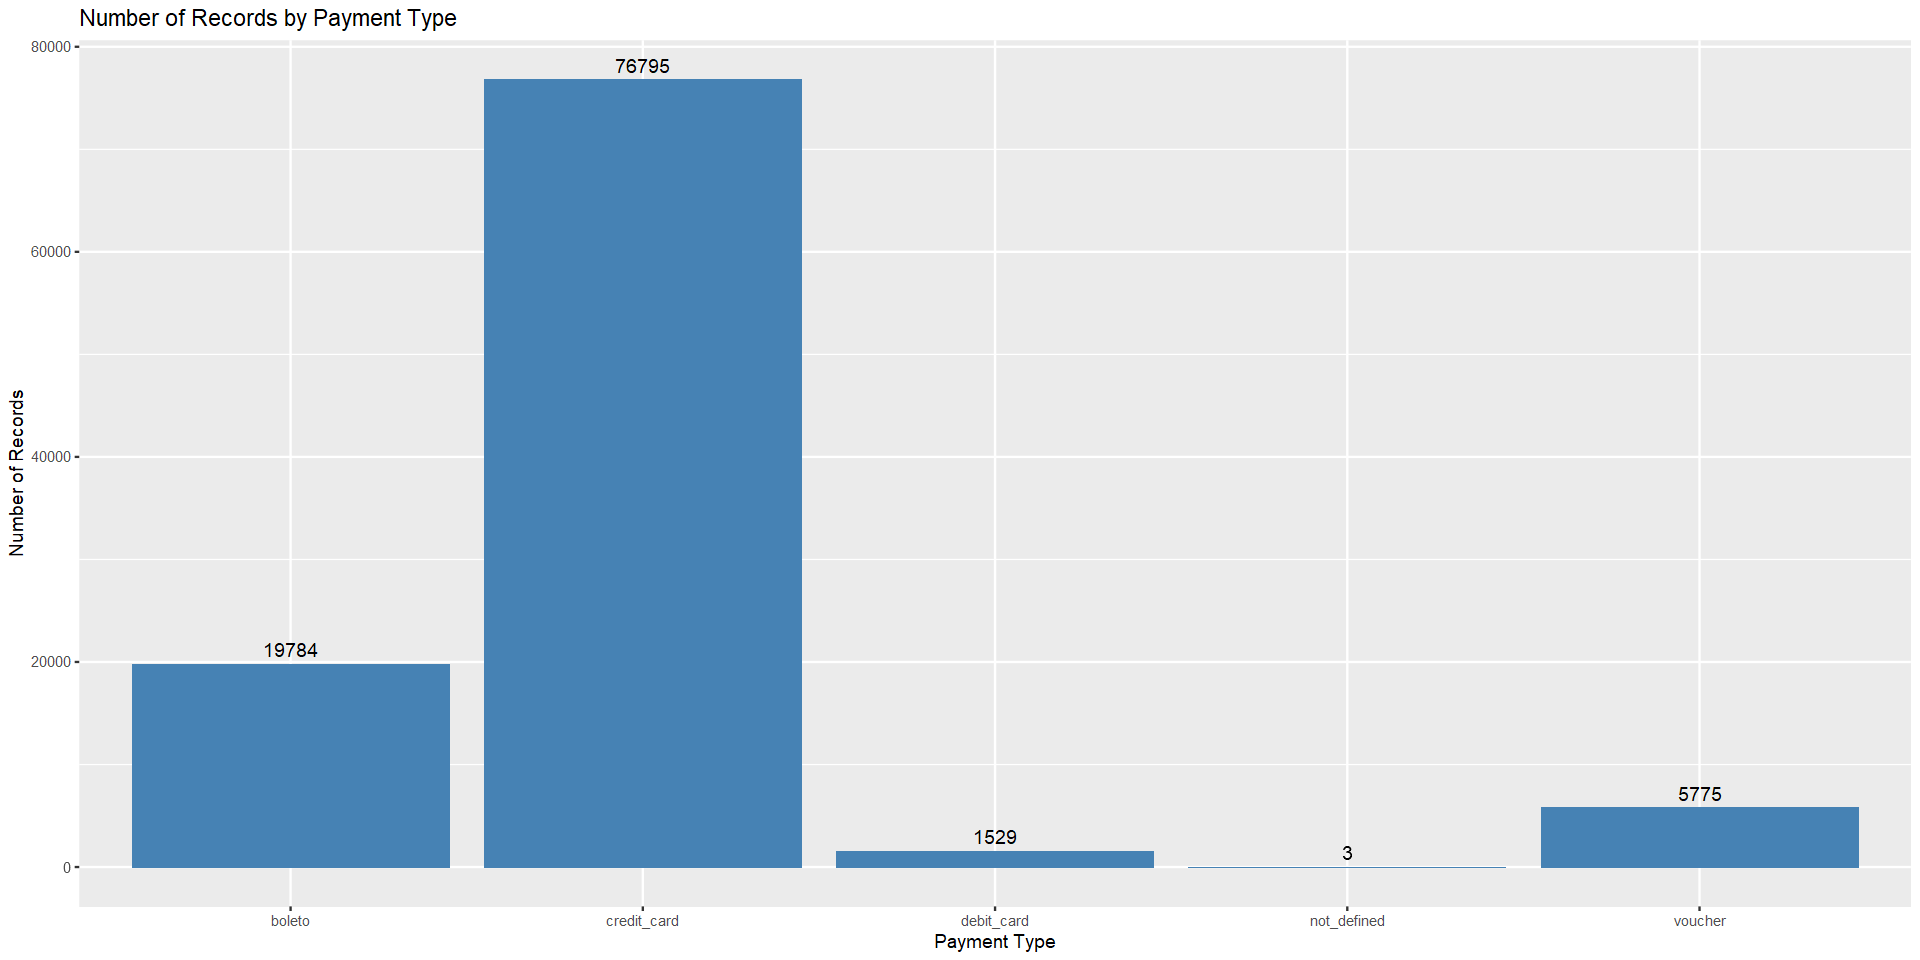

In [39]:
raw_payments %>% 
  group_by(payment_type) %>% 
  summarise(nr_of_records = n()) %>% 
  ggplot(aes(x = payment_type, y = nr_of_records)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  geom_text(aes(label = nr_of_records), vjust = -0.5) +
  xlab("Payment Type") +
  ylab("Number of Records") +
  ggtitle("Number of Records by Payment Type") 

#### Number of Orders by Number of Payment Types

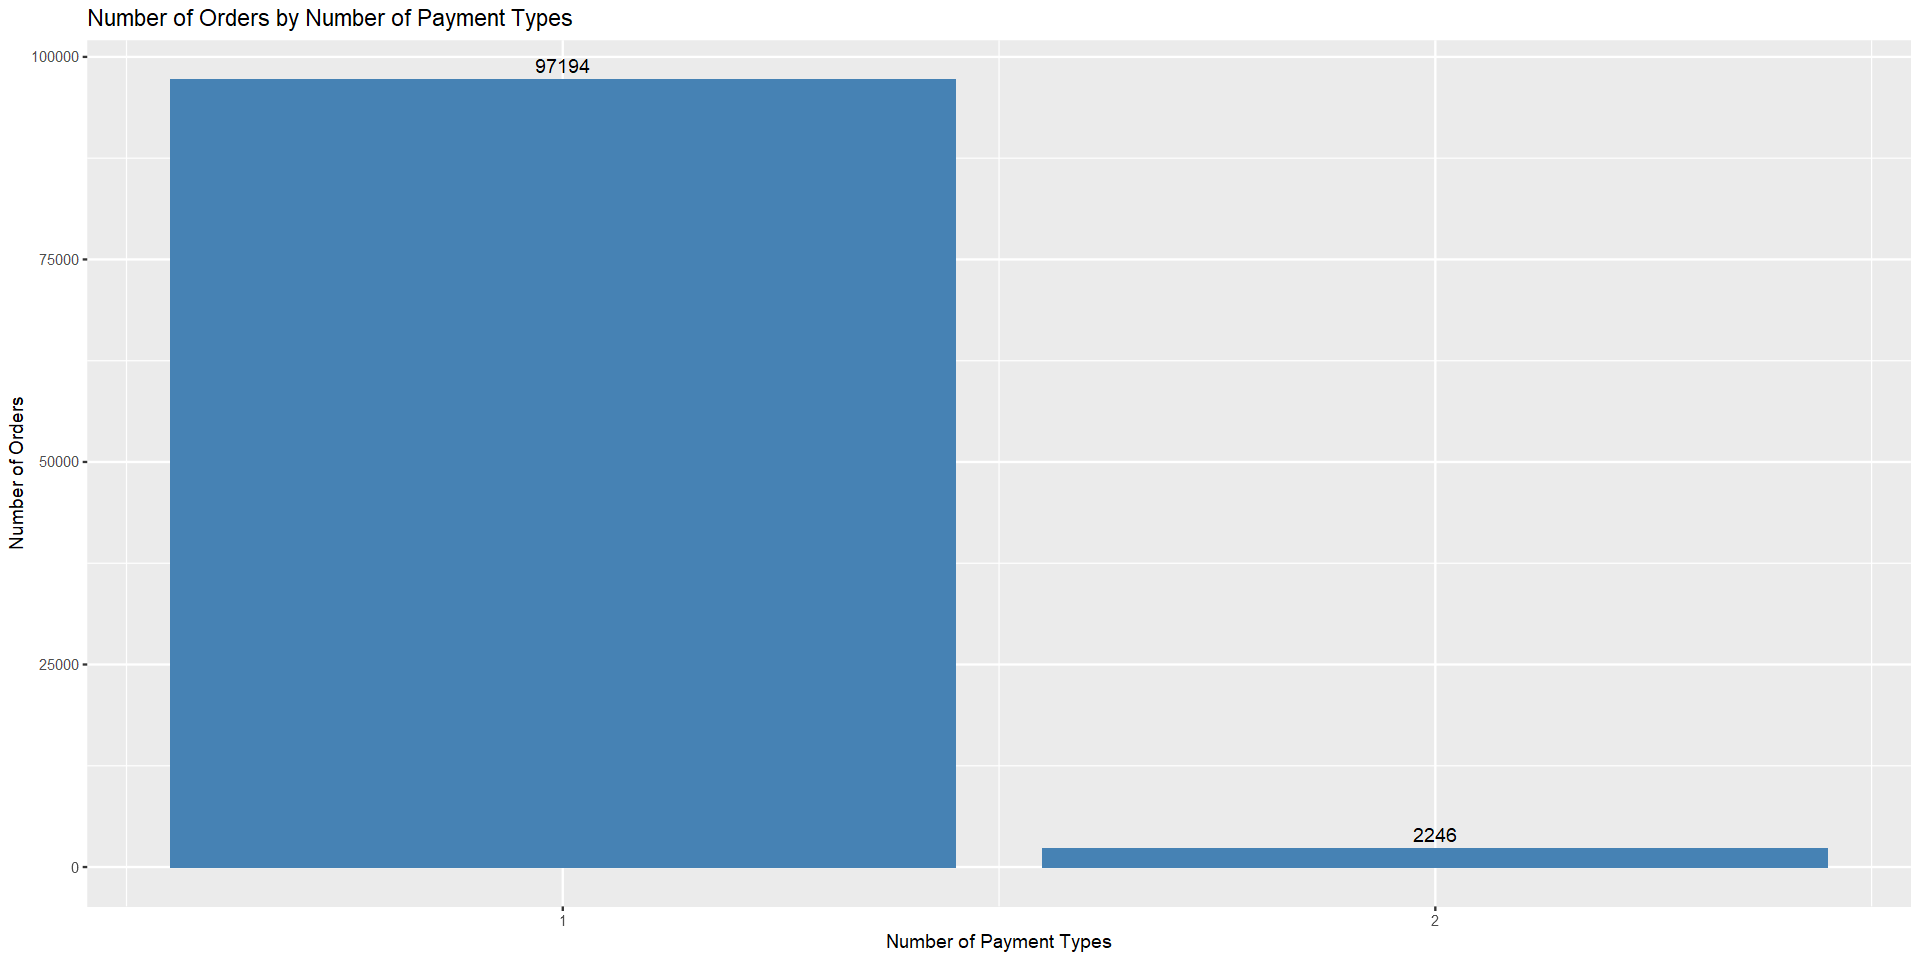

In [40]:
raw_payments %>% 
  group_by(order_id) %>% 
  summarise(nr_of_payments_type = n_distinct(payment_type)) %>% 
  group_by(nr_of_payments_type) %>% 
  summarise(nr_of_orders = n()) %>% 
  ggplot(aes(x = nr_of_payments_type, y = nr_of_orders)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  geom_text(aes(label = nr_of_orders), vjust = -0.5) +
  scale_x_continuous(breaks = 1:2)+
  labs(x = "Number of Payment Types", y = "Number of Orders", 
       title = "Number of Orders by Number of Payment Types")

#### Number of Orders by Payment Installments

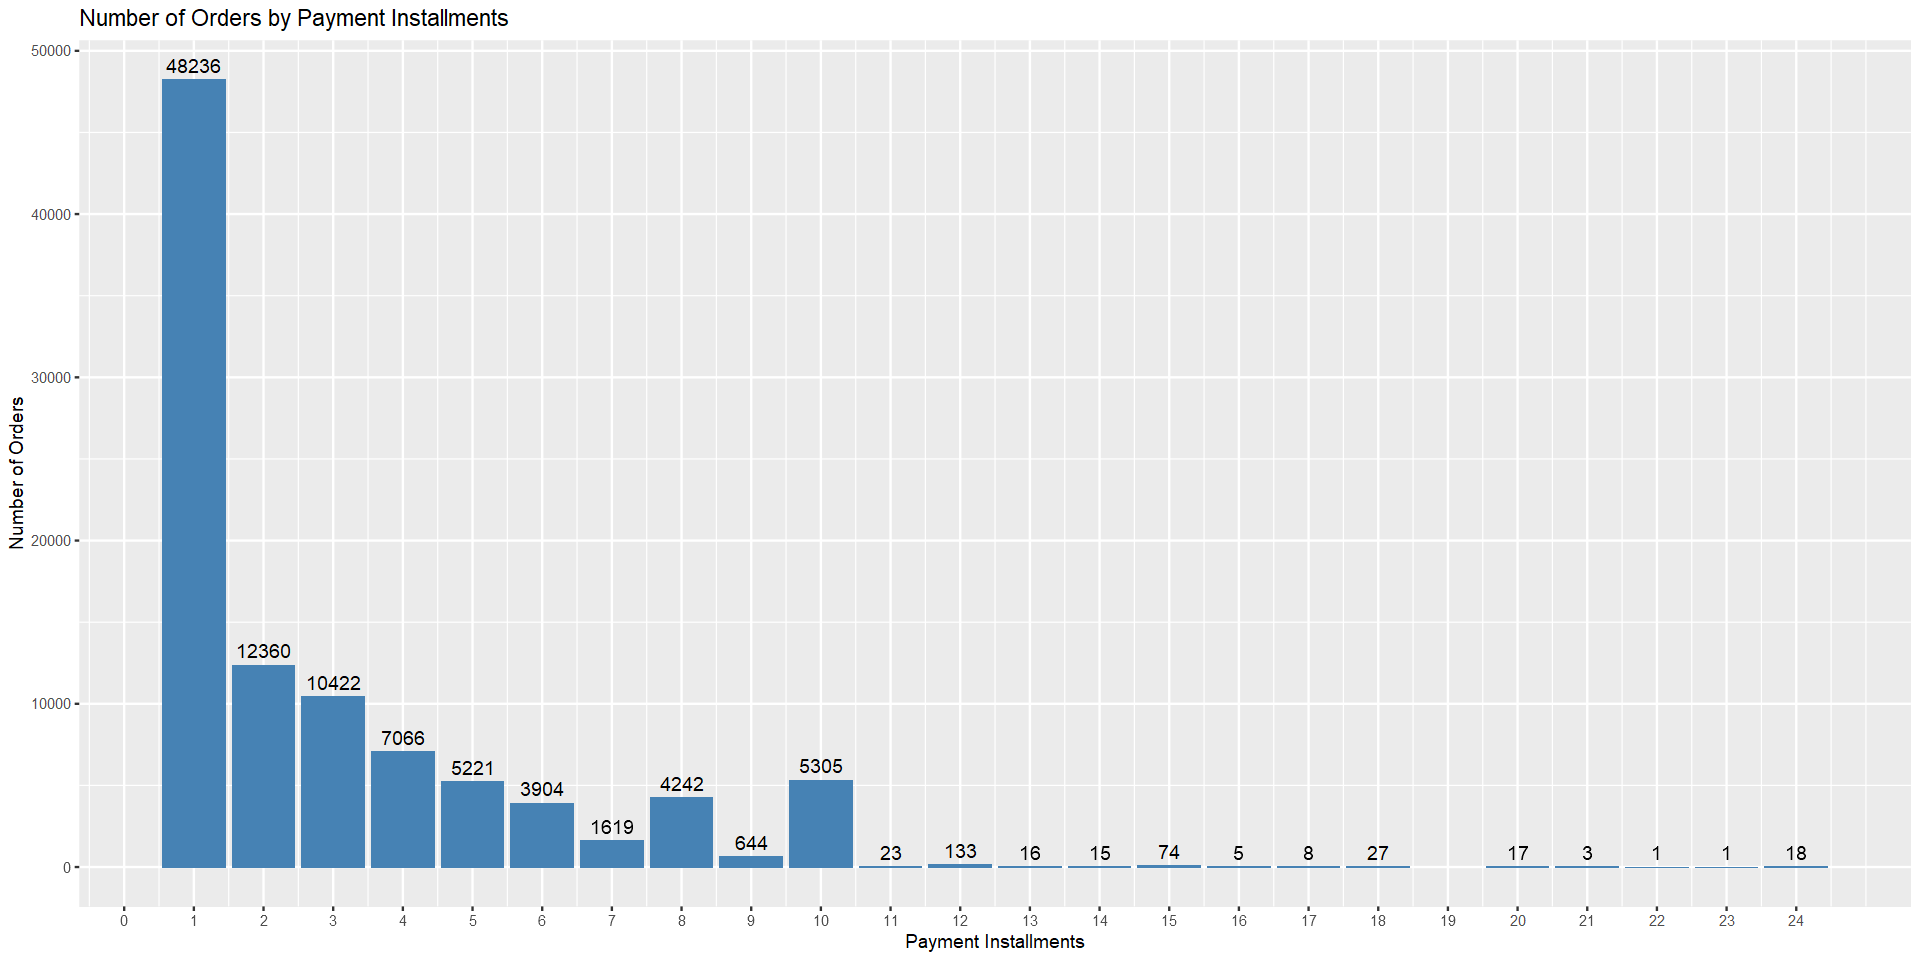

In [41]:
raw_payments %>% 
  select(order_id, payment_sequential,payment_installments) %>% 
  filter(payment_sequential ==1) %>% 
  group_by(order_id) %>% 
  summarise(payment_installments = max(payment_installments)) %>% 
  group_by(payment_installments) %>% 
  summarise(nr_of_orders = n()) %>% 
  ggplot(aes(x = payment_installments, y = nr_of_orders)) +
  geom_col(fill = "steelblue") +
  geom_text(aes(label = nr_of_orders), vjust = -0.5) +
  xlab("Payment Installments") +
  ylab("Number of Orders") +
  ggtitle("Number of Orders by Payment Installments") +
  scale_x_continuous(breaks = seq(0, 24, by = 1))

### Table raw_orders

It is a table that refers to the referring products of the Order ID.

Table Columns:
1. Order_id - A non-unique field that refers to the order of the field.
2. Order_item_id - A unique field for each order, which refers to each product, the last number per order. The same product, if it has a quantity of 3, will appear repeated 3 times.
3. Product_id - Each order can have multiple products, the product_id is not unique in this table, there are 32951 values.
4. Seller_id - The seller is similar to the product_id, there are 3095 values.

#### Overview

In [14]:
# First lines of the table
head(raw_orders)
# Last lines of the table
tail(raw_orders)
# Table dimensions
dim(raw_orders)
# Types of table column variables
sapply(raw_orders, function(x) class(x)[1])
# Column data type
str(raw_orders)
# Verify na's
any(is.na(raw_orders))
# Check lines for missing values
raw_orders[apply(is.na(raw_orders), 1, any), ]
# Duplicate lines
any(duplicated(raw_orders))

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
2,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
3,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
4,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
5,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
6,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
99436,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22 00:00:00
99437,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99438,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99439,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99440,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00
99441,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00


[1] 99441     8

order_id                   customer_id 
                  "character"                   "character" 
                 order_status      order_purchase_timestamp 
                  "character"                   "character" 
            order_approved_at  order_delivered_carrier_date 
                  "character"                   "character" 
order_delivered_customer_date order_estimated_delivery_date 
                  "character"                   "character"

'data.frame':	99441 obs. of  8 variables:
 $ order_id                     : chr  "e481f51cbdc54678b7cc49136f2d6af7" "53cdb2fc8bc7dce0b6741e2150273451" "47770eb9100c2d0c44946d9cf07ec65d" "949d5b44dbf5de918fe9c16f97b45f8a" ...
 $ customer_id                  : chr  "9ef432eb6251297304e76186b10a928d" "b0830fb4747a6c6d20dea0b8c802d7ef" "41ce2a54c0b03bf3443c3d931a367089" "f88197465ea7920adcdbec7375364d82" ...
 $ order_status                 : chr  "delivered" "delivered" "delivered" "delivered" ...
 $ order_purchase_timestamp     : chr  "2017-10-02 10:56:33" "2018-07-24 20:41:37" "2018-08-08 08:38:49" "2017-11-18 19:28:06" ...
 $ order_approved_at            : chr  "2017-10-02 11:07:15" "2018-07-26 03:24:27" "2018-08-08 08:55:23" "2017-11-18 19:45:59" ...
 $ order_delivered_carrier_date : chr  "2017-10-04 19:55:00" "2018-07-26 14:31:00" "2018-08-08 13:50:00" "2017-11-22 13:39:59" ...
 $ order_delivered_customer_date: chr  "2017-10-10 21:25:13" "2018-08-07 15:27:45" "2018-08-17 18:06:29" "20

[1] FALSE

order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>


[1] FALSE

#### Transform data type to date of columns:
- order_purchase_timestamp
- order_approved_at
- order_delivered_carrier_date
- order_delivered_customer_date
- order_estimated_delivery_date

In [15]:
raw_orders <- raw_orders %>%
  mutate(across(c(order_purchase_timestamp, order_approved_at, order_delivered_carrier_date,
                  order_delivered_customer_date, order_estimated_delivery_date), lubridate::as_date))
str(raw_orders)

'data.frame':	99441 obs. of  8 variables:
 $ order_id                     : chr  "e481f51cbdc54678b7cc49136f2d6af7" "53cdb2fc8bc7dce0b6741e2150273451" "47770eb9100c2d0c44946d9cf07ec65d" "949d5b44dbf5de918fe9c16f97b45f8a" ...
 $ customer_id                  : chr  "9ef432eb6251297304e76186b10a928d" "b0830fb4747a6c6d20dea0b8c802d7ef" "41ce2a54c0b03bf3443c3d931a367089" "f88197465ea7920adcdbec7375364d82" ...
 $ order_status                 : chr  "delivered" "delivered" "delivered" "delivered" ...
 $ order_purchase_timestamp     : Date, format: "2017-10-02" "2018-07-24" ...
 $ order_approved_at            : Date, format: "2017-10-02" "2018-07-26" ...
 $ order_delivered_carrier_date : Date, format: "2017-10-04" "2018-07-26" ...
 $ order_delivered_customer_date: Date, format: "2017-10-10" "2018-08-07" ...
 $ order_estimated_delivery_date: Date, format: "2017-10-18" "2018-08-13" ...


#### View order number by year

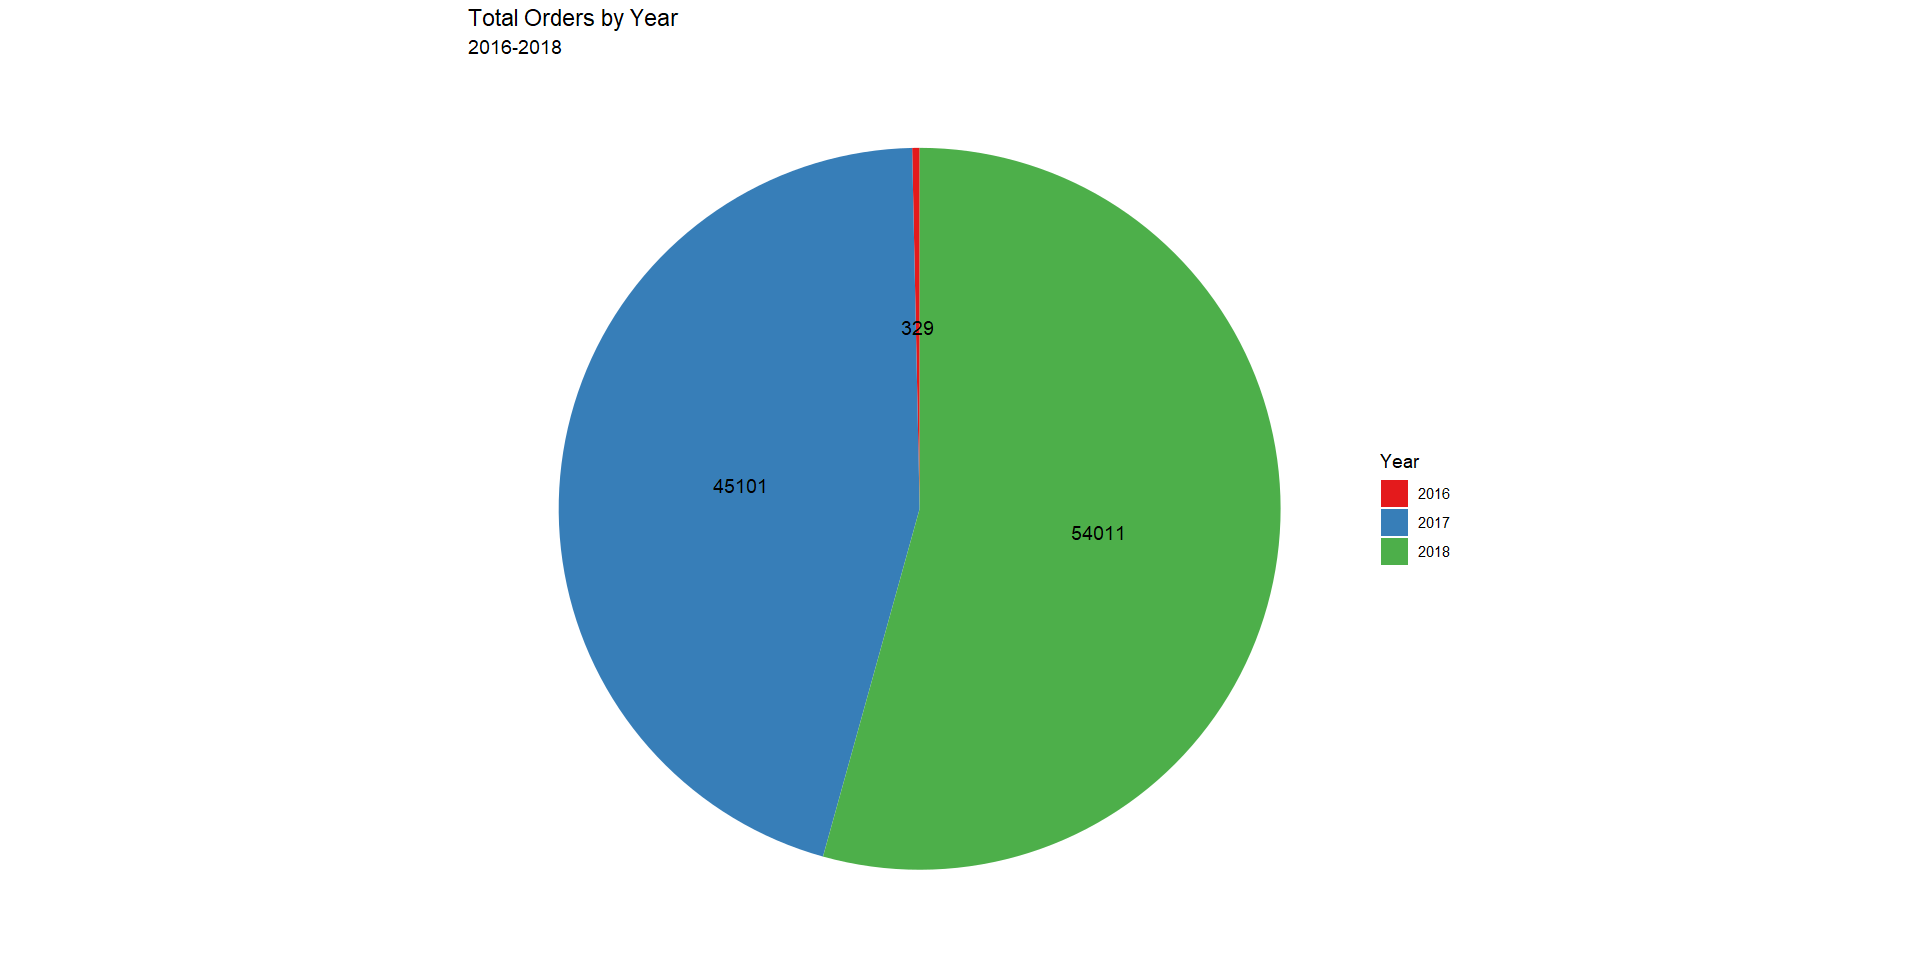

In [42]:
  # Data
  raw_orders %>% 
  select(order_id, order_purchase_timestamp) %>% 
  mutate(year = format(order_purchase_timestamp, "%Y")) %>% 
  group_by(year) %>% 
  summarise(total_orders = n()) %>% 
  
  # Chart
  ggplot(aes(x = "", y = total_orders, fill = year)) +
  geom_bar(stat = "identity", width = 1) +
  geom_text(aes(label = total_orders), position = position_stack(vjust = 0.5)) +
  coord_polar(theta = "y") +
  scale_fill_brewer(palette = "Set1") +
  labs(x = NULL, y = NULL, fill = "Year", 
       title = "Total Orders by Year",
       subtitle = "2016-2018") +
  theme_void()

#### View orders by month/year

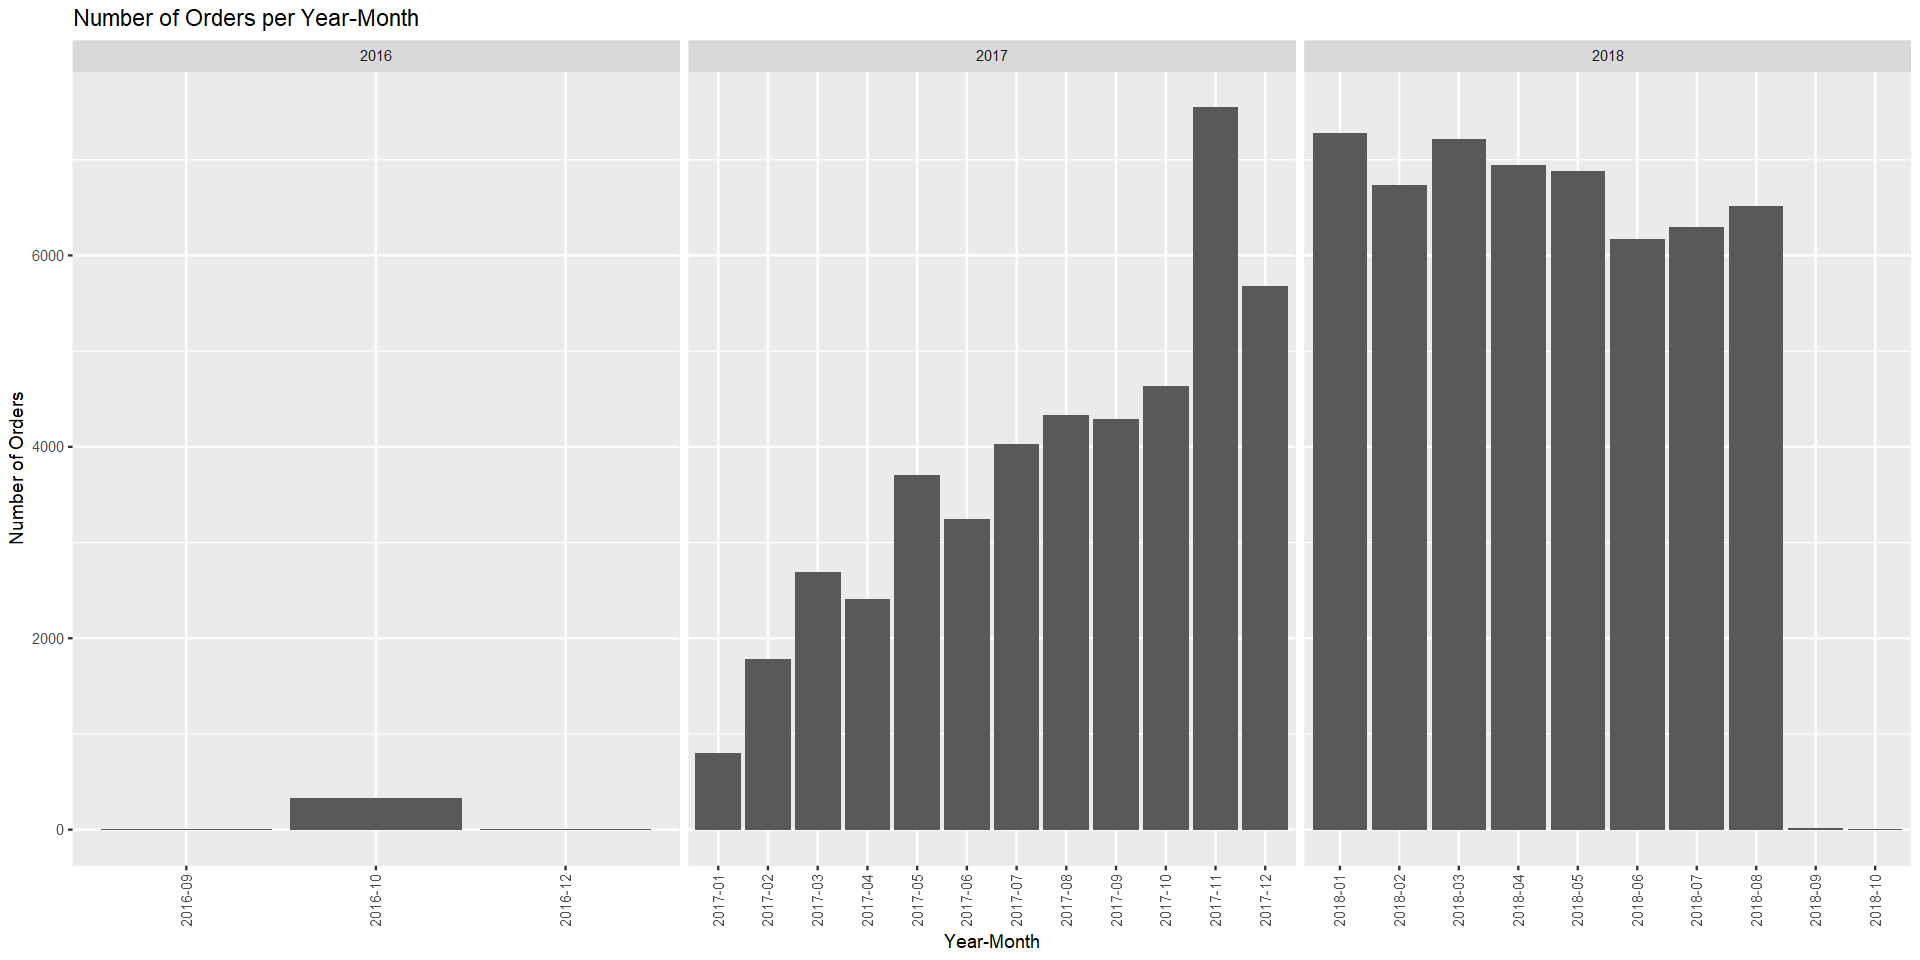

In [43]:
raw_orders %>% 
  select(order_id, order_purchase_timestamp) %>% 
  mutate(year_month = format(order_purchase_timestamp, "%Y-%m"),
         year = format(order_purchase_timestamp, "%Y")) %>% 
  group_by(year_month, year) %>% 
  summarise(total_orders = n(), .groups = "drop") %>% 
  ggplot(aes(x = year_month, y = total_orders)) +
  geom_bar(stat = "identity") +
  xlab("Year-Month") +
  ylab("Number of Orders") +
  ggtitle("Number of Orders per Year-Month") +
  facet_wrap(~ year, scales = "free_x")+
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5))

#### See order_status

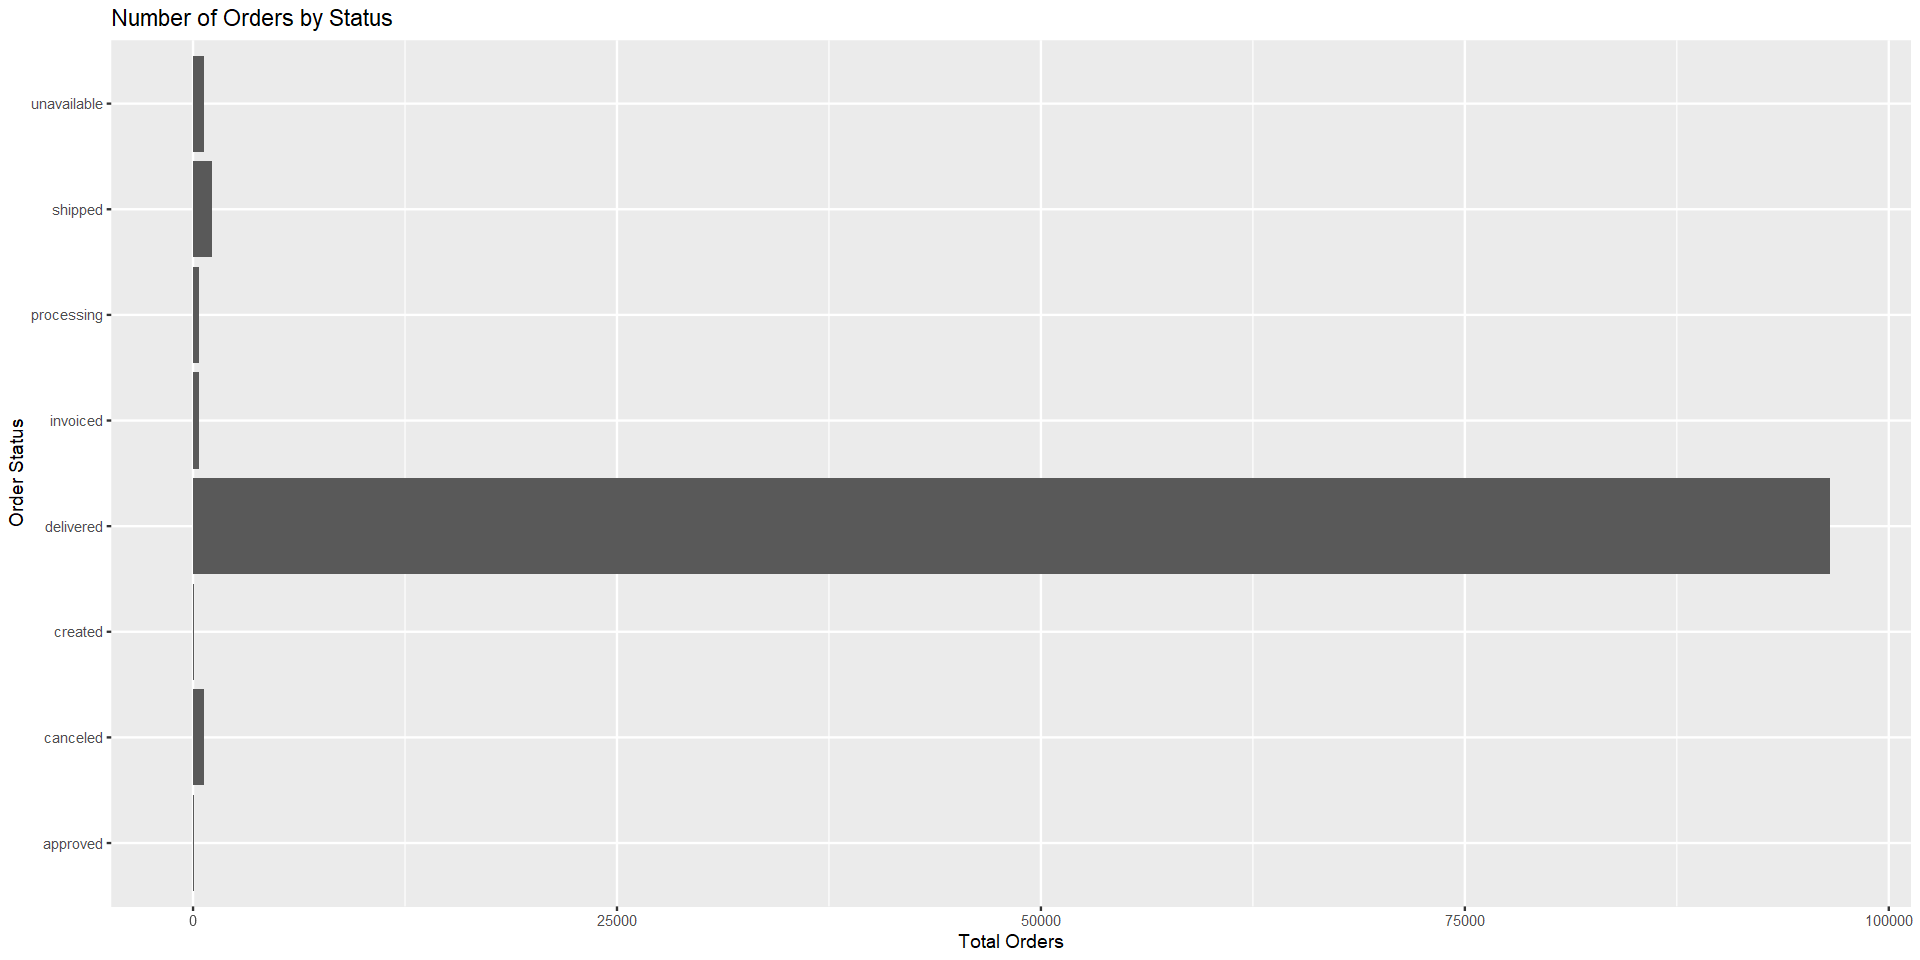

In [44]:
raw_orders %>% 
  group_by(order_status) %>% 
  summarise(total_orders = n()) %>% 
  ggplot(aes(x = total_orders, y = order_status)) +
  geom_col() +
  xlab("Total Orders") +
  ylab("Order Status") +
  ggtitle("Number of Orders by Status")

### Table raw_orders_item

This table is a table that contains multiple columns, with the main objective of tracking the status of orders. This table follows the schema of an Accumulating snapshot tables.

This table is a table that contains multiple columns, with the main objective of tracking the status of orders. This table follows the schema of an Accumulating snapshot tables.

Table Columns


1. Customer_id key from the dim_customer table, this is a single field.
2. Dim_payment table key order_id is a single field.
3. Order_Status which is one of 8 different states. This status must be the most current status of the order.
4. Order_purchase_timestamp is the order date.
5. Order_approved_at It is the date when the order was approved by management.
6. Order_delivered_carrier_date when it was delivered to the carrier.
7. Order_delivered_customer_date when it was delivered to the customer.
8. Order_estimated_delivery_date of when it was expected to be delivered to the customer.
   
#### Overview

In [19]:
# First lines of the table
head(raw_orders_item)
# Last lines of the table
tail(raw_orders_item)
# Table dimensions
dim(raw_orders_item)
# Types of table column variables
sapply(raw_orders_item, function(x) class(x)[1])
# Column data type
str(raw_orders_item)
# Verify na's
any(is.na(raw_orders_item))
# Check lines for missing values
raw_orders_item[apply(is.na(raw_orders_item), 1, any), ]
# Duplicate lines
any(duplicated(raw_orders_item))

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
2,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
3,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
4,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
5,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
6,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>
112645,fffbee3b5462987e66fb49b1c5411df2,1,6f0169f259bb0ff432bfff7d829b9946,213b25e6f54661939f11710a6fddb871,2018-06-28 09:58:03,119.85,20.03
112646,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112647,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112648,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112649,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72
112650,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79


[1] 112650      7

order_id       order_item_id          product_id           seller_id 
        "character"           "integer"         "character"         "character" 
shipping_limit_date               price       freight_value 
        "character"           "numeric"           "numeric"

'data.frame':	112650 obs. of  7 variables:
 $ order_id           : chr  "00010242fe8c5a6d1ba2dd792cb16214" "00018f77f2f0320c557190d7a144bdd3" "000229ec398224ef6ca0657da4fc703e" "00024acbcdf0a6daa1e931b038114c75" ...
 $ order_item_id      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ product_id         : chr  "4244733e06e7ecb4970a6e2683c13e61" "e5f2d52b802189ee658865ca93d83a8f" "c777355d18b72b67abbeef9df44fd0fd" "7634da152a4610f1595efa32f14722fc" ...
 $ seller_id          : chr  "48436dade18ac8b2bce089ec2a041202" "dd7ddc04e1b6c2c614352b383efe2d36" "5b51032eddd242adc84c38acab88f23d" "9d7a1d34a5052409006425275ba1c2b4" ...
 $ shipping_limit_date: chr  "2017-09-19 09:45:35" "2017-05-03 11:05:13" "2018-01-18 14:48:30" "2018-08-15 10:10:18" ...
 $ price              : num  58.9 239.9 199 13 199.9 ...
 $ freight_value      : num  13.3 19.9 17.9 12.8 18.1 ...


[1] FALSE

order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>


[1] FALSE

#### Change shipping_limit_date column type to date

In [20]:
raw_orders_item <- raw_orders_item %>%
  mutate(shipping_limit_date = as.Date(shipping_limit_date))
raw_orders_item$price <- as.double(raw_orders_item$price)
raw_orders_item$freight_value <- as.double(raw_orders_item$freight_value)
str(raw_orders_item)

'data.frame':	112650 obs. of  7 variables:
 $ order_id           : chr  "00010242fe8c5a6d1ba2dd792cb16214" "00018f77f2f0320c557190d7a144bdd3" "000229ec398224ef6ca0657da4fc703e" "00024acbcdf0a6daa1e931b038114c75" ...
 $ order_item_id      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ product_id         : chr  "4244733e06e7ecb4970a6e2683c13e61" "e5f2d52b802189ee658865ca93d83a8f" "c777355d18b72b67abbeef9df44fd0fd" "7634da152a4610f1595efa32f14722fc" ...
 $ seller_id          : chr  "48436dade18ac8b2bce089ec2a041202" "dd7ddc04e1b6c2c614352b383efe2d36" "5b51032eddd242adc84c38acab88f23d" "9d7a1d34a5052409006425275ba1c2b4" ...
 $ shipping_limit_date: Date, format: "2017-09-19" "2017-05-03" ...
 $ price              : num  58.9 239.9 199 13 199.9 ...
 $ freight_value      : num  13.3 19.9 17.9 12.8 18.1 ...


#### See number of products by order_id

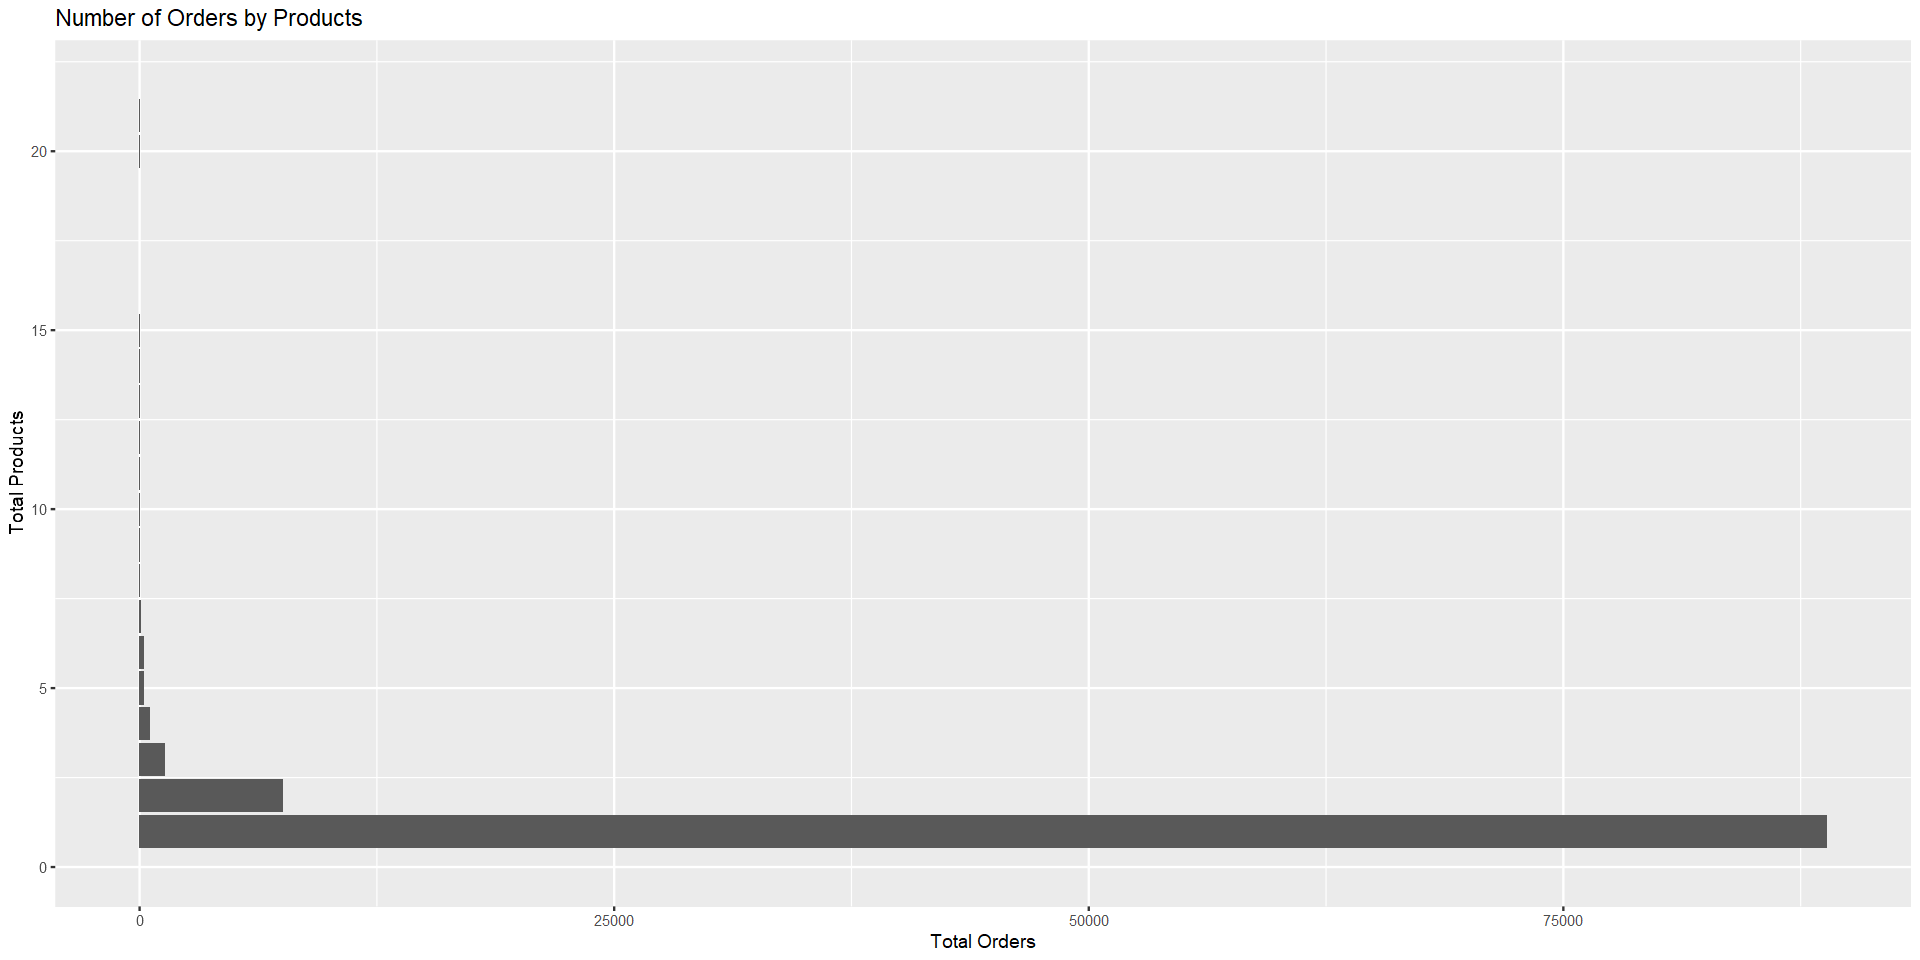

In [45]:
raw_orders_item %>% 
  group_by(order_id) %>% 
  summarize(total_products = n()) %>% 
  group_by(total_products) %>% 
  summarise(total_orders = n()) %>% 
  ggplot(aes(x = total_products, y = total_orders)) +
  geom_col() +
  xlab("Total Products") +
  ylab("Total Orders")  +
  coord_flip() +
  ggtitle("Number of Orders by Products") +
  xlim(0, 22)

## Data Modeling

<img src="https://raw.githubusercontent.com/E-man85/project1/main/02-Images/ER_ECOM.png" width="800" height = "400">

We created a flat table resulting from the exploratory analysis performed, where the granularity is the customer ID.

#### Create a flat table

In [22]:
# join between raw_customer and fct_orders
flat_table <- left_join(raw_customers, raw_orders, by = 'customer_id')
# join with (aggregated raw_orders_item and raw_products)
flat_table <- left_join(flat_table,
                        left_join(raw_orders_item, raw_products, by = 'product_id') %>% 
                        group_by(order_id) %>% 
                        summarise(nr_of_products = n(),
                        nr_of_category = n_distinct(product_category_name),
                        summed_price = sum(price),
                        summed_freight = sum(freight_value)), by = 'order_id')
# join with (aggregated raw_payments)
flat_table <- left_join(flat_table,
                       raw_payments %>% 
                        group_by(order_id) %>% 
                        summarise(nr_of_payments = n(),
                        min_payment_sequential = min(payment_sequential),
                        nr_of_payments_type = n_distinct(payment_type),
                        payment_installments = max(payment_installments),
                        summed_payment = sum(payment_value)), by = 'order_id')
head(flat_table)

,customer_id,customer_unique_id,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,nr_of_products,nr_of_category,summed_price,summed_freight,nr_of_payments,min_payment_sequential,nr_of_payments_type,payment_installments,summed_payment
,<chr>,<chr>,<chr>,<chr>,<date>,<date>,<date>,<date>,<date>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16,2017-05-16,2017-05-23,2017-05-25,2017-06-05,1,1,124.99,21.88,1,1,1,2,146.87
2,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12,2018-01-12,2018-01-15,2018-01-29,2018-02-06,1,1,289.00,46.48,1,1,1,8,335.48
3,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19,2018-05-20,2018-06-11,2018-06-14,2018-06-13,1,1,139.94,17.79,1,1,1,7,157.73
4,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13,2018-03-13,2018-03-27,2018-03-28,2018-04-10,1,1,149.94,23.36,1,1,1,1,173.30
5,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29,2018-07-29,2018-07-30,2018-08-09,2018-08-15,1,1,230.00,22.25,1,1,1,8,252.25
6,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14,2017-09-14,2017-09-18,2017-09-28,2017-10-04,1,1,259.90,22.31,1,1,1,1,282.21


#### FILTER 1
- We do not consider order_status 'canceled', 'created', 'unavailable'

In [23]:
flat_table %>% 
  group_by(order_status) %>% 
  summarise(count_rows = n()) %>% 
  filter(order_status %in% c('canceled', 'created', 'unavailable'))
# remove 1239 records
filter1 <- flat_table %>% 
  filter( ! order_status %in% c('canceled', 'created', 'unavailable'))

order_status,count_rows
<chr>,<int>
canceled,625
created,5
unavailable,609


#### FILTER 2
- Removing inconsistencies, consider that the sum of price+ freight equals the total payment

In [24]:
filter1 %>% 
  select(summed_price, summed_freight, summed_payment) %>% 
  mutate(total_orders = summed_price + summed_freight,
         dif = summed_payment - total_orders) %>% 
  filter(total_orders != summed_payment) %>% 
  head(10)
# remove records with differences in payments
filter2 <- filter1 %>% 
  filter((summed_price+summed_freight) == summed_payment)

,summed_price,summed_freight,summed_payment,total_orders,dif
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,179.70,53.01,232.71,232.71,2.842171e-14
2,79.90,14.73,94.63,94.63,-1.421085e-14
3,69.90,10.21,80.11,80.11,-1.421085e-14
4,89.90,13.65,103.55,103.55,-1.421085e-14
5,223.90,15.74,239.64,239.64,-2.842171e-14
6,196.80,29.92,226.72,226.72,-2.842171e-14
7,788.42,21.28,809.70,809.70,1.136868e-13
8,60.45,91.15,151.60,151.60,-2.842171e-14
9,129.60,16.61,146.21,146.21,2.842171e-14


#### FILTER 3
- Remove transactions where the min_payment_sequential is different from 1 (we are assuming that payment line #1 is missing)

In [25]:
filter2 %>%
  filter(min_payment_sequential != 1) %>%
  head(10)
# remove the 62 lines
filter3 <- filter2 %>% 
  filter(min_payment_sequential == 1)

,customer_id,customer_unique_id,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,nr_of_products,nr_of_category,summed_price,summed_freight,nr_of_payments,min_payment_sequential,nr_of_payments_type,payment_installments,summed_payment
,<chr>,<chr>,<chr>,<chr>,<date>,<date>,<date>,<date>,<date>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,65e4681470e66fa92770a629a7ec0884,8d21b846e69c263edf74b4c8211d99a0,510bff1cf06be1143d3b6698df2fd486,delivered,2018-02-20,2018-02-20,2018-02-21,2018-03-23,2018-03-14,1,1,389.90,16.48,1,2,1,8,406.38
2,5813c68e0a19eb71c5a0c79d644e1b5a,96a8c9c872f07e7480290d5432eb84d9,cc78407c0a27d3450010482ad091d498,delivered,2018-01-20,2018-01-20,2018-01-22,2018-01-30,2018-02-22,1,1,179.00,45.71,1,2,1,10,224.71
3,8935036852a292fe1f61a03c7d51831d,c7e96f28f6556e49a8cb36b624a2b117,00ac05fe0fc047c54418098eb64e3aaa,delivered,2018-02-18,2018-02-18,2018-02-21,2018-03-02,2018-03-16,1,1,99.90,23.57,1,2,1,1,123.47
4,bef38470e63f1682262948029b5d9ab5,83e9758d5346b127eae0f24e6400c13c,3ed99ad145f818a65b1bcfce6a4182fb,delivered,2018-01-09,2018-01-10,2018-01-15,2018-01-29,2018-02-15,1,1,129.00,18.15,1,2,1,1,147.15
5,5d3c3a68213644e9e062d59910867cca,d3d7ef5288ec60b1abfd7e93fe7cdc0b,7d48e6b043ed5dac29ca0e41d3e3b584,delivered,2018-06-12,2018-06-12,2018-06-12,2018-07-23,2018-07-11,1,1,109.99,64.14,1,2,1,4,174.13
6,48ebb06cf56dba9d009230cc751bb195,9925e1d7dff0d807355599dee04830ab,1a57108394169c0b47d8f876acc9ba2d,delivered,2018-05-15,2018-05-15,2018-05-17,2018-05-24,2018-06-06,2,1,83.38,46.56,1,2,1,0,129.94
7,7a52f913ac1ee1a5e6dc2d38423bb756,f5f434147aa6cc5a6e7ddfa98c742368,3c8be270e7e602ffcde3f97cef934376,delivered,2018-07-04,2018-07-05,2018-07-12,2018-07-28,2018-08-06,1,1,22.32,15.26,1,2,1,8,37.58
8,acac7c47f37fdb07e2bfe3932a997d3b,ca786ed29e0b265f60c9fd3b691e75a5,d7d9f1ff0b6aa62f2d4e7fc99e60e8ea,delivered,2018-01-17,2018-01-17,2018-01-18,2018-01-24,2018-02-21,1,1,19.90,15.10,1,2,1,1,35.00
9,6d1476335098224a9d1807ba96a1eb2c,c17734072167492ff3964e6ff642362c,9e958a07e455c09fd69aa32c2a4b2d4c,delivered,2017-10-10,2017-10-10,2017-10-20,2017-10-28,2017-11-07,1,1,69.99,18.73,1,2,1,2,88.72


#### Consider required columns and rename columns

In [26]:
filter3 <- filter3 %>% select(customer_unique = customer_unique_id, order_id, purchase_date = order_purchase_timestamp, 
                   nr_of_products, nr_of_category,nr_of_payments,nr_of_payments_type, 
                   payment_installments, summed_price, summed_freight, summed_payment)
summary(filter3)

 customer_unique      order_id         purchase_date        nr_of_products  
 Length:78620       Length:78620       Min.   :2016-10-03   Min.   : 1.000  
 Class :character   Class :character   1st Qu.:2017-09-12   1st Qu.: 1.000  
 Mode  :character   Mode  :character   Median :2018-01-20   Median : 1.000  
                                       Mean   :2017-12-31   Mean   : 1.128  
                                       3rd Qu.:2018-05-05   3rd Qu.: 1.000  
                                       Max.   :2018-09-03   Max.   :20.000  
 nr_of_category  nr_of_payments   nr_of_payments_type payment_installments
 Min.   :1.000   Min.   : 1.000   Min.   :1.000       Min.   : 1.000      
 1st Qu.:1.000   1st Qu.: 1.000   1st Qu.:1.000       1st Qu.: 1.000      
 Median :1.000   Median : 1.000   Median :1.000       Median : 2.000      
 Mean   :1.007   Mean   : 1.042   Mean   :1.021       Mean   : 2.945      
 3rd Qu.:1.000   3rd Qu.: 1.000   3rd Qu.:1.000       3rd Qu.: 4.000      
 Max.   :3.

#### Frequency of orders per month

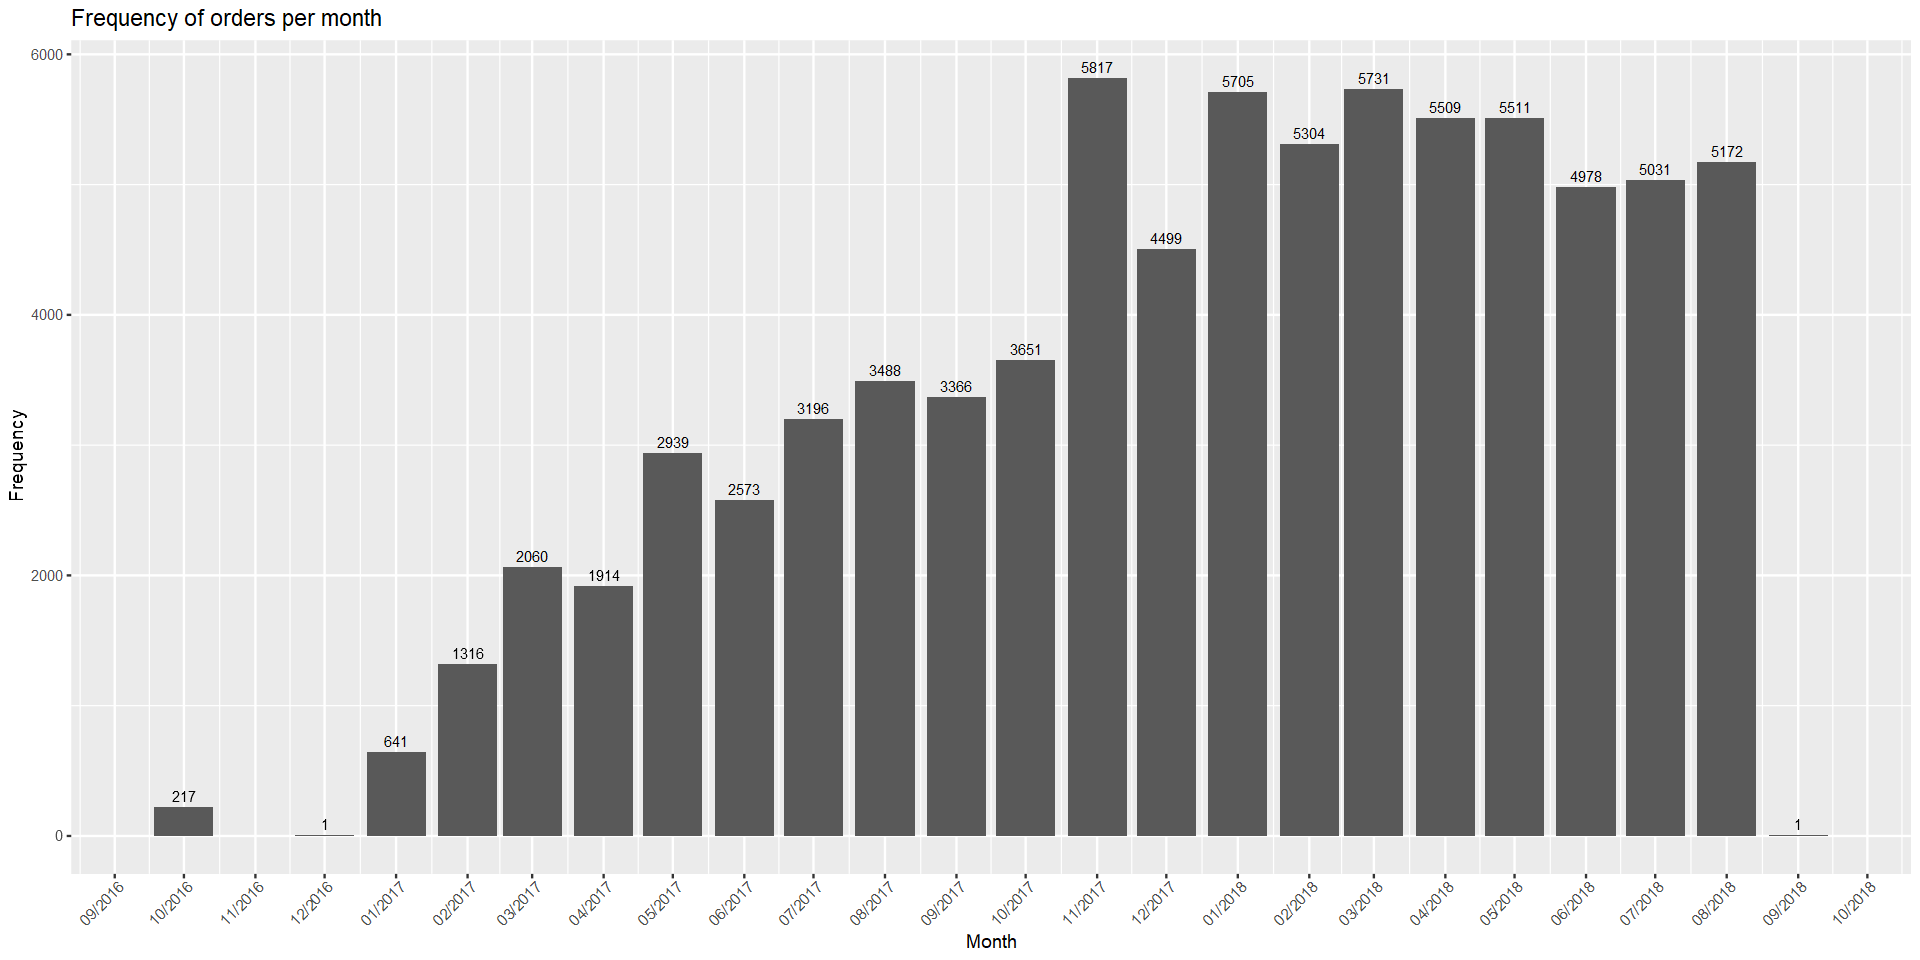

In [46]:
# Group dates by month and count occurrences
freq_por_mes <- filter3 %>%
  group_by(month = lubridate::floor_date(purchase_date, unit = "month")) %>%
  summarise(count = n())
# Plot the bar chart
ggplot(freq_por_mes, aes(x = month, y = count)) +
  geom_bar(stat = "identity") +
  scale_x_date(date_breaks = "1 month", date_labels = "%m/%Y") +
  labs(x = "Month", y = "Frequency", title = "Frequency of orders per month")+
  geom_text(aes(label = count), vjust = -0.5, size = 3) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

#### Data preparation:
1. Define data cut
2. Calculation of RFM metrics
3. Create target variable

In [28]:
# Set date today and data cut-off
today <- as.Date("2017-12-31")
# Define dataframe only with data before the cut-off
cut_data <- filter3 %>% filter(purchase_date <= as.Date("2017-12-31"))
# Group data with customer granularity and calculate RFM metrics
customer_data <- cut_data %>% 
  group_by(customer_unique) %>% 
  summarize(first_order = min(purchase_date),
            last_order = max(purchase_date),
            frequency = n_distinct(order_id),
            monetary_value  = sum(summed_payment))%>%
  mutate(recency = as.numeric(difftime(today, last_order, units = "days")))
# Create future dataframe
future_data <- filter3 %>% filter(purchase_date > as.Date("2017-12-31"))
# Create future_data unique customer list
customer_unique_future <- data.frame(customer_unique = unique(future_data$customer_unique))
# Check if df_clientes bought in the future (if they exist in the list of unique future clients) if yes = 1 if no = 0
customer_data$target <- as.integer(customer_data$customer_unique %in% future_data$customer_unique)
# use only numerical variables
customer_data.num <- customer_data[, 4:7]
# View occurrences of the target variable
table(customer_data$target)


    0     1 
34297   456 

## Modeling Client Segmentation

<img src="https://raw.githubusercontent.com/E-man85/project1/main/02-Images/k-means-clustering.png" width="800" height = "400">

K-Means is a clustering (or grouping) algorithm, it is an unsupervised learning algorithm (that is, it does not need external confirming inputs) that evaluates data based on their distances from each other. 

In this way, we will standardize the numerical variables.

For this algorithm we have to explicitly define the number of Clusters, which ideally would be between 3 and 6.

In [29]:
# Scale will standardize the variables with mean 0 and standard deviation 1
customer_data.std <- as.data.frame(scale(customer_data.num))
head(customer_data.std)

,frequency,monetary_value,recency,target
,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.1471898,-0.33535729,1.60093379,-0.115305
2,-0.1471898,-0.50950619,-0.60334460,-0.115305
3,-0.1471898,0.11706193,-0.94010935,-0.115305
4,-0.1471898,-0.07413394,1.66216374,-0.115305
5,-0.1471898,-0.56927278,0.27428476,-0.115305
6,-0.1471898,-0.31467200,0.02936494,-0.115305


### Model from 3 to 6 K

In [30]:
# K = 3
k_clusters3 <- 3
set.seed(811)
fit.kmeans3 <- kmeans(customer_data.std,
                      centers = k_clusters3,
                      nstart = 100,
                      iter.max = 100)
# K = 4
k_clusters4 <- 4
set.seed(811)
fit.kmeans4 <- kmeans(customer_data.std,
                      centers = k_clusters4,
                      nstart = 100,
                      iter.max = 100)   
# K = 5
k_clusters5 <- 5
set.seed(811)
fit.kmeans5 <- kmeans(customer_data.std,
                      centers = k_clusters5,
                      nstart = 100,
                      iter.max = 100)
# K = 6
k_clusters6 <- 6
set.seed(811)
fit.kmeans6 <- kmeans(customer_data.std,
                      centers = k_clusters6,
                      nstart = 100,
                      iter.max = 100)                                        

#### See relationship between model variables through a correlation matrix, for division of clusters with K = 3

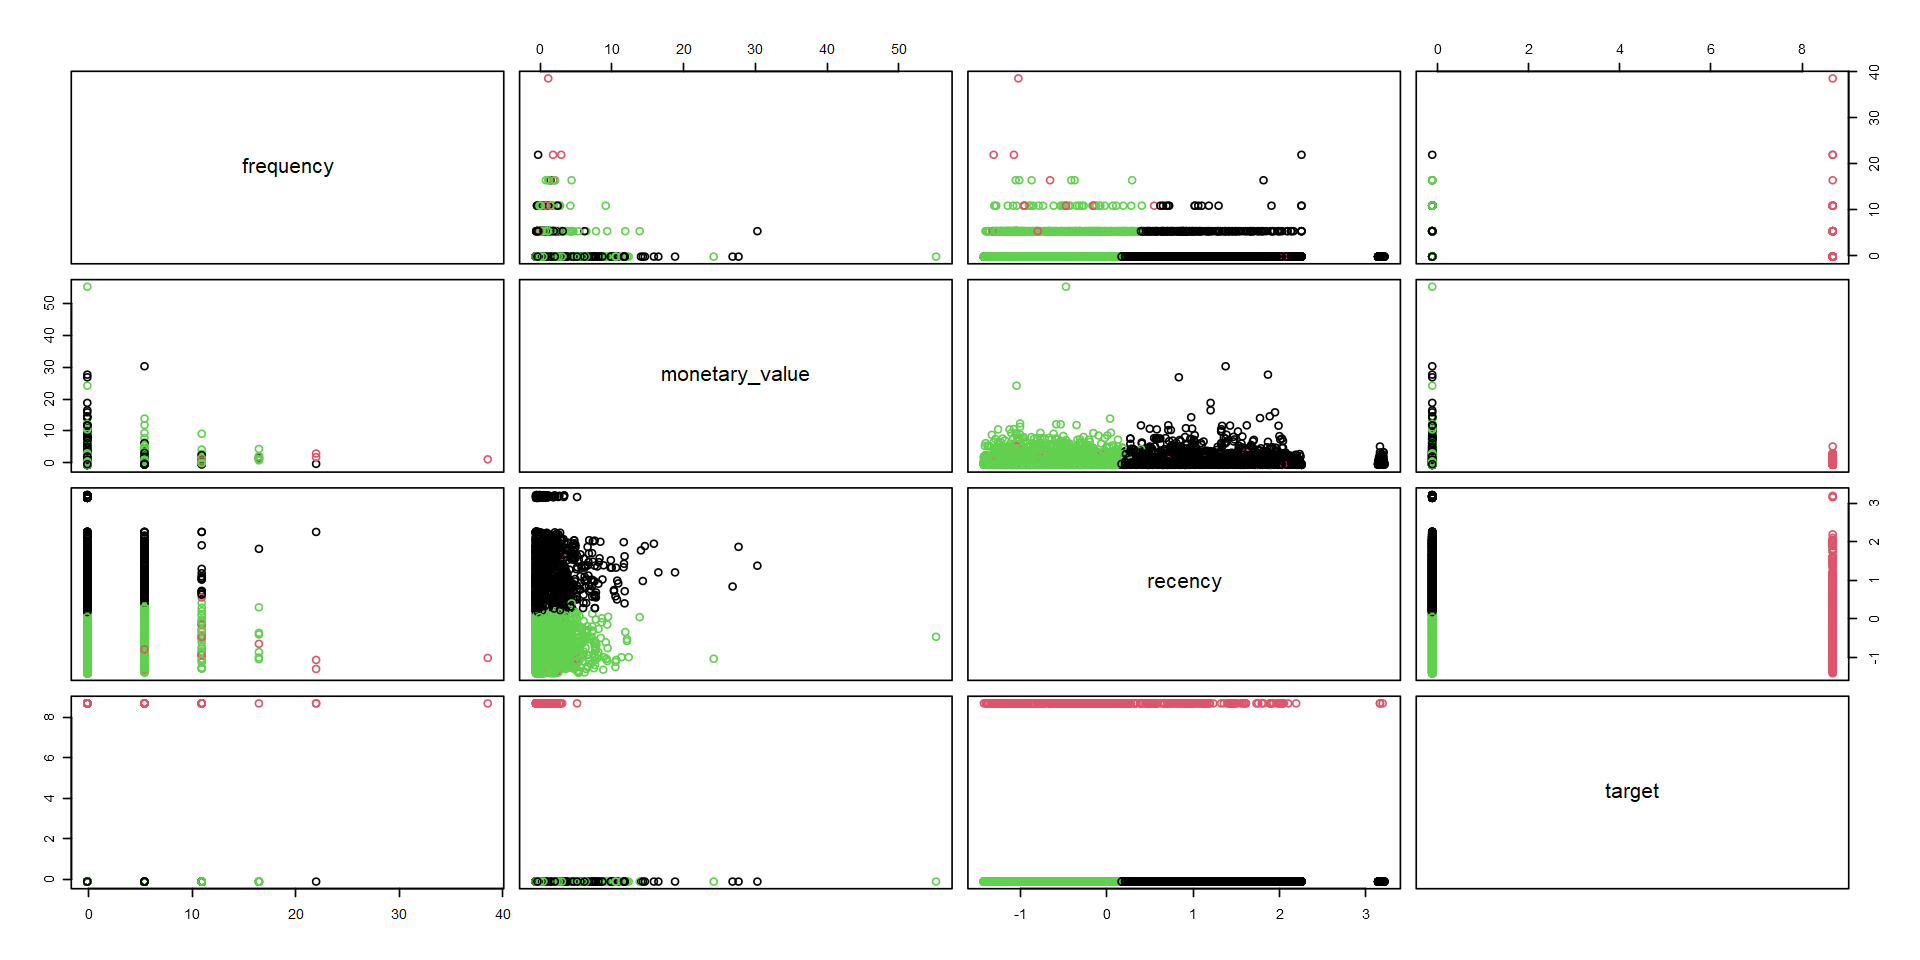

In [47]:
# Assign the points to the corresponding groups
grupos <- cut(fit.kmeans3$cluster, breaks = c(0, 1, 2, 3), labels = c("Grupo 1", "Grupo 2", "Grupo 3"))
# Check the results
plot(customer_data.std, col = grupos)

### Compare models

In [32]:
data.frame(
  totss = c(fit.kmeans3$totss, fit.kmeans4$totss, fit.kmeans5$totss, fit.kmeans6$totss),
  tot.withinss = c(fit.kmeans3$tot.withinss,fit.kmeans4$tot.withinss, fit.kmeans5$tot.withinss, fit.kmeans6$tot.withinss),
  betweenss = c(fit.kmeans3$betweenss,fit.kmeans4$betweenss, fit.kmeans5$betweenss, fit.kmeans6$betweenss),
  iter = c(fit.kmeans3$iter,fit.kmeans4$iter, fit.kmeans5$iter, fit.kmeans6$iter),
  row.names = c("kmeans3", "kmeans4","kmeans5", "kmeans6"))

,totss,tot.withinss,betweenss,iter
,<dbl>,<dbl>,<dbl>,<int>
kmeans3,139008,78933.36,60074.64,2
kmeans4,139008,50510.20,88497.80,3
kmeans5,139008,33961.61,105046.39,4
kmeans6,139008,29227.77,109780.23,7


#### Determine the best K

- Elbow Method

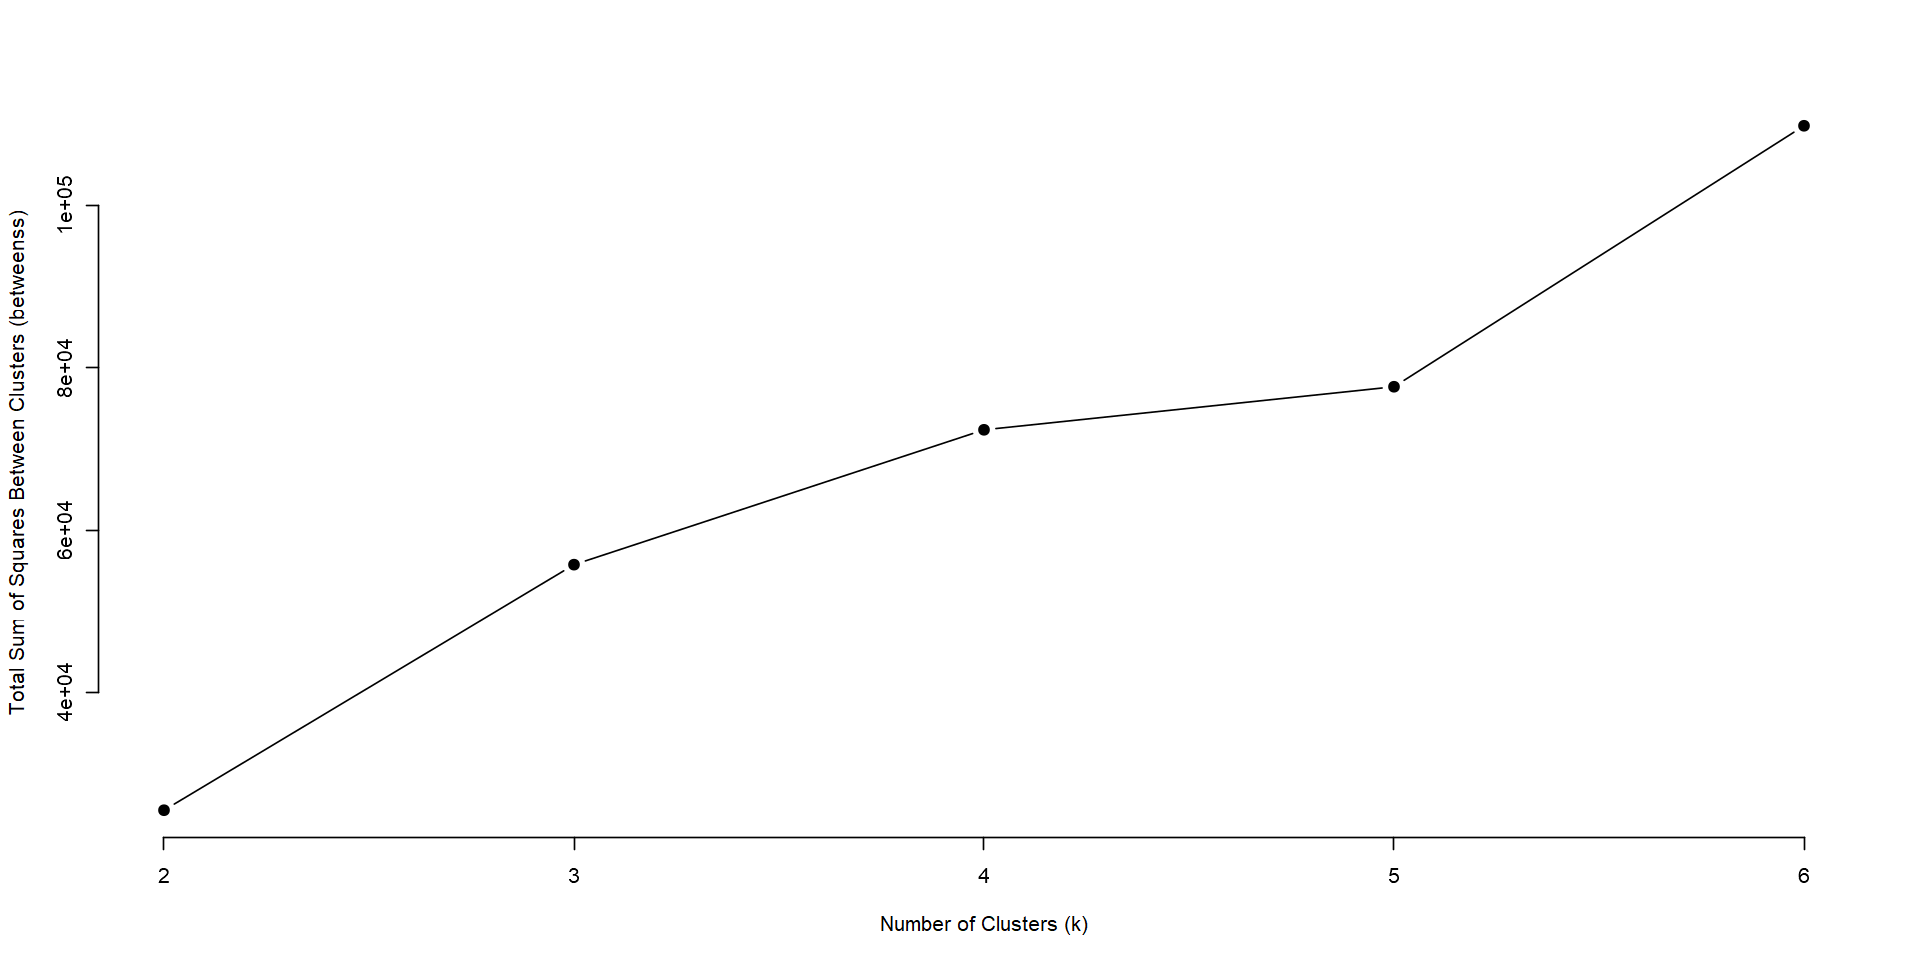

In [48]:
# Calculate the total sum of squares between clusters (betweenss) for different values ​​of k
betweenss <- vector()
for (k in 2:6) {
  kmeans_model <- kmeans(customer_data.std, centers=k) # tweak the k-means model
  betweenss[k-1] <- kmeans_model$betweenss # save value of betweenss to current k
}
# Plot the graph of k versus betweenss
plot(2:6, betweenss, type="b", pch=19, frame=FALSE, xlab="Number of Clusters (k)", ylab="Total Sum of Squares Between Clusters (betweenss)")

Through the analysis of the best model and a strong knowledge of the business, it is possible for us to define the number of Clusters that will be ideal.

Through the Elbow Method we can choose the ideal number of Clusters. In this method, we run the K-means algorithm for different values ​​of k and then visualize the sum of squared distances (SSD) of the points to the centroid with respect to the number of clusters k. The idea is to choose the value of k at the point where the sum of squares curve starts to flatten out, forming an “elbow”.

This value indicates the point at which adding an extra cluster does not provide much additional information. We can see that the number of clusters 4 or 5 would be ideal through an analysis of the graph

## Predict Next Order

The Random Forest algorithm is a statistical, supervised learning method that can be used in classification problems and in making predictions.

This algorithm is composed of multiple decision trees that seek, through the definition of a label, to verify which are the factors that lead to a given record being in one class or another.


<img src="https://raw.githubusercontent.com/E-man85/project1/main/02-Images/random_forest_image.png" width="800" height = "400">

The Random Forest algorithm will classify customers into two groups:
- Those who will buy again.
- Those who will not buy again.

For this, we will use our target variable, which will allow the algorithm to understand how the customer's features behave both for customers who bought again and for customers who only bought once.


#### Iteration 1
We consider the data frame customer_data , which has data aggregated by customer granularity and with the cut-off at 2021-12-31.

Let's consider the RFM features to create our Random Forest model in this first iteration.

In [34]:
class_customer_iter1 <- customer_data[4:7] 
head(class_customer_iter1)

frequency,monetary_value,recency,target
<int>,<dbl>,<dbl>,<int>
1,86.22,296,0
1,43.62,80,0
1,196.89,47,0
1,150.12,302,0
1,29.00,166,0
1,91.28,142,0


#### See records with nulls, and if there are missing values

In [35]:
class_customer_iter1[which(rowSums(is.na(class_customer_iter1)) > 0), ]
any(is.na(class_customer_iter1))

frequency,monetary_value,recency,target
<int>,<dbl>,<dbl>,<int>


[1] FALSE

#### Transform the 'target' variable into a categorical variable where 1 = yes_buy 0 = not_buy

In [36]:
class_customer_iter1$target <- factor(class_customer_iter1$target, levels = 1:0,
                            labels = c("yes_buy", "not_buy"))

# Table of frequencies of the target variable
table(class_customer_iter1$target)
# Frequency table of the target variable in percentage
cbind(frequency = table(class_customer_iter1$target),
      percentage = round(prop.table(table(class_customer_iter1$target))*100,2))


yes_buy not_buy 
    456   34297 

,frequency,percentage
yes_buy,456,1.31
not_buy,34297,98.69


#### View boxplot of variables

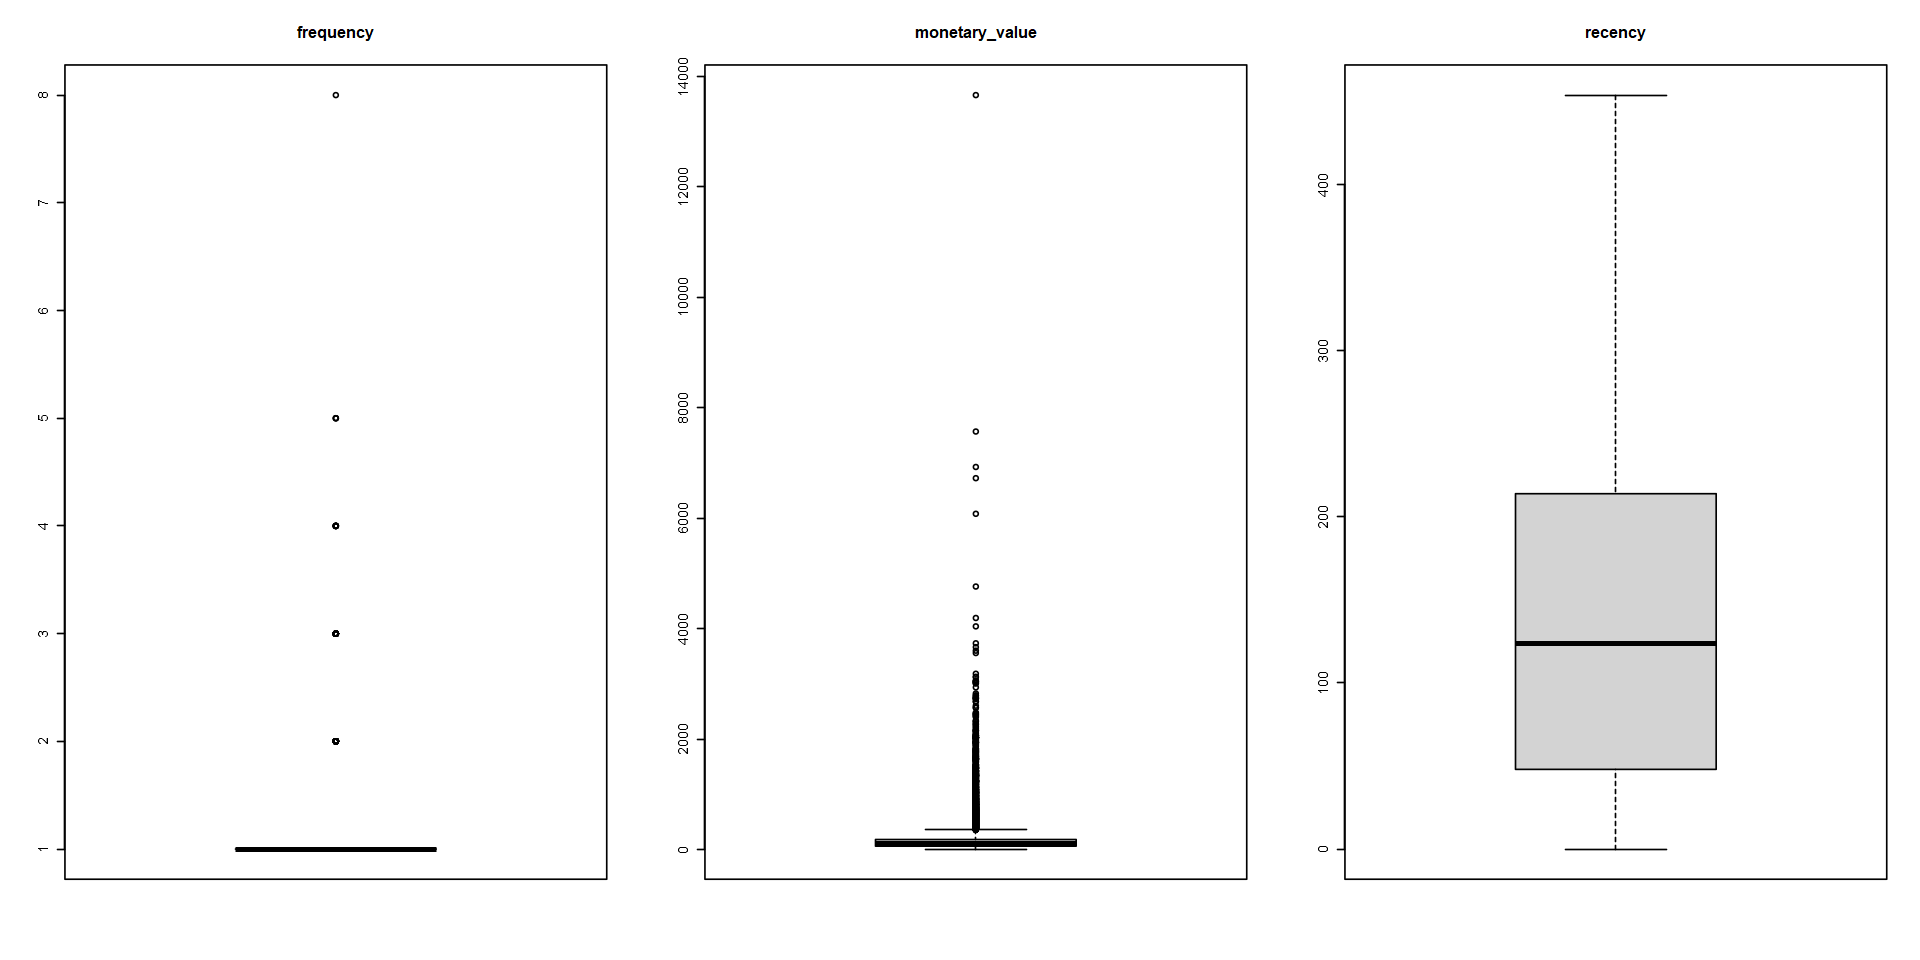

In [49]:
par(mfrow= c(1,3))
  for (i in 1:3) { 
    boxplot(class_customer_iter1[,i], main = colnames(class_customer_iter1)[i])
  }

#### Variable frequency histograms

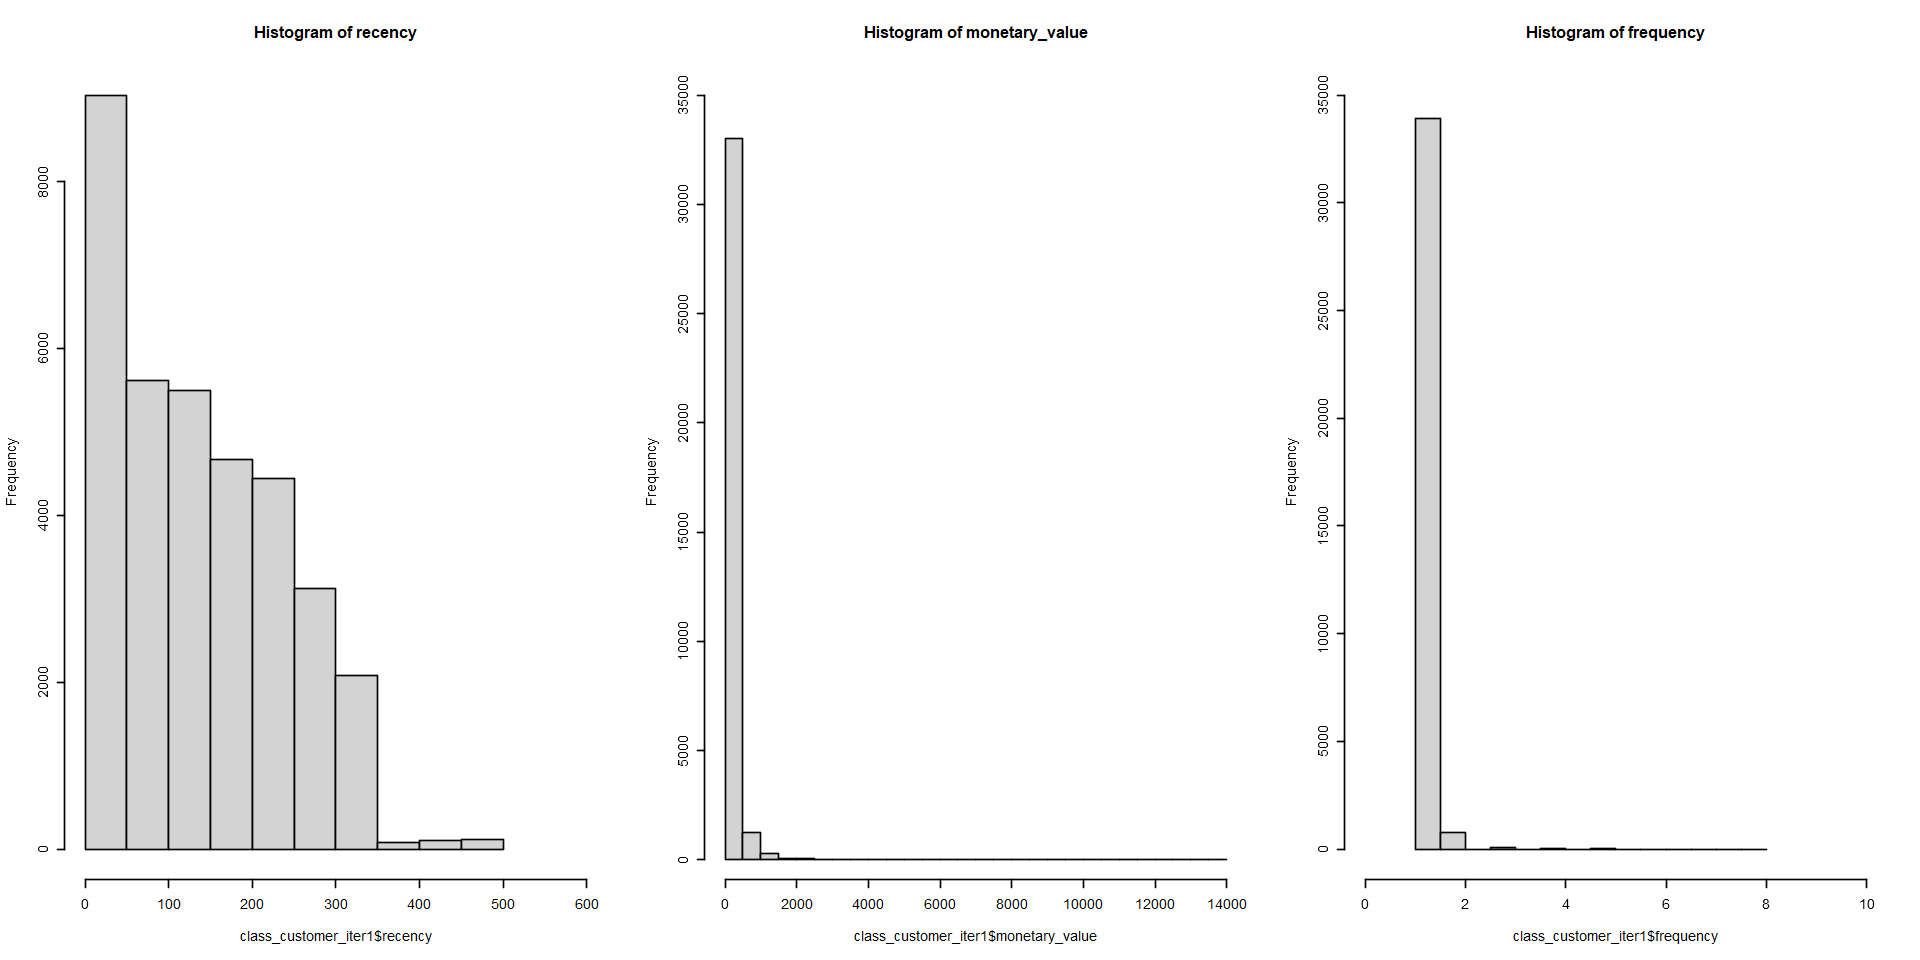

In [51]:
par(mfrow= c(1,3))
hist(class_customer_iter1$recency, 
     main = 'Histogram of recency', 
     breaks = 10,         
     xlim = c(0, 600))     
hist(class_customer_iter1$monetary_value, 
     main = 'Histogram of monetary_value', 
     breaks = 20,        
     xlim = c(0, 14000),
     ylim = c(500,35000))    
hist(class_customer_iter1$frequency, 
     main = 'Histogram of frequency',
     breaks =10, 
     xlim = c(0, 10),
     ylim = c(0,35000))

#### Split data into training and testing

In [52]:
seed <- 377
set.seed(seed)
train_index <- createDataPartition(class_customer_iter1$target, p = 0.8, list = FALSE)
train_set <- class_customer_iter1[train_index, ]
test_set <- class_customer_iter1[-train_index, ]

#### Define model parameters

In [54]:
# metric roc curve indicated for binary classification
metric <- "ROC"
# cross-validation method with different random divisions
control <- trainControl(method = "repeatedcv", 
                        # number of folds
                        number = 3, 
                        # performance metrics (binary ranking)
                        summaryFunction = twoClassSummary, 
                        # probability calculation
                        classProbs = TRUE,
                        # all predictions saved
                        savePredictions = TRUE,
                        # number of times
                        repeats = 2) 

#### Train random forest model

In [55]:
set.seed(seed)
model_RF <- train(target ~ .,
                  data = train_set,
                  method = 'rf',
                  metric = metric,
                  trControl = control)

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .



#### View model results

In [56]:
print(model_RF)

Random Forest 

27803 samples
    3 predictor
    2 classes: 'yes_buy', 'not_buy' 

No pre-processing
Resampling: Cross-Validated (3 fold, repeated 2 times) 
Summary of sample sizes: 18535, 18536, 18535, 18536, 18535, 18535, ... 
Resampling results across tuning parameters:

  mtry  ROC        Sens         Spec     
  2     0.5052373  0.008219302  0.9995627
  3     0.5003740  0.008219302  0.9989248

ROC was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.


#### Validate model on test data
#### View results in a table, with the model's probabilities and decision on the target variable

In [57]:
predictions_prob <- predict(model_RF, test_set, type = "prob")
predictions_raw  <- predict(model_RF, test_set, type = "raw")
head(cbind(predictions_prob, predictions_raw))

,yes_buy,not_buy,predictions_raw
,<dbl>,<dbl>,<fct>
1,0.000,1.000,not_buy
2,0.002,0.998,not_buy
3,0.032,0.968,not_buy
4,0.004,0.996,not_buy
5,0.000,1.000,not_buy
6,0.000,1.000,not_buy


#### ConfusionMatrix, for evaluation of the classification model

In [58]:
confusionMatrix(predictions_raw, test_set$target, mode = "everything")

Confusion Matrix and Statistics

          Reference
Prediction yes_buy not_buy
   yes_buy       1       3
   not_buy      90    6856
                                          
               Accuracy : 0.9866          
                 95% CI : (0.9836, 0.9892)
    No Information Rate : 0.9869          
    P-Value [Acc > NIR] : 0.6101          
                                          
                  Kappa : 0.02            
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.0109890       
            Specificity : 0.9995626       
         Pos Pred Value : 0.2500000       
         Neg Pred Value : 0.9870429       
              Precision : 0.2500000       
                 Recall : 0.0109890       
                     F1 : 0.0210526       
             Prevalence : 0.0130935       
         Detection Rate : 0.0001439       
   Detection Prevalence : 0.0005755       
      

#### Model training with hyperparameter tuning

In [59]:
tune_grid <- expand.grid(mtry = 1:3)
set.seed(seed)
model_rf_tune <- train(target ~., 
                       data = train_set,
                       method = "rf",
                       metric = metric,
                       trControl = control,
                       tuneGrid = tune_grid)

#### Plot ROC , model, results and confusionMatrix

Random Forest 

27803 samples
    3 predictor
    2 classes: 'yes_buy', 'not_buy' 

No pre-processing
Resampling: Cross-Validated (3 fold, repeated 2 times) 
Summary of sample sizes: 18535, 18536, 18535, 18536, 18535, 18535, ... 
Resampling results across tuning parameters:

  mtry  ROC        Sens         Spec     
  1     0.5039445  0.005487061  0.9999636
  2     0.5022015  0.008219302  0.9995809
  3     0.5015964  0.008219302  0.9987973

ROC was used to select the optimal model using the largest value.
The final value used for the model was mtry = 1.


,yes_buy,not_buy,predictions_raw
,<dbl>,<dbl>,<fct>
1,0,1,not_buy
2,0,1,not_buy
3,0,1,not_buy
4,0,1,not_buy
5,0,1,not_buy
6,0,1,not_buy


Confusion Matrix and Statistics

          Reference
Prediction yes_buy not_buy
   yes_buy       1       0
   not_buy      90    6859
                                          
               Accuracy : 0.9871          
                 95% CI : (0.9841, 0.9896)
    No Information Rate : 0.9869          
    P-Value [Acc > NIR] : 0.4858          
                                          
                  Kappa : 0.0215          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.0109890       
            Specificity : 1.0000000       
         Pos Pred Value : 1.0000000       
         Neg Pred Value : 0.9870485       
              Precision : 1.0000000       
                 Recall : 0.0109890       
                     F1 : 0.0217391       
             Prevalence : 0.0130935       
         Detection Rate : 0.0001439       
   Detection Prevalence : 0.0001439       
      

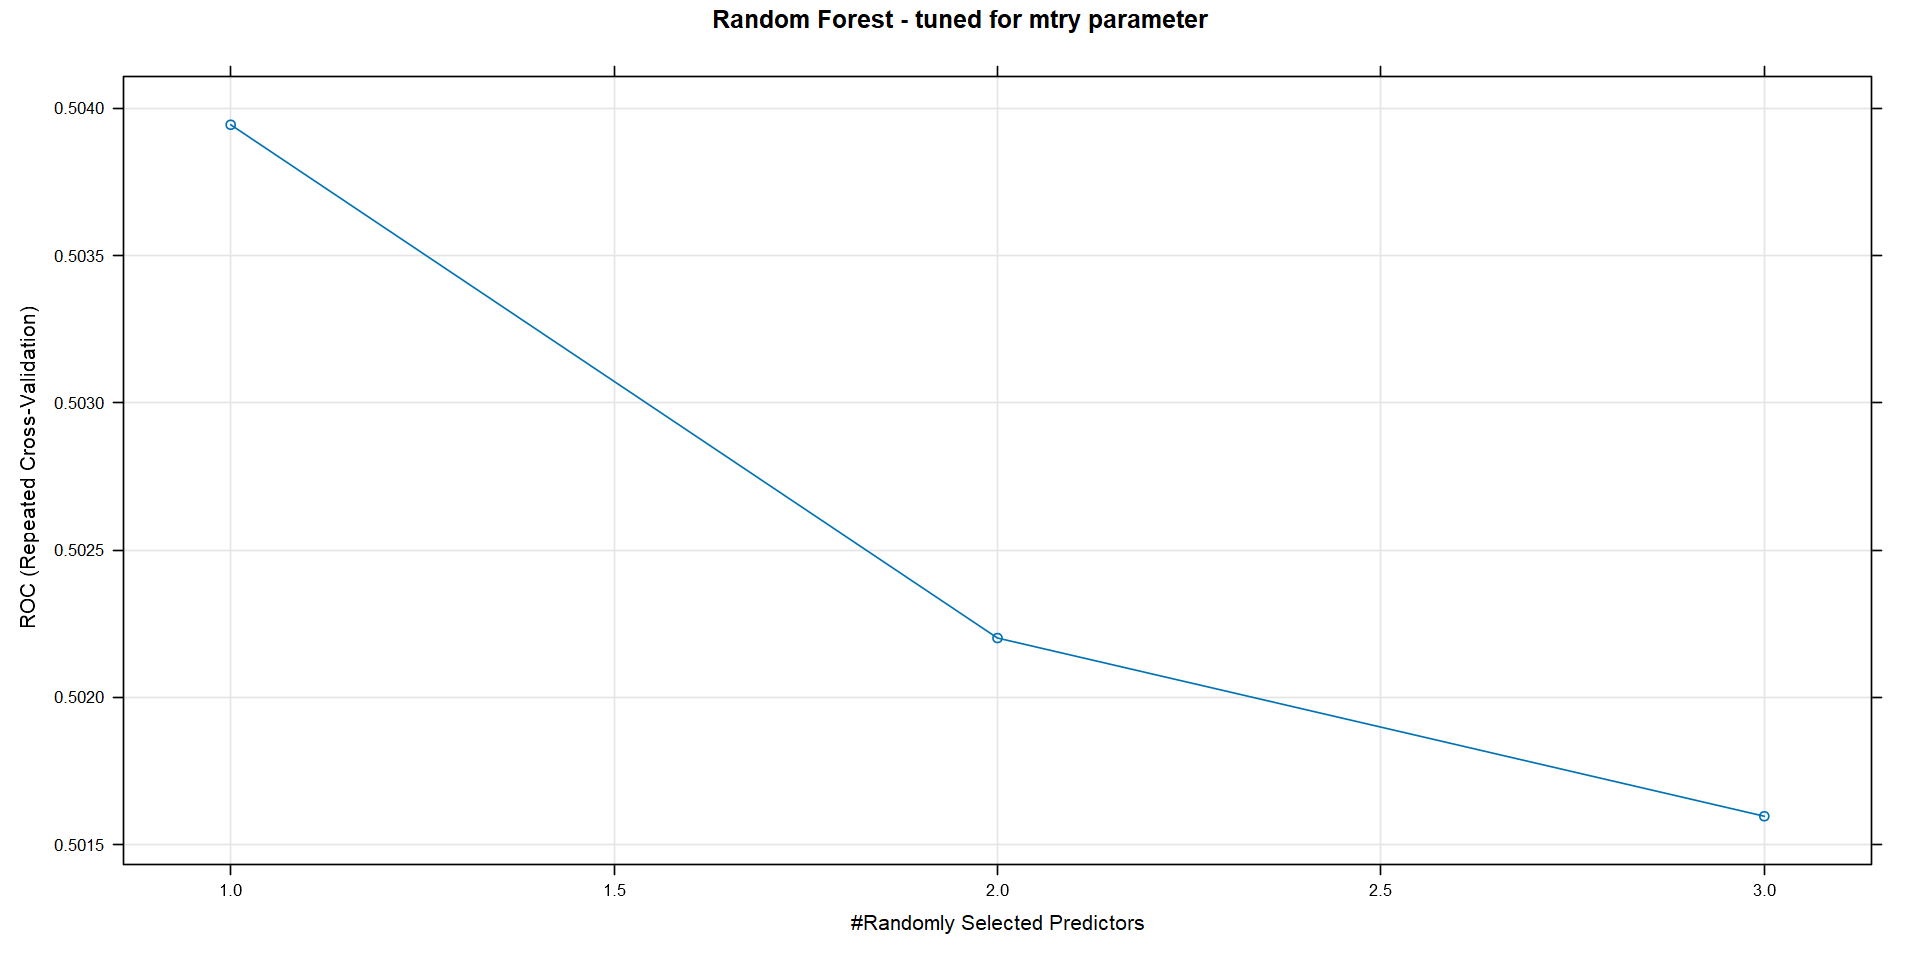

In [62]:
# Roc curve
plot(model_rf_tune, main = "Random Forest - tuned for mtry parameter")
# Model
print(model_rf_tune)
# Table results
predictions_prob <- predict(model_rf_tune, test_set, type = "prob")
predictions_raw  <- predict(model_rf_tune, test_set, type = "raw")
head(cbind(predictions_prob, predictions_raw))
confusionMatrix(predictions_raw, test_set$target, mode = "everything")

The results obtained in iteration 1 show that the model is only able to correctly classify the majority class, that is, customers who have not returned to purchase.

#### Iteration 2
In this second iteration we are going to add several features to a new model, as well as adjustments to the cut-off dates, adjusting the model data to the current business reality.

cut-off : 2017-01-01 to 2017-12-31

The temporal forecast is for the next 4 months (Jan to April 2018).

#### Plot Frequency of orders per month

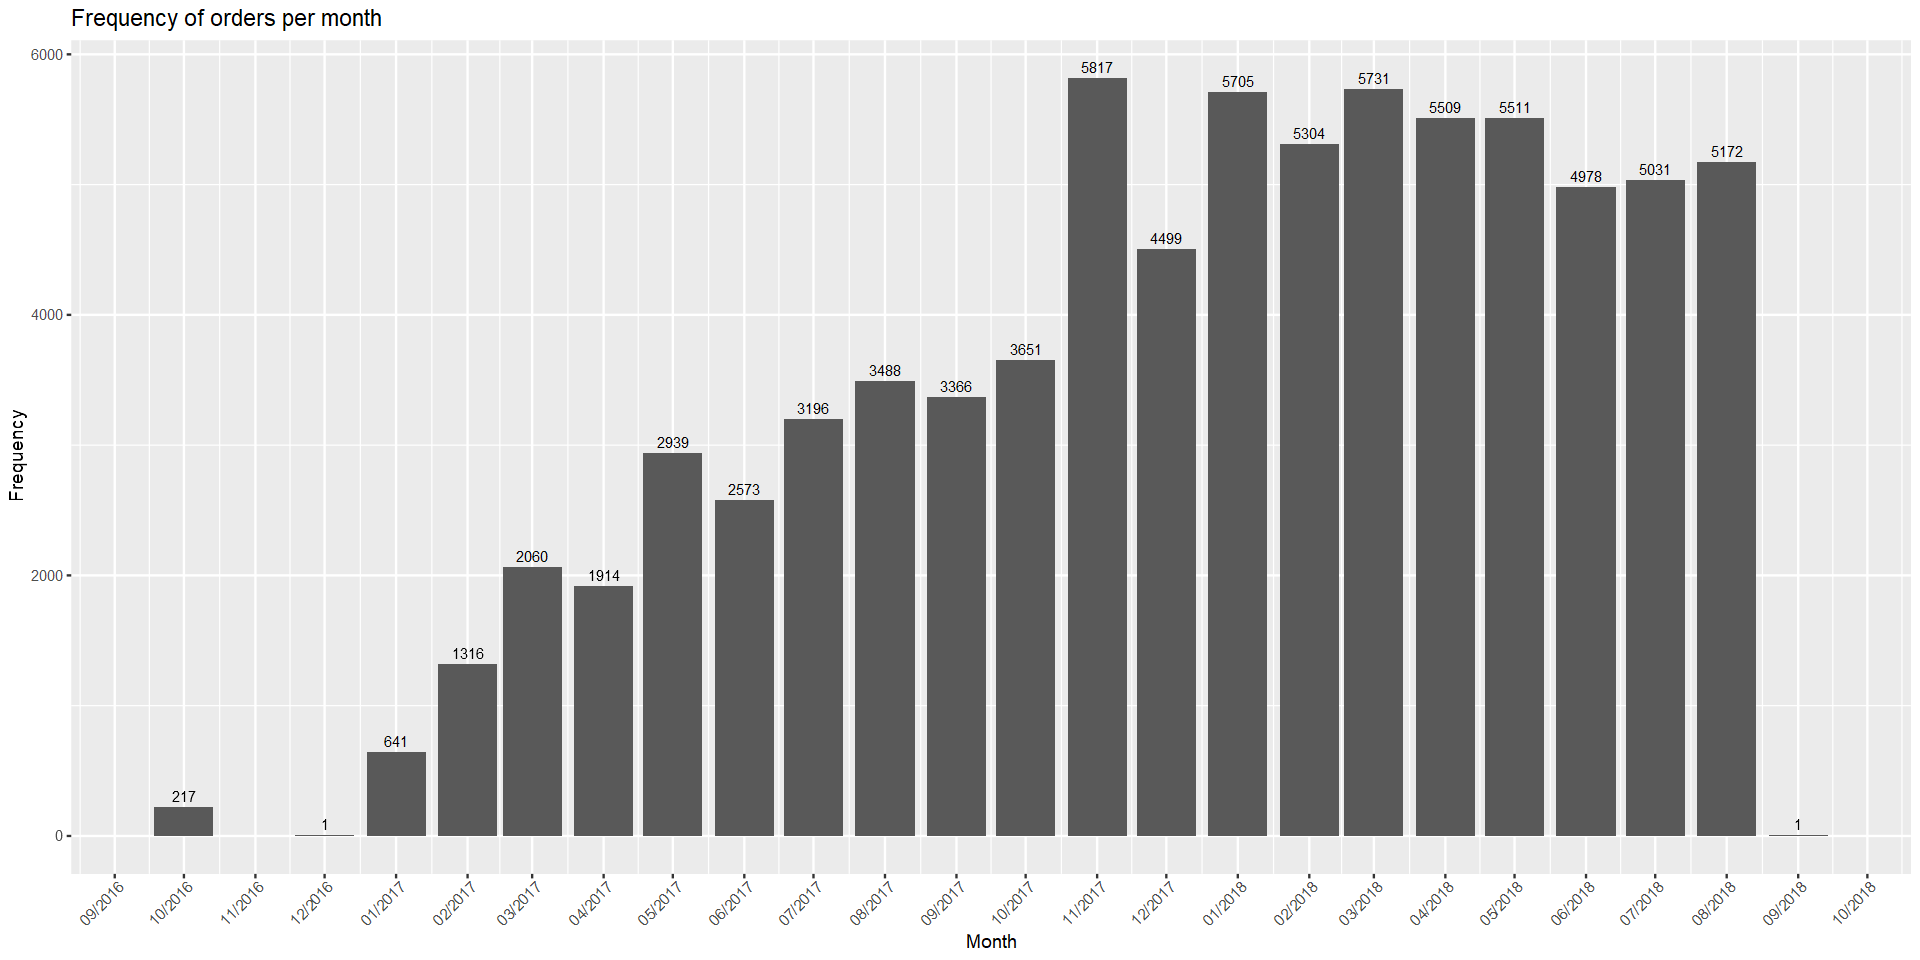

In [63]:
freq_por_mes <- filter3 %>%
  group_by(month = lubridate::floor_date(purchase_date, unit = "month")) %>%
  summarise(count = n())
ggplot(freq_por_mes, aes(x = month, y = count)) +
  geom_bar(stat = "identity") +
  scale_x_date(date_breaks = "1 month", date_labels = "%m/%Y") +
  labs(x = "Month", y = "Frequency", title = "Frequency of orders per month")+
  geom_text(aes(label = count), vjust = -0.5, size = 3) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

#### Data preparation

In [65]:
# Set date today and data cut-off
today2 <- as.Date("2017-12-31")
# Define dataframe with previous cut-off data
cut_data2 <- filter3 %>% filter(purchase_date <= as.Date("2017-12-31")) %>% filter(purchase_date >= as.Date("2017-01-01"))
# Group data with customer granularity and feature calculation
customer_data2 <- cut_data2 %>%
  group_by(customer_unique) %>%
  summarize(first_order = min(purchase_date),
            last_order = max(purchase_date),
            frequency = n_distinct(order_id),
            monetary_value = sum(summed_payment),
            total_products = sum(nr_of_products),
            avg_catgery_products = mean(nr_of_category),
            avg_price = mean(summed_price),
            avg_freight = mean(summed_freight),
            avg_number_payments = mean(nr_of_payments),
            avg_number_of_payment_type = mean(payment_installments),
            avg_payment_installments = mean(payment_installments))%>%
  mutate(recency = as.numeric(difftime(today2, last_order, units = "days")), 
         life_time = as.numeric(difftime(today2,first_order, units = "days")),
         UPT = total_products/frequency,
         TM = monetary_value/ frequency)
# Add new metrics to relativize recent customers from non-recent ones     
#relative recency
customer_data2 <- customer_data2 %>%
  mutate(real_recency = 1-recency/life_time)
#relative frequency
customer_data2 <- customer_data2 %>%
  mutate(real_frequency = frequency/life_time)
#relative monetary_value
customer_data2 <- customer_data2 %>%
  mutate(real_monetary_value = monetary_value/life_time)
# Create dataframe with post-cut-off data
future_data2 <- filter3 %>% 
  filter(purchase_date > as.Date("2018-01-01")) %>% 
  filter(purchase_date <= as.Date("2018-04-30"))
# From future_data, create a dataframe with unique customers
customer_unique_future2 <- data.frame(customer_unique = unique(future_data2$customer_unique))
# Check if the data after the cut-off contains customers who had already made purchases before and assign a target variable yes_buy= 1 and not_buy= 0
customer_data2$target <- as.integer(customer_data2$customer_unique %in% customer_unique_future2$customer_unique)
# Consider continuous variables
class_customer_iter2 <- customer_data2[4:20] 
# Transform the 'target' variable into a categorical variable
class_customer_iter2$target <- factor(class_customer_iter2$target, levels = 1:0,
                            labels = c("yes_buy", "not_buy"))
# View occurrences of the target variable
table(customer_data2$target)


    0     1 
34266   273 

#### We will not consider 111 records with values ​​inf, Nan

In [66]:
class_customer_iter2 <- class_customer_iter2[complete.cases(class_customer_iter2), ]

#### Split the data into training and testing, fitting and model training

Random Forest 

27588 samples
   16 predictor
    2 classes: 'yes_buy', 'not_buy' 

No pre-processing
Resampling: Cross-Validated (3 fold, repeated 2 times) 
Summary of sample sizes: 18392, 18392, 18392, 18391, 18392, 18393, ... 
Resampling results across tuning parameters:

  mtry  ROC        Sens        Spec     
   2    0.5532442  0.00000000  0.9999817
   9    0.5453598  0.00456621  0.9996712
  16    0.5437068  0.00456621  0.9996529

ROC was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.


Confusion Matrix and Statistics

          Reference
Prediction yes_buy not_buy
   yes_buy       0       0
   not_buy      54    6842
                                          
               Accuracy : 0.9922          
                 95% CI : (0.9898, 0.9941)
    No Information Rate : 0.9922          
    P-Value [Acc > NIR] : 0.5361          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : 5.498e-13       
                                          
            Sensitivity : 0.000000        
            Specificity : 1.000000        
         Pos Pred Value :      NaN        
         Neg Pred Value : 0.992169        
              Precision :       NA        
                 Recall : 0.000000        
                     F1 :       NA        
             Prevalence : 0.007831        
         Detection Rate : 0.000000        
   Detection Prevalence : 0.000000        
      

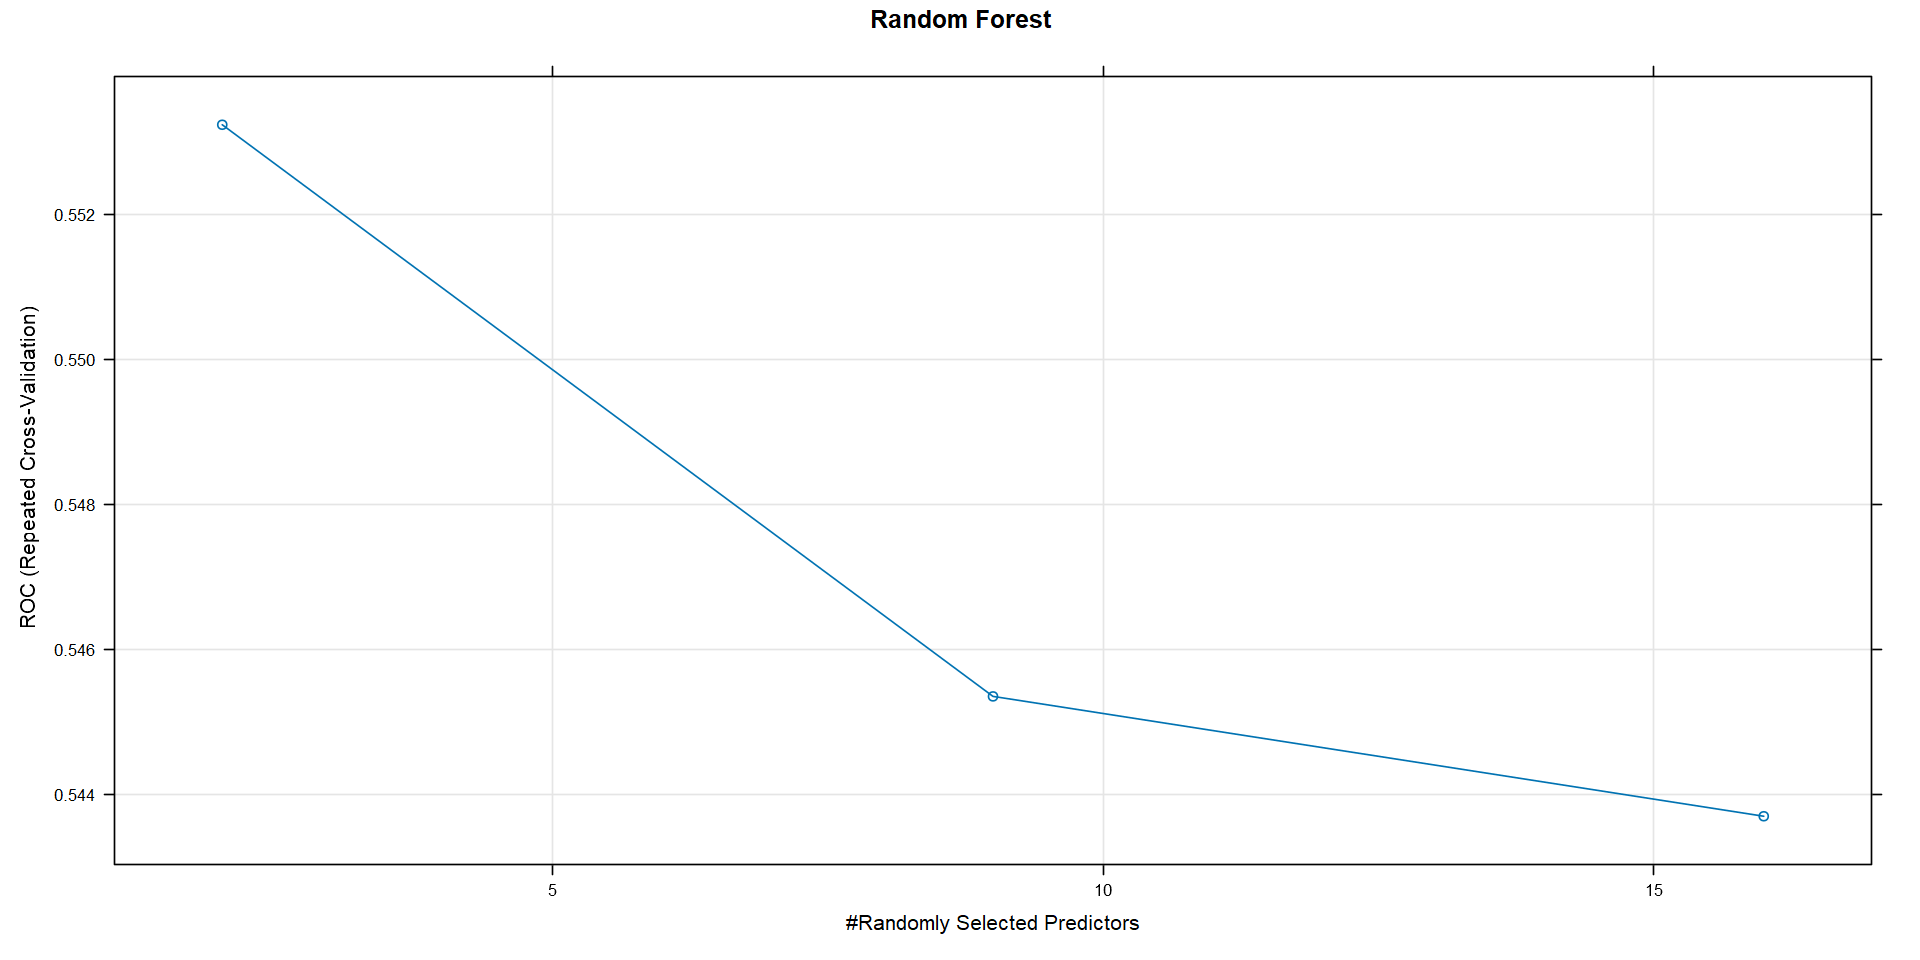

In [67]:
seed <- 377
set.seed(seed)
train_index <- createDataPartition(class_customer_iter2$target, p = 0.8, list = FALSE)
train_set <- class_customer_iter2[train_index, ]
test_set <- class_customer_iter2[-train_index, ]
# Define model parameters
metric <- "ROC"
control <- trainControl(method = "repeatedcv", 
                        number = 3, 
                        summaryFunction = twoClassSummary, 
                        classProbs = TRUE,
                        savePredictions = TRUE,
                        repeats = 2) 
# Train random forest model
set.seed(seed)
model_RF2 <- train(target ~ .,
                  data = train_set,
                  method = 'rf',
                  metric = metric,
                  trControl = control)
# View model results
print(model_RF2)
# Plot ROC 
plot(model_RF2, main = "Random Forest")
# Validate model on test data
predictions_prob <- predict(model_RF2, test_set, type = "prob")
predictions_raw  <- predict(model_RF2, test_set, type = "raw")
# ConfusionMatrix
confusionMatrix(predictions_raw, test_set$target, mode = "everything")

#### Compare models


Call:
summary.resamples(object = results)

Models: Random_forest_iter1, Random_forest_tune_iter1, Random_forest_iter2 
Number of resamples: 6 

ROC 
                              Min.   1st Qu.    Median      Mean   3rd Qu.
Random_forest_iter1      0.4880607 0.4937968 0.5030762 0.5052373 0.5146232
Random_forest_tune_iter1 0.4851189 0.4944550 0.5037640 0.5039445 0.5146895
Random_forest_iter2      0.5283798 0.5401523 0.5442551 0.5532442 0.5533836
                              Max. NA's
Random_forest_iter1      0.5280347    0
Random_forest_tune_iter1 0.5213365    0
Random_forest_iter2      0.6073637    0

Sens 
                         Min. 1st Qu.      Median        Mean     3rd Qu.
Random_forest_iter1         0       0 0.008196721 0.008219302 0.016393443
Random_forest_tune_iter1    0       0 0.004098361 0.005487061 0.008196721
Random_forest_iter2         0       0 0.000000000 0.000000000 0.000000000
                               Max. NA's
Random_forest_iter1      0.01652893    0
Rando

Setting levels: control = yes_buy, case = not_buy

Setting direction: controls < cases

Setting levels: control = yes_buy, case = not_buy

Setting direction: controls < cases

Setting levels: control = yes_buy, case = not_buy

Setting direction: controls > cases



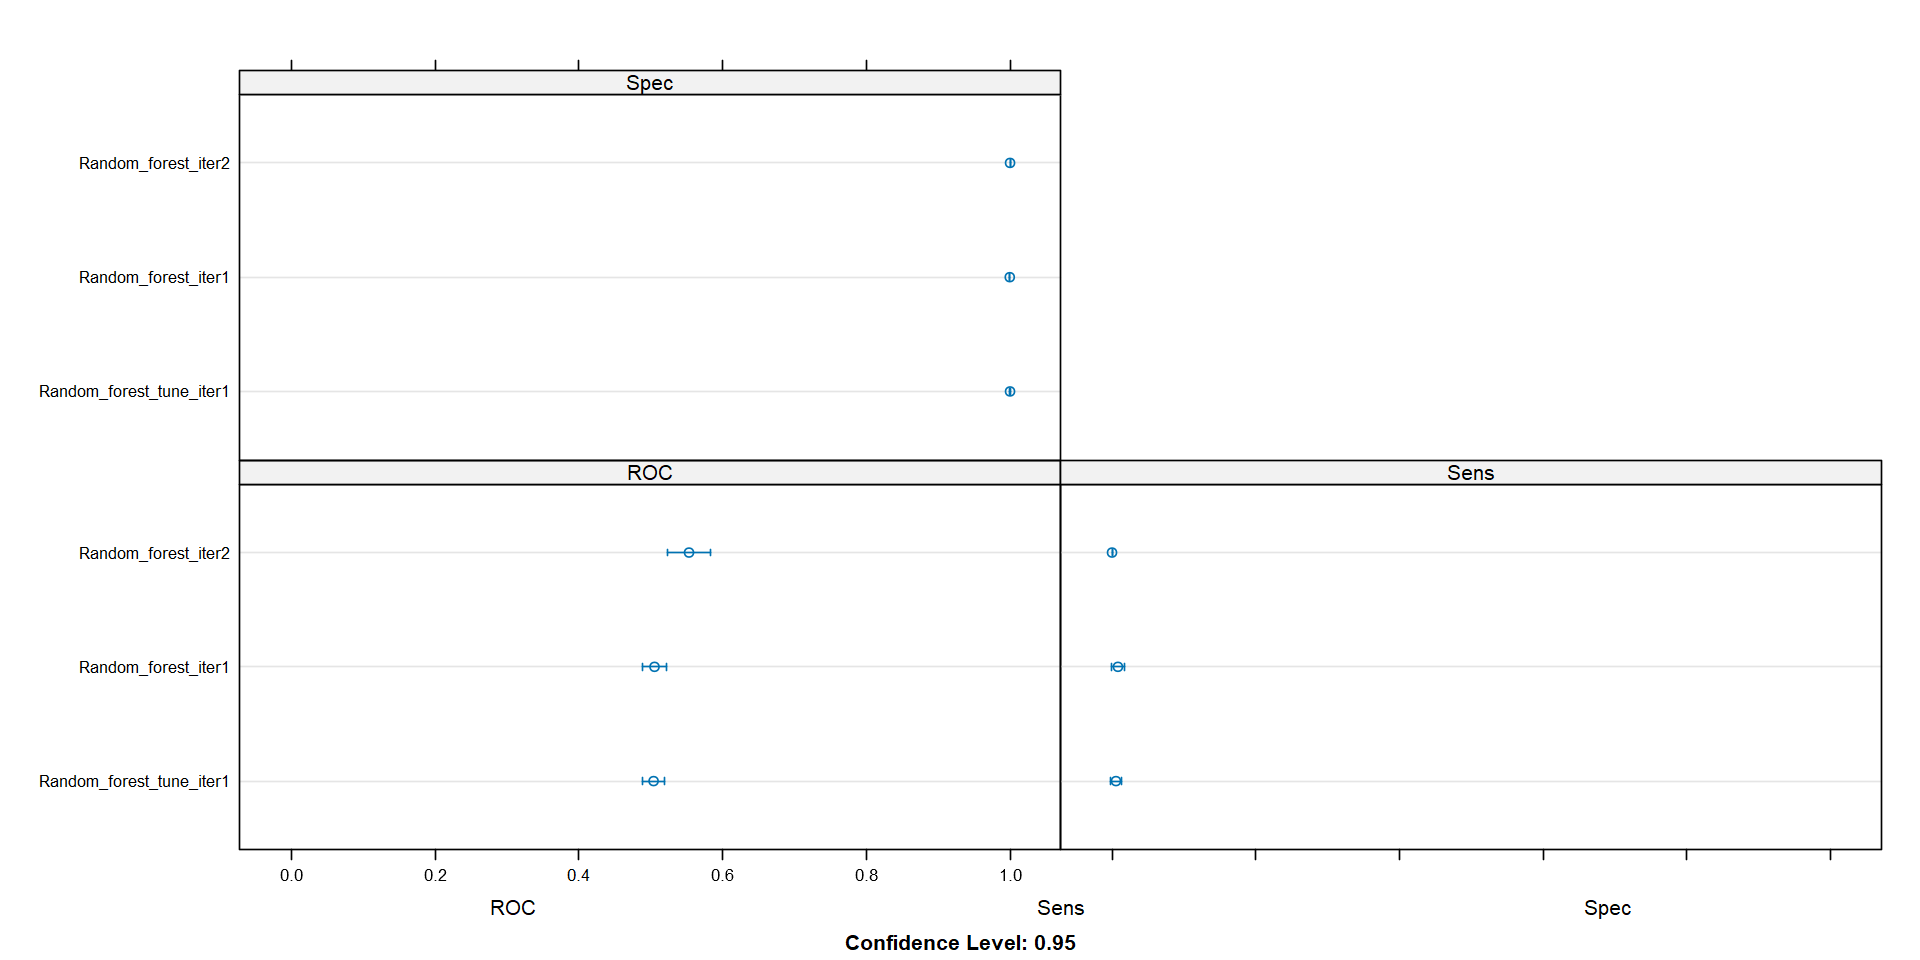

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

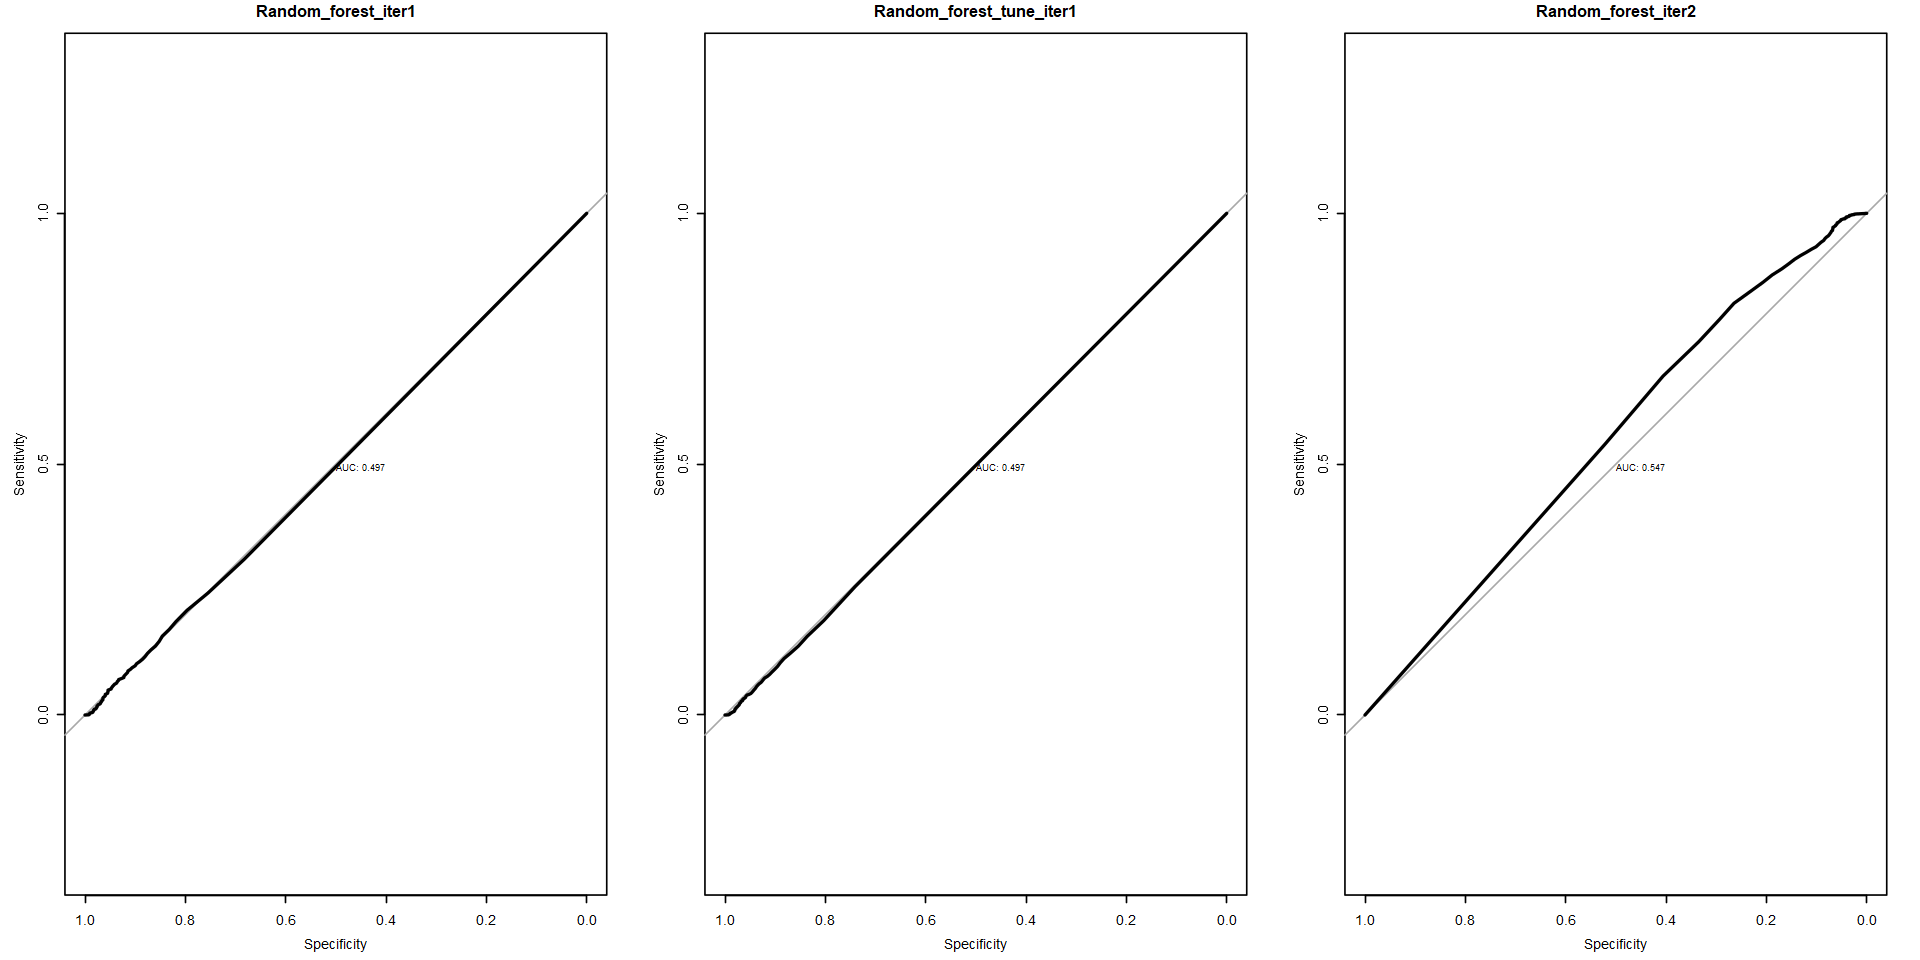

In [72]:
fit_models <- list(Random_forest_iter1 = model_RF, 
                   Random_forest_tune_iter1 = model_rf_tune,
                   Random_forest_iter2 = model_RF2)
results <- resamples(fit_models)
summary(results)
dotplot(results)
# model ROC curves
par(mfrow = c(1,3))
lapply(names(fit_models), function(name) {
  fit <- fit_models[[name]]
  plot.roc(fit$pred$obs, fit$pred$yes_buy,
           print.auc = TRUE)
  title(main = name, line = 3)
})

#### Importance of the variables used in the model

                              Overall
frequency                   11.017614
monetary_value             100.000000
total_products               7.992547
avg_catgery_products         0.000000
avg_price                   79.415441
avg_freight                 74.445178
avg_number_payments          2.594805
avg_number_of_payment_type  21.655673
avg_payment_installments    21.703453
recency                     65.601692
life_time                   66.528077
UPT                          5.338640
TM                          97.377040
real_recency                11.376744
real_frequency              67.376557
real_monetary_value         98.939059


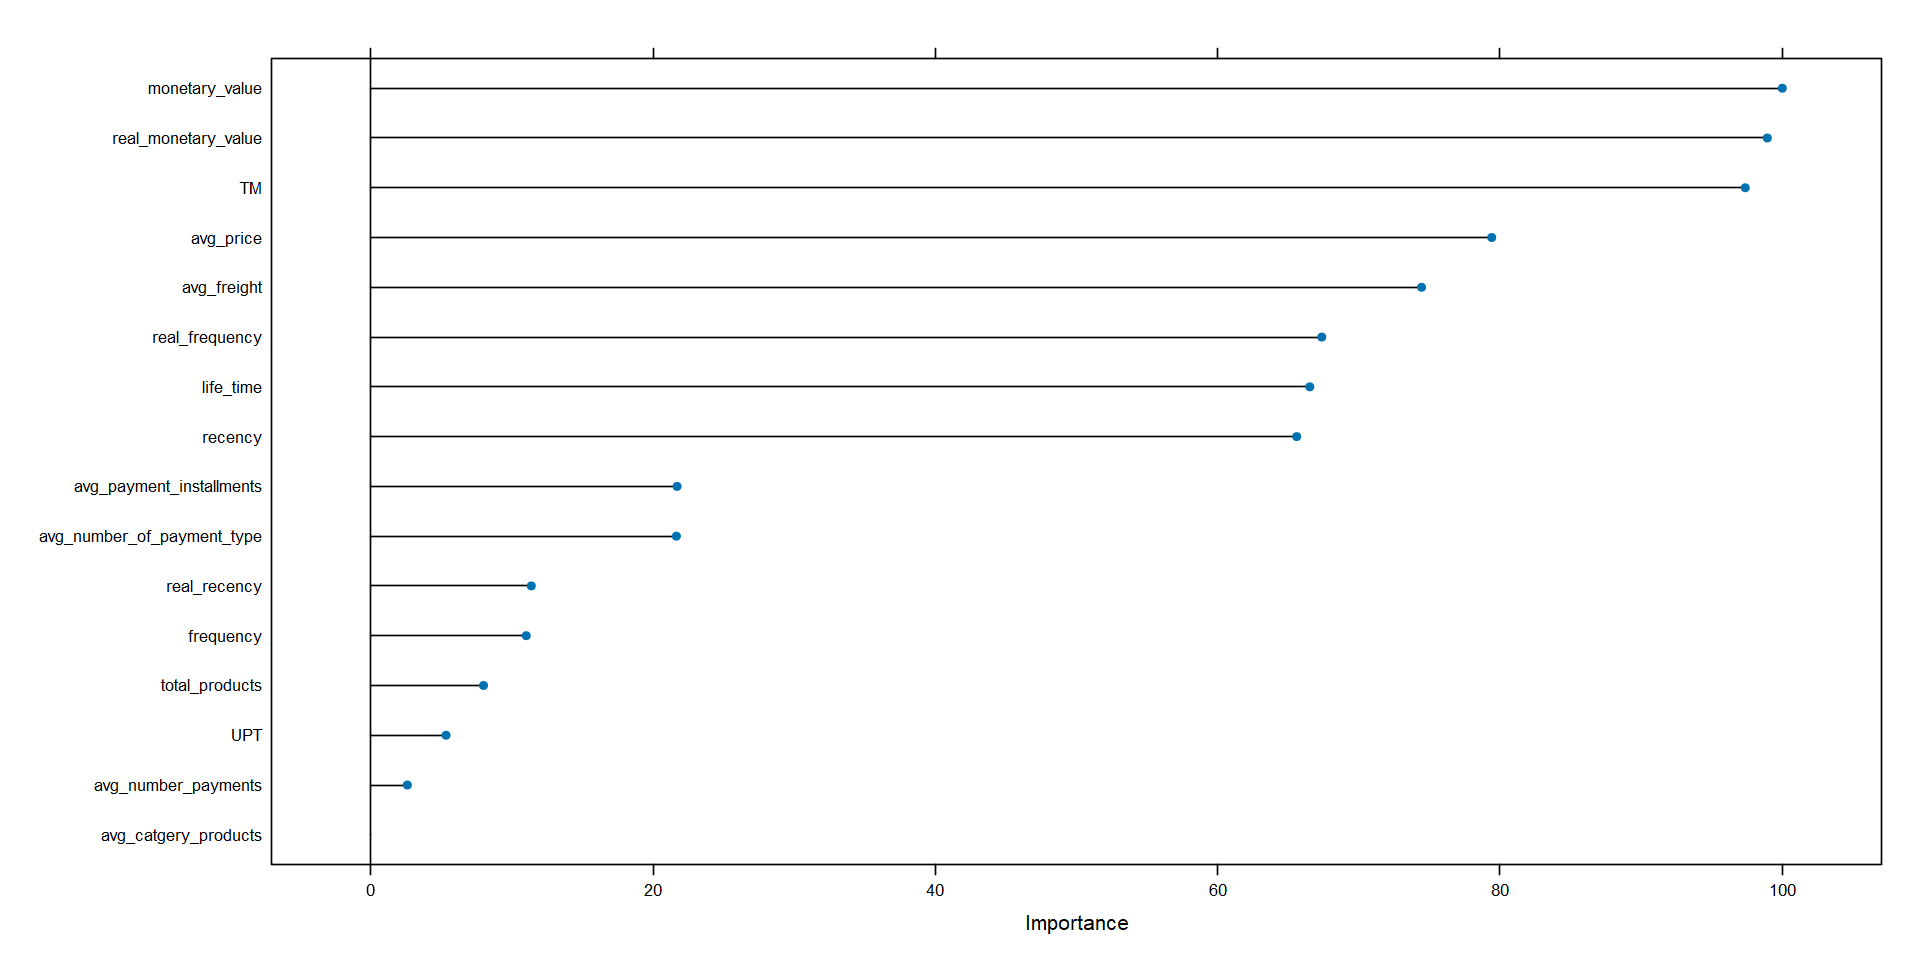

In [69]:
# Getting the importance of variables
imp <- varImp(model_RF2)
# Creating a bar chart to visualize the importance of variables
plot(imp)
# Displaying the table with the importance of the variables
print(as.data.frame(imp$importance))

#### Iteration 3

In this iteration we will use only the most important variables

Random Forest 

27588 samples
    8 predictor
    2 classes: 'yes_buy', 'not_buy' 

No pre-processing
Resampling: Cross-Validated (3 fold, repeated 2 times) 
Summary of sample sizes: 18392, 18392, 18392, 18391, 18392, 18393, ... 
Resampling results across tuning parameters:

  mtry  ROC        Sens        Spec     
  2     0.5331762  0.00000000  0.9996529
  5     0.5335279  0.00000000  0.9996164
  8     0.5207887  0.00456621  0.9996164

ROC was used to select the optimal model using the largest value.
The final value used for the model was mtry = 5.


Confusion Matrix and Statistics

          Reference
Prediction yes_buy not_buy
   yes_buy       0       1
   not_buy      54    6841
                                         
               Accuracy : 0.992          
                 95% CI : (0.9896, 0.994)
    No Information Rate : 0.9922         
    P-Value [Acc > NIR] : 0.5895         
                                         
                  Kappa : -3e-04         
                                         
 Mcnemar's Test P-Value : 2.355e-12      
                                         
            Sensitivity : 0.000000       
            Specificity : 0.999854       
         Pos Pred Value : 0.000000       
         Neg Pred Value : 0.992168       
              Precision : 0.000000       
                 Recall : 0.000000       
                     F1 :      NaN       
             Prevalence : 0.007831       
         Detection Rate : 0.000000       
   Detection Prevalence : 0.000145       
      Balanced Accuracy : 

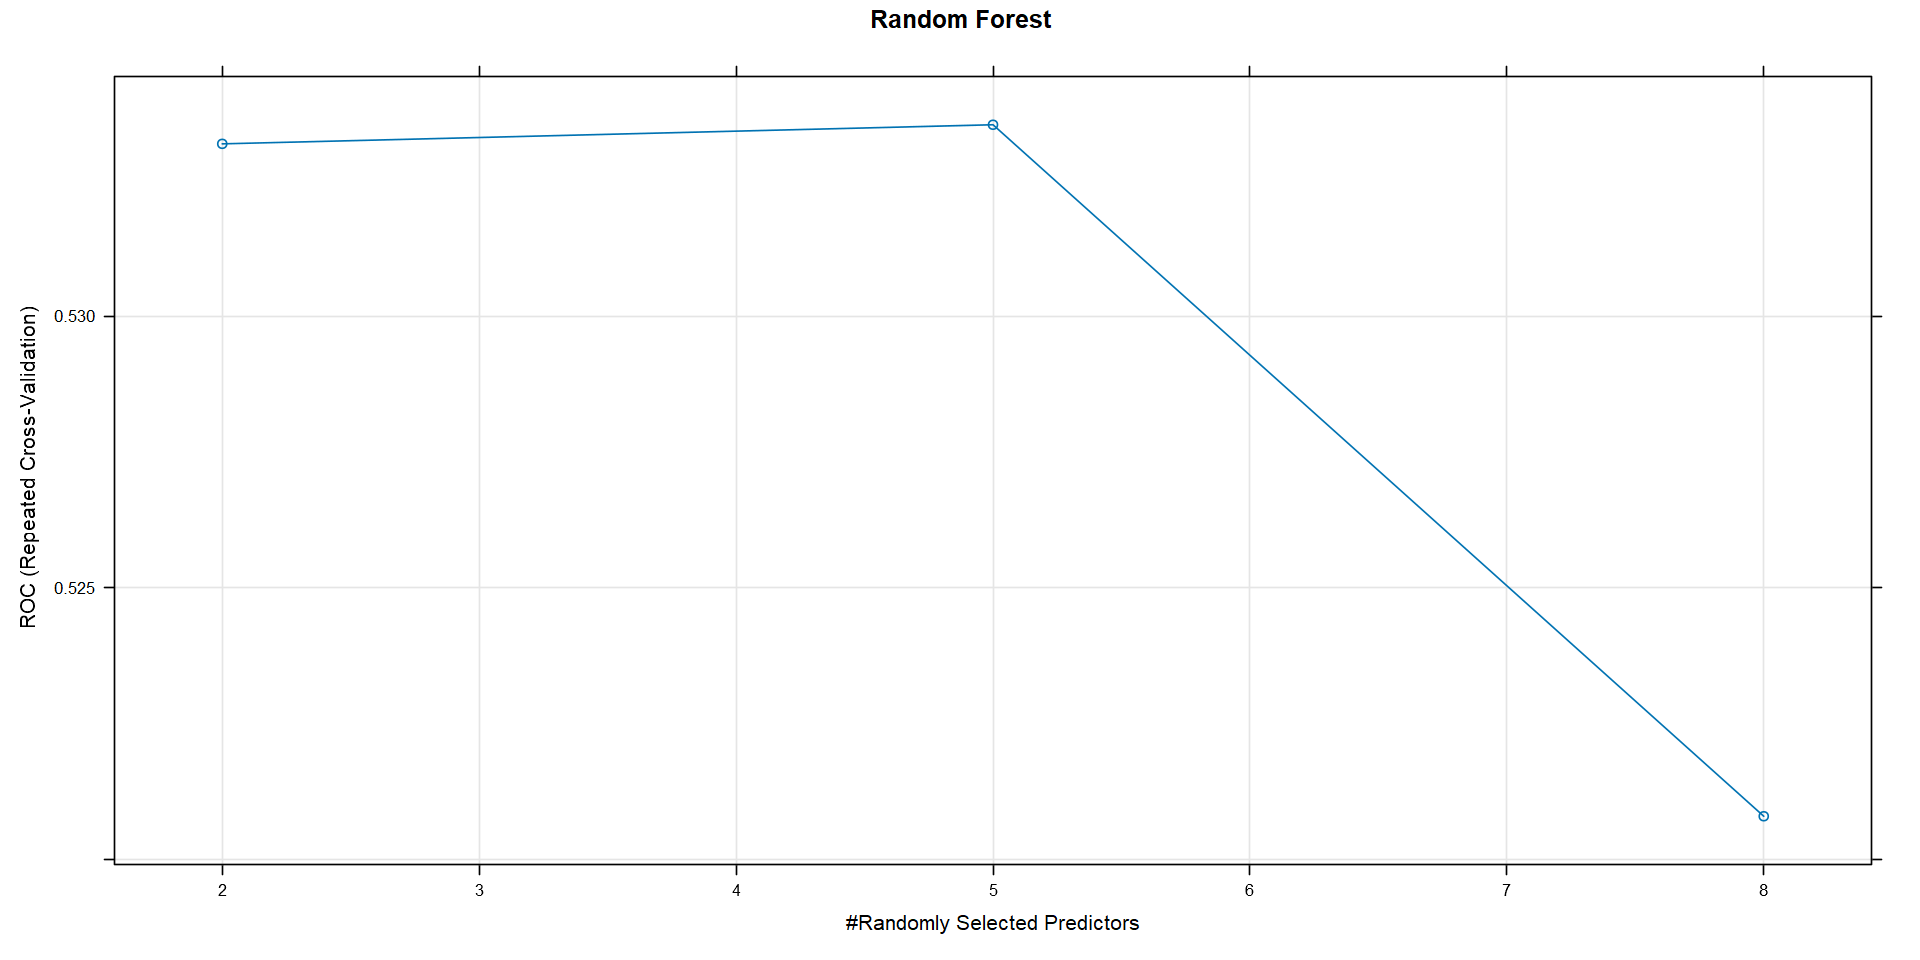

In [70]:
# Select data
class_customer_iter3 <- select(class_customer_iter2, real_monetary_value,avg_freight,TM,avg_price,monetary_value,real_frequency,recency,life_time,target)
# Train & Test
seed <- 377
set.seed(seed)
train_index <- createDataPartition(class_customer_iter3$target, p = 0.8, list = FALSE)
train_set <- class_customer_iter3[train_index, ]
test_set <- class_customer_iter3[-train_index, ]
# Fit Model
metric <- "ROC"
control <- trainControl(method = "repeatedcv", 
                        number = 3, 
                        summaryFunction = twoClassSummary, 
                        classProbs = TRUE,
                        savePredictions = TRUE,
                        repeats = 2) 
# Train model
set.seed(seed)
model_RF3 <- train(target ~ .,
                  data = train_set,
                  method = 'rf',
                  metric = metric,
                  trControl = control)
# View Results
print(model_RF3)
# Plot ROC vs parameters used in the model
plot(model_RF3, main = "Random Forest")
# Validate model on test data
predictions_prob <- predict(model_RF3, test_set, type = "prob")
predictions_raw  <- predict(model_RF3, test_set, type = "raw")
# ConfusionMatrix
confusionMatrix(predictions_raw, test_set$target, mode = "everything")

#### Compare models


Call:
summary.resamples(object = results)

Models: Random_forest_iter1, Random_forest_tune_iter1, Random_forest_iter2, Random_forest_iter3 
Number of resamples: 6 

ROC 
                              Min.   1st Qu.    Median      Mean   3rd Qu.
Random_forest_iter1      0.4880607 0.4937968 0.5030762 0.5052373 0.5146232
Random_forest_tune_iter1 0.4851189 0.4944550 0.5037640 0.5039445 0.5146895
Random_forest_iter2      0.5283798 0.5401523 0.5442551 0.5532442 0.5533836
Random_forest_iter3      0.4937817 0.5131157 0.5340352 0.5335279 0.5470141
                              Max. NA's
Random_forest_iter1      0.5280347    0
Random_forest_tune_iter1 0.5213365    0
Random_forest_iter2      0.6073637    0
Random_forest_iter3      0.5818322    0

Sens 
                         Min. 1st Qu.      Median        Mean     3rd Qu.
Random_forest_iter1         0       0 0.008196721 0.008219302 0.016393443
Random_forest_tune_iter1    0       0 0.004098361 0.005487061 0.008196721
Random_forest_iter2      

Setting levels: control = yes_buy, case = not_buy

Setting direction: controls < cases

Setting levels: control = yes_buy, case = not_buy

Setting direction: controls < cases

Setting levels: control = yes_buy, case = not_buy

Setting direction: controls > cases

Setting levels: control = yes_buy, case = not_buy

Setting direction: controls < cases



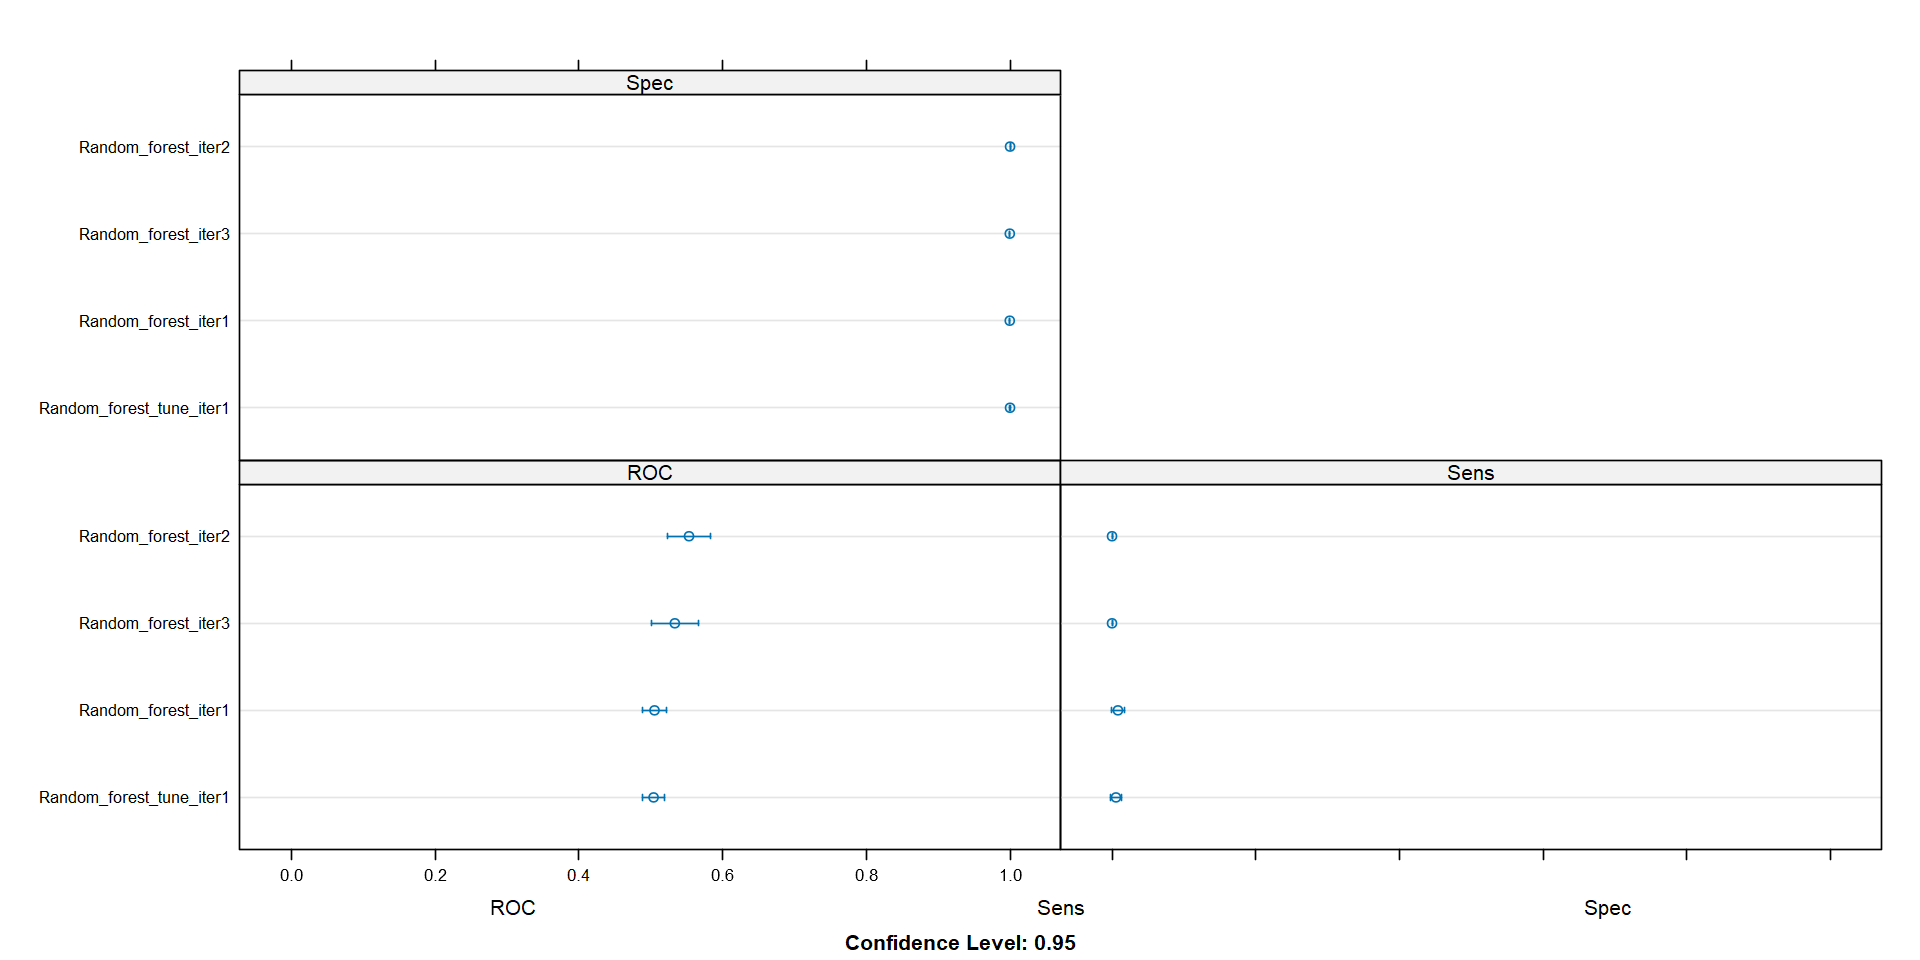

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

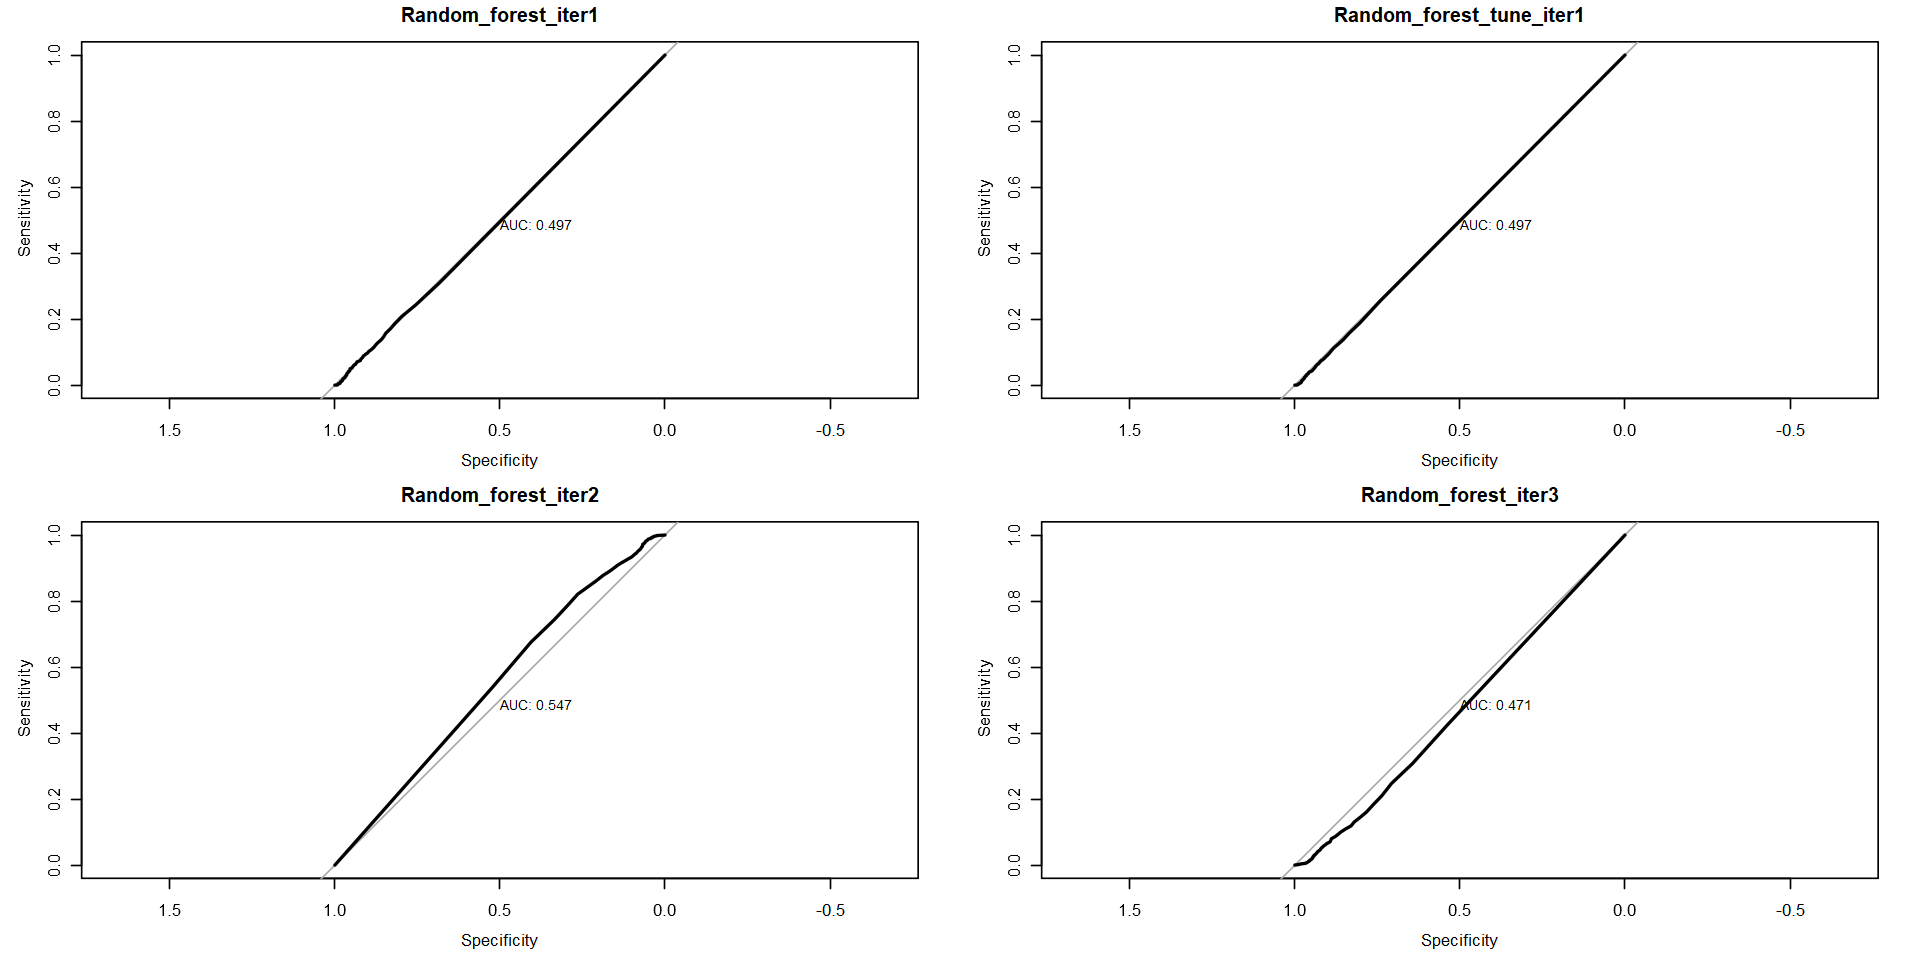

In [73]:
fit_models <- list(Random_forest_iter1 = model_RF, 
                   Random_forest_tune_iter1 = model_rf_tune,
                   Random_forest_iter2 = model_RF2,
                   Random_forest_iter3 = model_RF3)
results <- resamples(fit_models)
summary(results)
dotplot(results)
par(mfrow = c(2,2))
lapply(names(fit_models), function(name) {
  fit <- fit_models[[name]]
  plot.roc(fit$pred$obs, fit$pred$yes_buy,
           print.auc = TRUE)
  title(main = name, line = 3)
})

#### Adjustment of iter3 hyperparameters

In [74]:
tune_grid3 <- expand.grid(mtry = 1:8)
set.seed(seed)
model_rf_tune3 <- train(target ~., 
                       data = train_set,
                       method = "rf",
                       metric = metric,
                       trControl = control,
                       tuneGrid = tune_grid)

# Plot ROC vs parameters used in the model

Random Forest 

27588 samples
    8 predictor
    2 classes: 'yes_buy', 'not_buy' 

No pre-processing
Resampling: Cross-Validated (3 fold, repeated 2 times) 
Summary of sample sizes: 18392, 18392, 18392, 18391, 18392, 18393, ... 
Resampling results across tuning parameters:

  mtry  ROC        Sens  Spec     
  1     0.5180056  0     0.9998721
  2     0.5207485  0     0.9996894
  3     0.5264488  0     0.9996712

ROC was used to select the optimal model using the largest value.
The final value used for the model was mtry = 3.


Confusion Matrix and Statistics

          Reference
Prediction yes_buy not_buy
   yes_buy       0       1
   not_buy      54    6841
                                         
               Accuracy : 0.992          
                 95% CI : (0.9896, 0.994)
    No Information Rate : 0.9922         
    P-Value [Acc > NIR] : 0.5895         
                                         
                  Kappa : -3e-04         
                                         
 Mcnemar's Test P-Value : 2.355e-12      
                                         
            Sensitivity : 0.000000       
            Specificity : 0.999854       
         Pos Pred Value : 0.000000       
         Neg Pred Value : 0.992168       
              Precision : 0.000000       
                 Recall : 0.000000       
                     F1 :      NaN       
             Prevalence : 0.007831       
         Detection Rate : 0.000000       
   Detection Prevalence : 0.000145       
      Balanced Accuracy : 

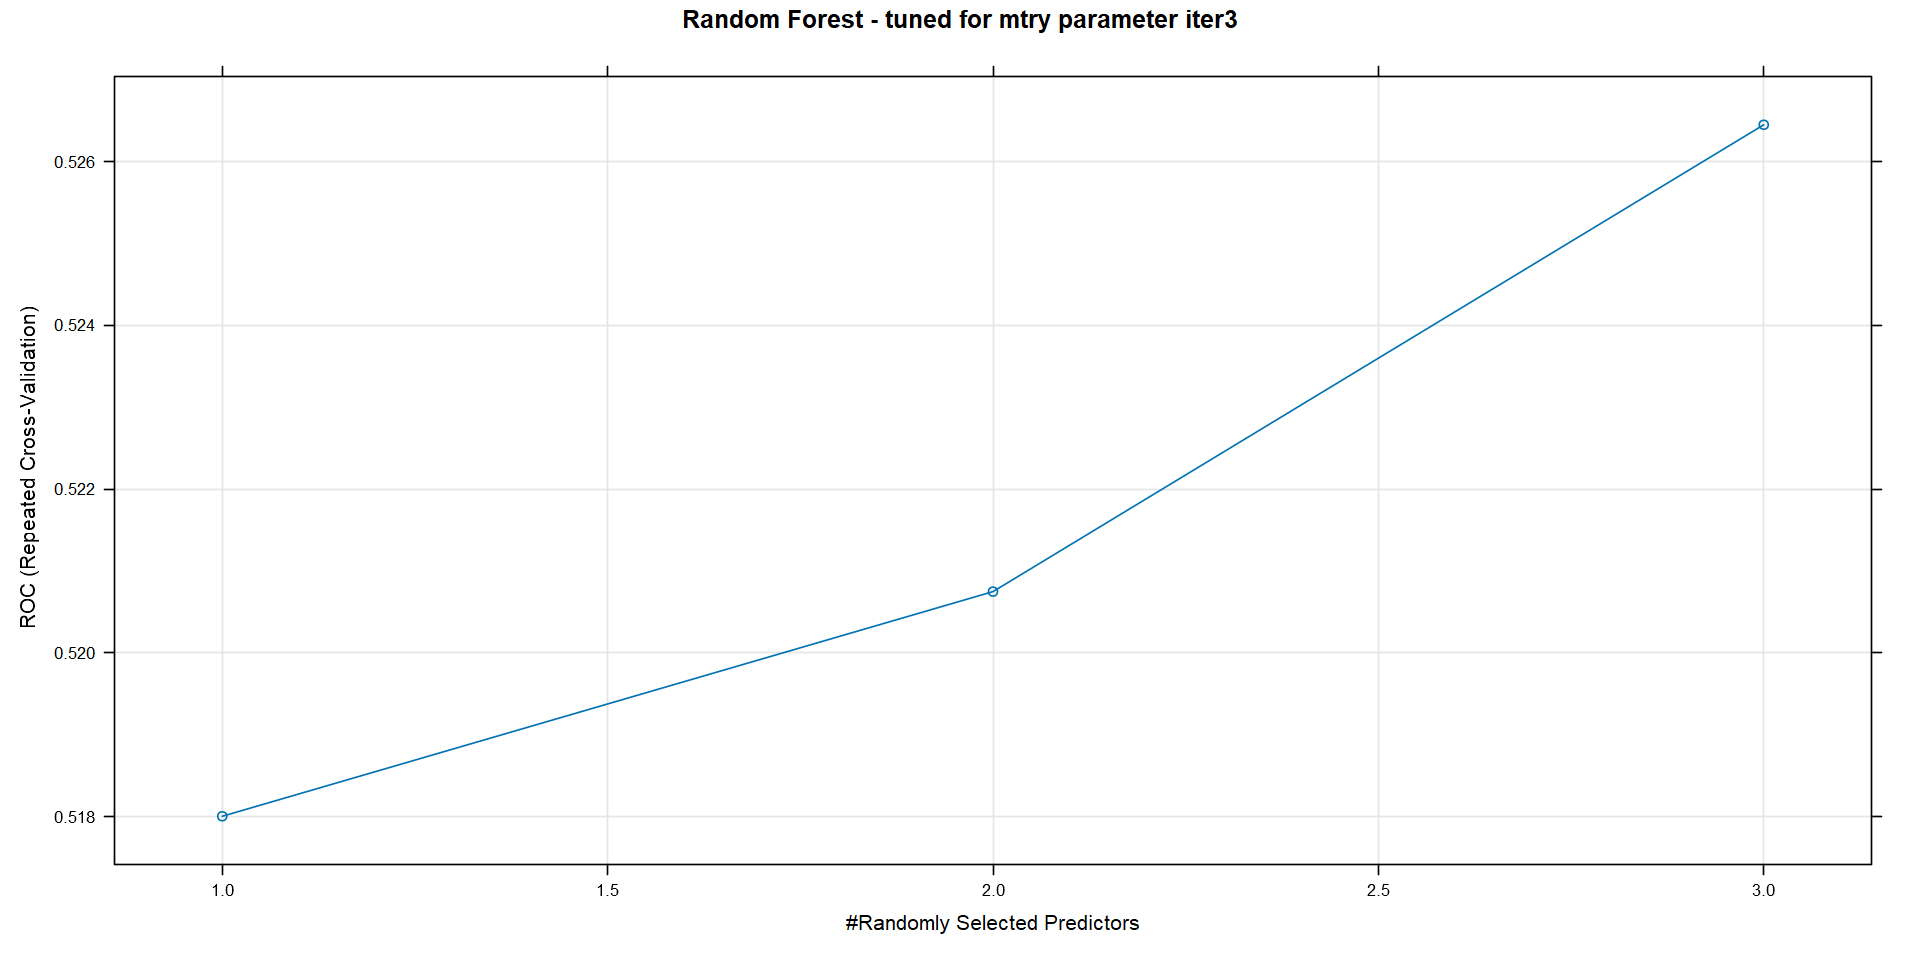

In [75]:
plot(model_rf_tune3, main = "Random Forest - tuned for mtry parameter iter3")
# Result Models
print(model_rf_tune3)
predictions_prob <- predict(model_rf_tune3, test_set, type = "prob")
predictions_raw  <- predict(model_rf_tune3, test_set, type = "raw")
# ConfusionMatrix
confusionMatrix(predictions_raw, test_set$target, mode = "everything")


#### Compare models


Call:
summary.resamples(object = results)

Models: Random_forest_iter1, Random_forest_tune_iter1, Random_forest_iter2, Random_forest_iter3, Random_forest_tune_iter3 
Number of resamples: 6 

ROC 
                              Min.   1st Qu.    Median      Mean   3rd Qu.
Random_forest_iter1      0.4880607 0.4937968 0.5030762 0.5052373 0.5146232
Random_forest_tune_iter1 0.4851189 0.4944550 0.5037640 0.5039445 0.5146895
Random_forest_iter2      0.5283798 0.5401523 0.5442551 0.5532442 0.5533836
Random_forest_iter3      0.4937817 0.5131157 0.5340352 0.5335279 0.5470141
Random_forest_tune_iter3 0.4881374 0.5176032 0.5230682 0.5264488 0.5432487
                              Max. NA's
Random_forest_iter1      0.5280347    0
Random_forest_tune_iter1 0.5213365    0
Random_forest_iter2      0.6073637    0
Random_forest_iter3      0.5818322    0
Random_forest_tune_iter3 0.5586618    0

Sens 
                         Min. 1st Qu.      Median        Mean     3rd Qu.
Random_forest_iter1         0   

Setting levels: control = yes_buy, case = not_buy

Setting direction: controls < cases

Setting levels: control = yes_buy, case = not_buy

Setting direction: controls < cases

Setting levels: control = yes_buy, case = not_buy

Setting direction: controls > cases

Setting levels: control = yes_buy, case = not_buy

Setting direction: controls < cases

Setting levels: control = yes_buy, case = not_buy

Setting direction: controls < cases



[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

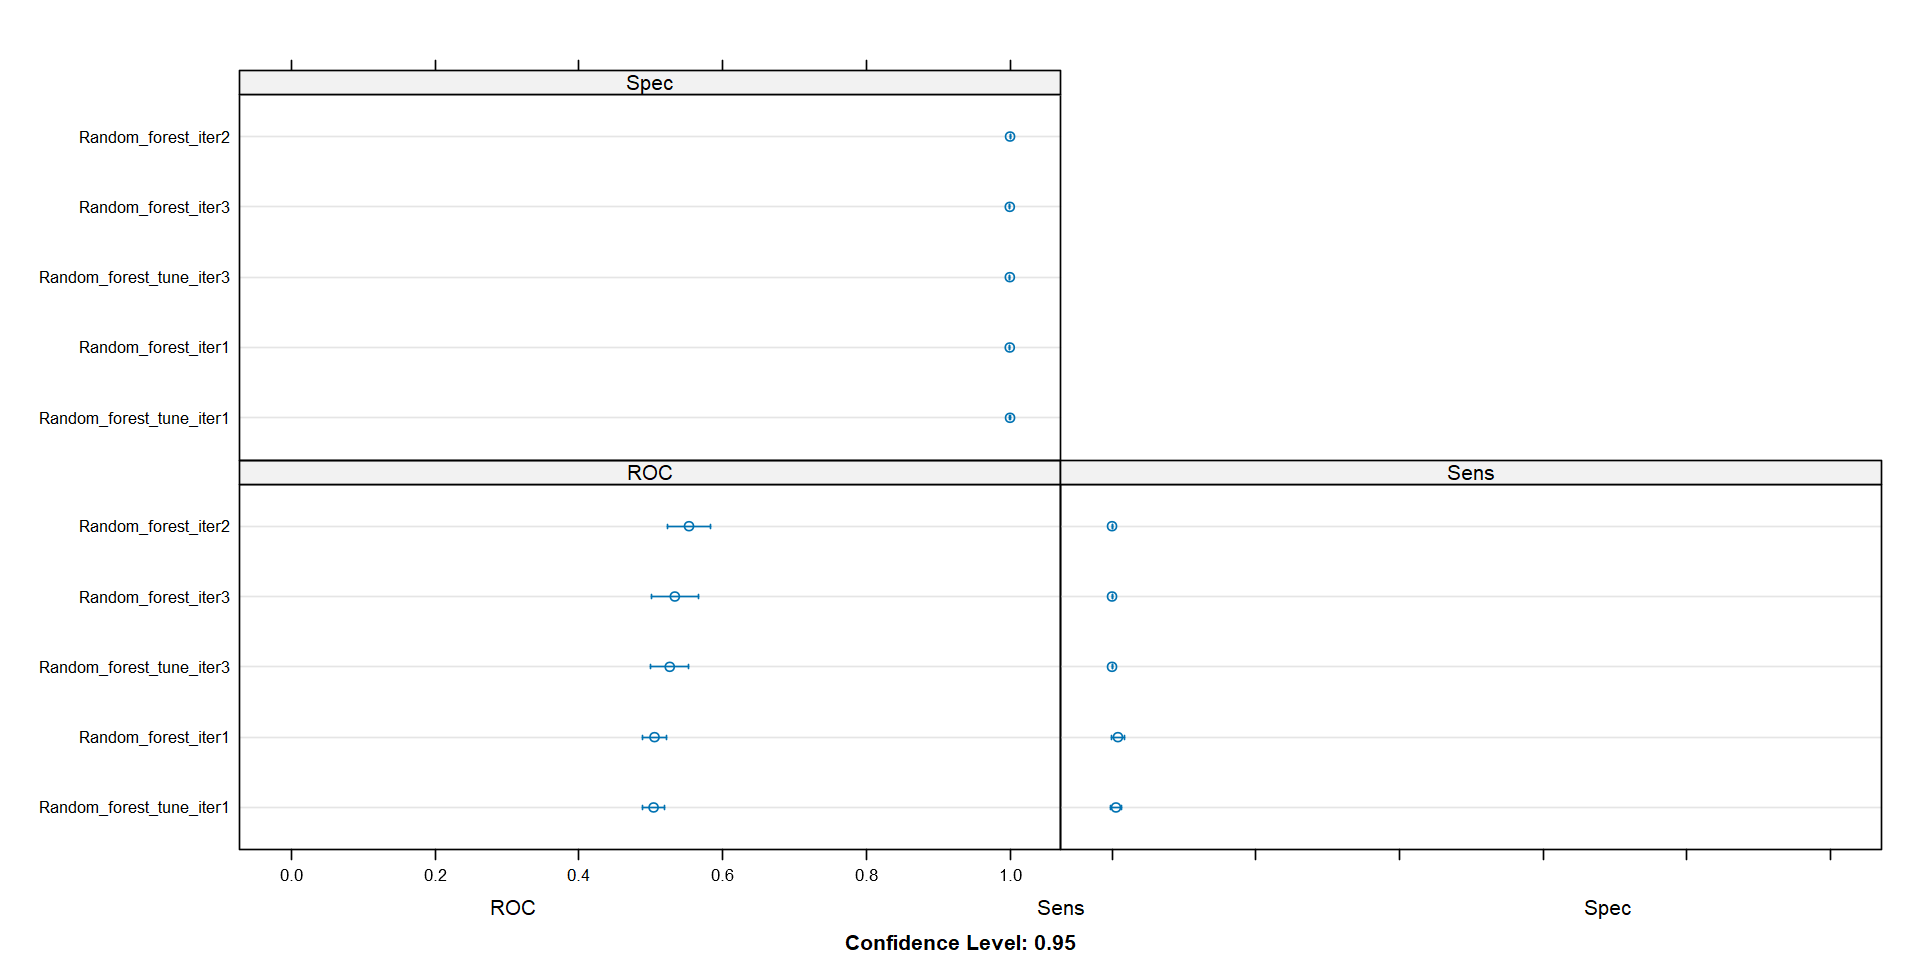

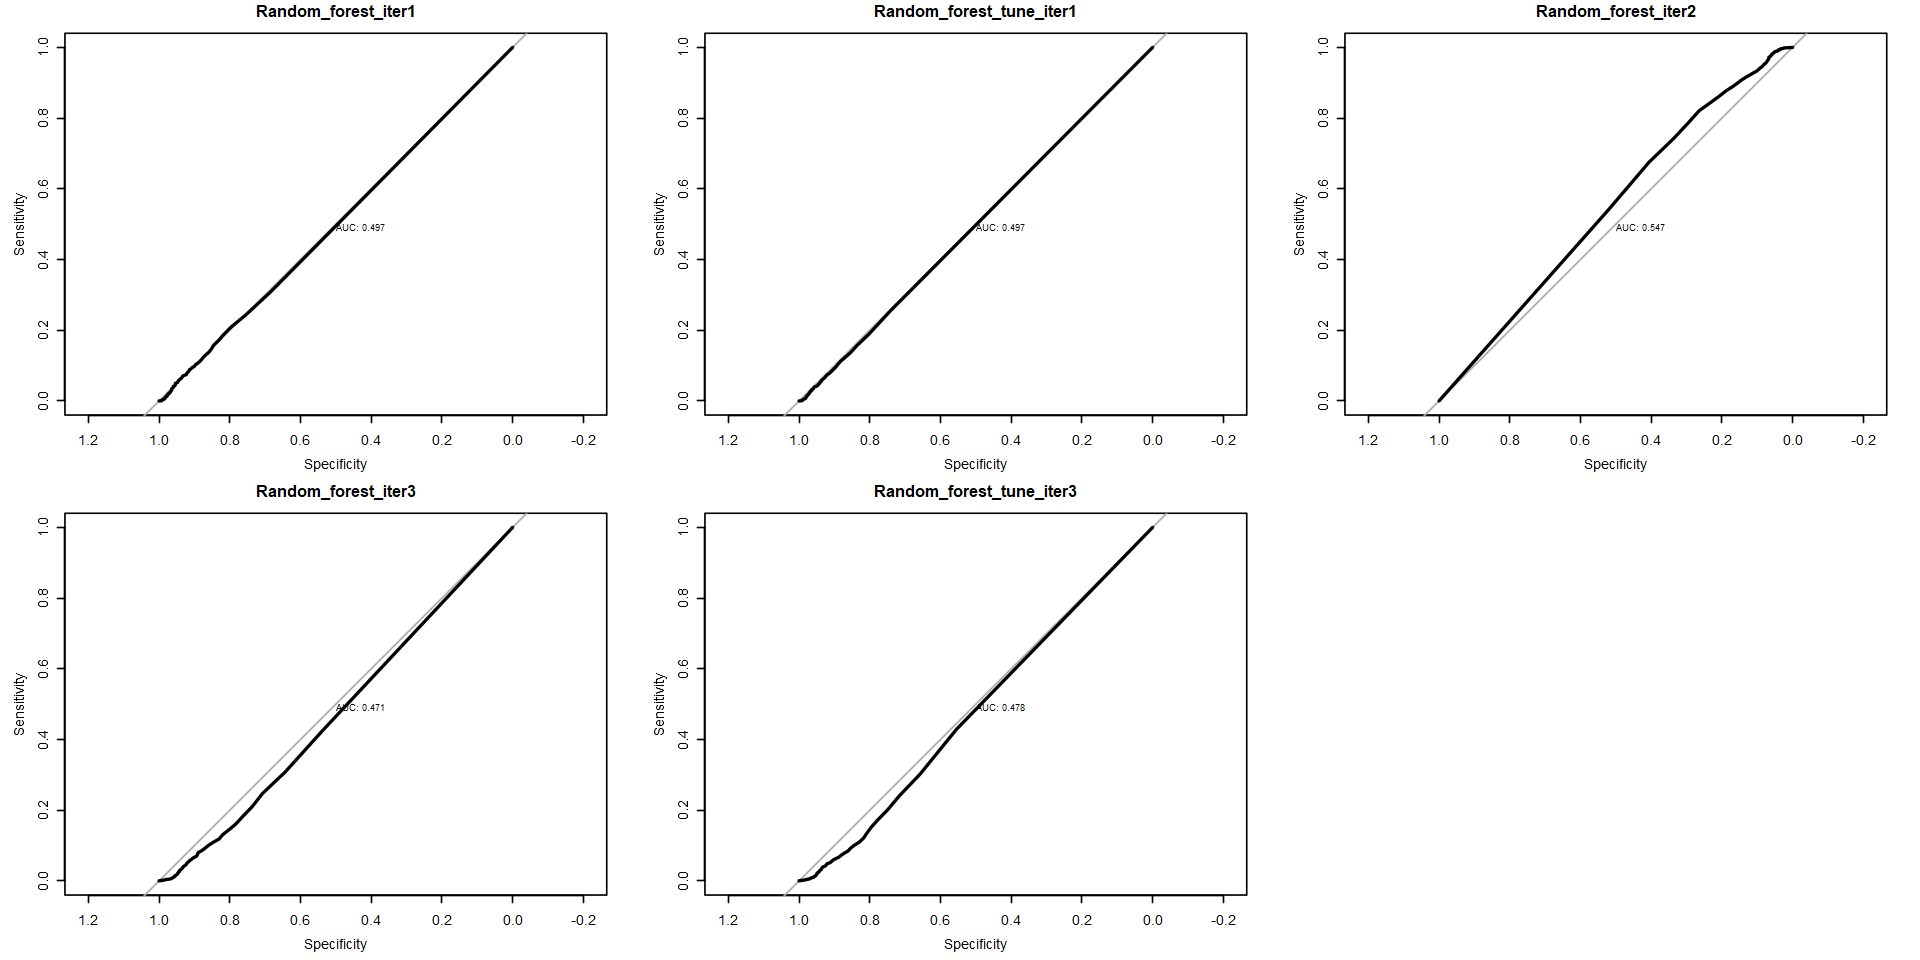

In [77]:
fit_models <- list(Random_forest_iter1 = model_RF, 
                   Random_forest_tune_iter1 = model_rf_tune,
                   Random_forest_iter2 = model_RF2,
                   Random_forest_iter3 = model_RF3,
                   Random_forest_tune_iter3 = model_rf_tune3)
results <- resamples(fit_models)
summary(results)
dotplot(results)
par(mfrow = c(2,3))
lapply(names(fit_models), function(name) {
  fit <- fit_models[[name]]
  plot.roc(fit$pred$obs, fit$pred$yes_buy,
           print.auc = TRUE)
  title(main = name, line = 3)
})

#### Iteration 4

In this iteration we will use the PCA

In [78]:
pca <- prcomp(class_customer_iter2[,-17],scale. = TRUE)
summary(pca)
# Get standard deviations from PCAs
pca$sdev
# get variance
pca.var <- pca$sdev ^2
pca.var
# variance ratio
pca.pvar <- pca.var / sum(pca.var)
# cumulative variance ratio
cumsum(pca.pvar)

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     1.9777 1.5443 1.4618 1.2880 1.22273 1.09064 1.00046
Proportion of Variance 0.2445 0.1491 0.1336 0.1037 0.09344 0.07434 0.06256
Cumulative Proportion  0.2445 0.3935 0.5271 0.6307 0.72418 0.79852 0.86108
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.96268 0.74717 0.61847 0.57891 0.10746 0.08436 0.03745
Proportion of Variance 0.05792 0.03489 0.02391 0.02095 0.00072 0.00044 0.00009
Cumulative Proportion  0.91900 0.95389 0.97780 0.99875 0.99947 0.99991 1.00000
                            PC15      PC16
Standard deviation     1.255e-14 3.725e-16
Proportion of Variance 0.000e+00 0.000e+00
Cumulative Proportion  1.000e+00 1.000e+00

[1] 1.977663e+00 1.544321e+00 1.461784e+00 1.287981e+00 1.222731e+00
 [6] 1.090638e+00 1.000462e+00 9.626830e-01 7.471655e-01 6.184736e-01
[11] 5.789068e-01 1.074632e-01 8.436302e-02 3.744531e-02 1.254884e-14
[16] 3.725198e-16

[1] 3.911151e+00 2.384928e+00 2.136812e+00 1.658894e+00 1.495072e+00
 [6] 1.189492e+00 1.000925e+00 9.267586e-01 5.582563e-01 3.825096e-01
[11] 3.351330e-01 1.154833e-02 7.117119e-03 1.402151e-03 1.574733e-28
[16] 1.387710e-31

[1] 0.2444470 0.3935050 0.5270557 0.6307366 0.7241786 0.7985219 0.8610797
 [8] 0.9190021 0.9538931 0.9778000 0.9987458 0.9994675 0.9999124 1.0000000
[15] 1.0000000 1.0000000

In [83]:
# How many components are needed to explain X variance?
CumVar = seq(0.5, 0.9, by = 0.1)
cbind(CumVar_perc = CumVar * 100,
      n_PCs = sapply(CumVar, function(x){which(cumsum(pca.pvar) >= x)[1]})
)
# Reduce the number of features while explaining x variability
n.components <- which(cumsum(pca.pvar) >= 0.75)[1]
cat("First", n.components, "components explain",
    round(cumsum(pca.pvar)[n.components] * 100, 3), "% variance.\n")
# Reduce dataset to the first chosen PCs
class_customer_pca <- as.data.frame(pca$x[,1:6])
class_customer_pca$target <- class_customer_iter2$target
head(class_customer_pca)

CumVar_perc,n_PCs
50,3
60,4
70,5
80,7
90,8


First 6 components explain 79.852 % variance.


,PC1,PC2,PC3,PC4,PC5,PC6,target
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.1932075,2.1963478,1.23492230,-1.8814489,0.92572574,1.19312776,not_buy
2,-0.7462957,-0.6184026,0.27165765,-0.6763463,0.50133889,-0.52870372,not_buy
3,0.5558870,-1.0714637,0.82037128,-1.1403087,0.49840329,-0.71964896,not_buy
4,-0.4193221,2.1334382,0.60495419,0.1573011,-0.26581747,1.06859769,not_buy
5,-1.2752470,0.4152800,0.06695608,0.1293568,0.02099396,0.08351183,not_buy
6,-0.7265501,0.1482928,0.30801092,-0.1482107,0.07310394,-0.13747228,not_buy


#### Create training and test data, and define parameters

Random Forest 

27588 samples
    6 predictor
    2 classes: 'yes_buy', 'not_buy' 

No pre-processing
Resampling: Cross-Validated (3 fold, repeated 2 times) 
Summary of sample sizes: 18392, 18392, 18392, 18391, 18392, 18393, ... 
Resampling results across tuning parameters:

  mtry  ROC        Sens         Spec     
  2     0.5641740  0.006849315  0.9997625
  4     0.5718163  0.006849315  0.9997443
  6     0.5758414  0.006849315  0.9997443

ROC was used to select the optimal model using the largest value.
The final value used for the model was mtry = 6.


Confusion Matrix and Statistics

          Reference
Prediction yes_buy not_buy
   yes_buy       0       0
   not_buy      54    6842
                                          
               Accuracy : 0.9922          
                 95% CI : (0.9898, 0.9941)
    No Information Rate : 0.9922          
    P-Value [Acc > NIR] : 0.5361          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : 5.498e-13       
                                          
            Sensitivity : 0.000000        
            Specificity : 1.000000        
         Pos Pred Value :      NaN        
         Neg Pred Value : 0.992169        
              Precision :       NA        
                 Recall : 0.000000        
                     F1 :       NA        
             Prevalence : 0.007831        
         Detection Rate : 0.000000        
   Detection Prevalence : 0.000000        
      

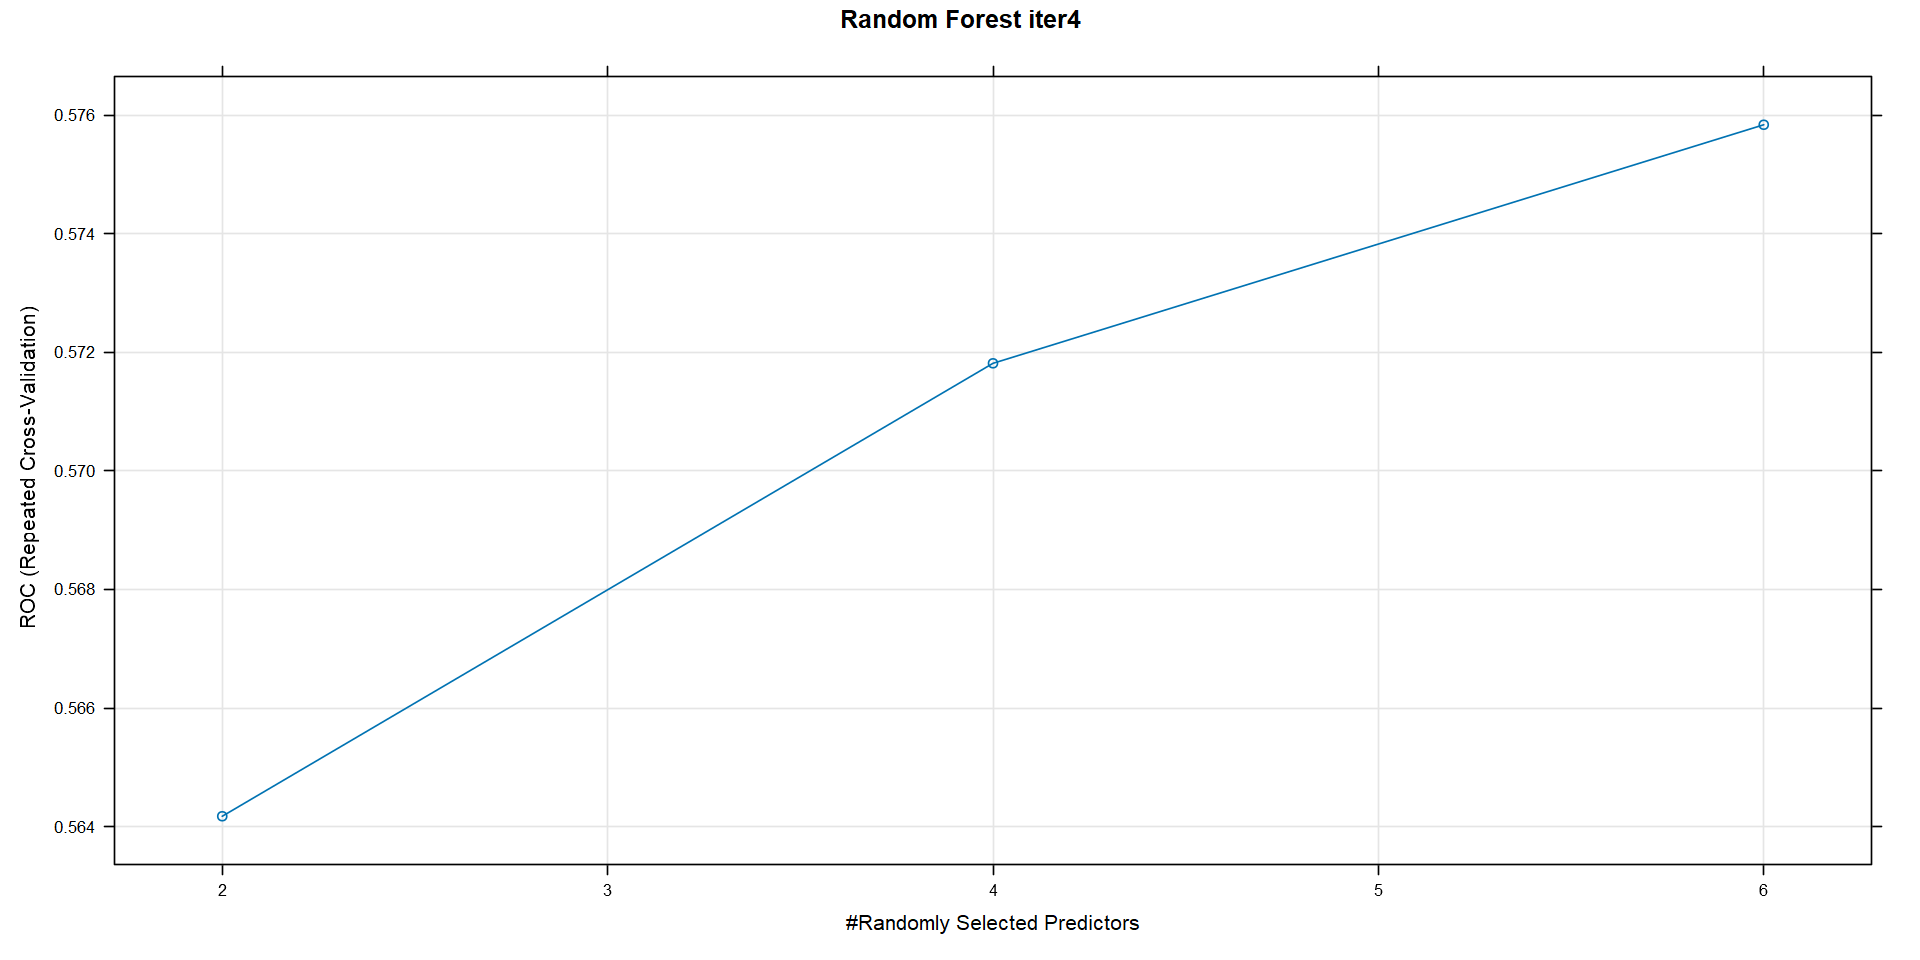

In [84]:
seed <- 377 #semente aleatória
set.seed(seed)
train_index <- createDataPartition(class_customer_pca$target, p = 0.8, list = FALSE)
train_set <- class_customer_pca[train_index, ]
test_set <- class_customer_pca[-train_index, ]

#metrica curva roc indicada para classificação binária
metric <- "ROC"
#metodo de validação cruzada com diferentes divisões aleatórias
control <- trainControl(method = "repeatedcv", 
                        # numero de folds
                        number = 3, 
                        # metricas de desempenho (classificação binária)
                        summaryFunction = twoClassSummary, 
                        # calculo de probabilidades
                        classProbs = TRUE,
                        # todas as previsões salvas
                        savePredictions = TRUE,
                        # nuero de vezes que a validação é cruzada
                        repeats =2 ) 
set.seed(seed)
model_RF4 <- train(target ~ .,
                  data = train_set,
                  method = 'rf',
                  metric = metric,
                  trControl = control)

print(model_RF4)
plot(model_RF4, main = "Random Forest iter4")
predictions_prob <- predict(model_RF4, test_set, type = "prob")
predictions_raw  <- predict(model_RF4, test_set, type = "raw")
confusionMatrix(predictions_raw, test_set$target, mode = "everything")

#### Compare models


Call:
summary.resamples(object = results)

Models: Random_forest_iter1, Random_forest_tune_iter1, Random_forest_iter2, Random_forest_iter3, Random_forest_tune_iter3, Random_forest_iter4 
Number of resamples: 6 

ROC 
                              Min.   1st Qu.    Median      Mean   3rd Qu.
Random_forest_iter1      0.4880607 0.4937968 0.5030762 0.5052373 0.5146232
Random_forest_tune_iter1 0.4851189 0.4944550 0.5037640 0.5039445 0.5146895
Random_forest_iter2      0.5283798 0.5401523 0.5442551 0.5532442 0.5533836
Random_forest_iter3      0.4937817 0.5131157 0.5340352 0.5335279 0.5470141
Random_forest_tune_iter3 0.4881374 0.5176032 0.5230682 0.5264488 0.5432487
Random_forest_iter4      0.5469806 0.5581671 0.5803695 0.5758414 0.5879718
                              Max. NA's
Random_forest_iter1      0.5280347    0
Random_forest_tune_iter1 0.5213365    0
Random_forest_iter2      0.6073637    0
Random_forest_iter3      0.5818322    0
Random_forest_tune_iter3 0.5586618    0
Random_forest_ite

Setting levels: control = yes_buy, case = not_buy

Setting direction: controls < cases

Setting levels: control = yes_buy, case = not_buy

Setting direction: controls < cases

Setting levels: control = yes_buy, case = not_buy

Setting direction: controls > cases

Setting levels: control = yes_buy, case = not_buy

Setting direction: controls < cases

Setting levels: control = yes_buy, case = not_buy

Setting direction: controls < cases

Setting levels: control = yes_buy, case = not_buy

Setting direction: controls < cases



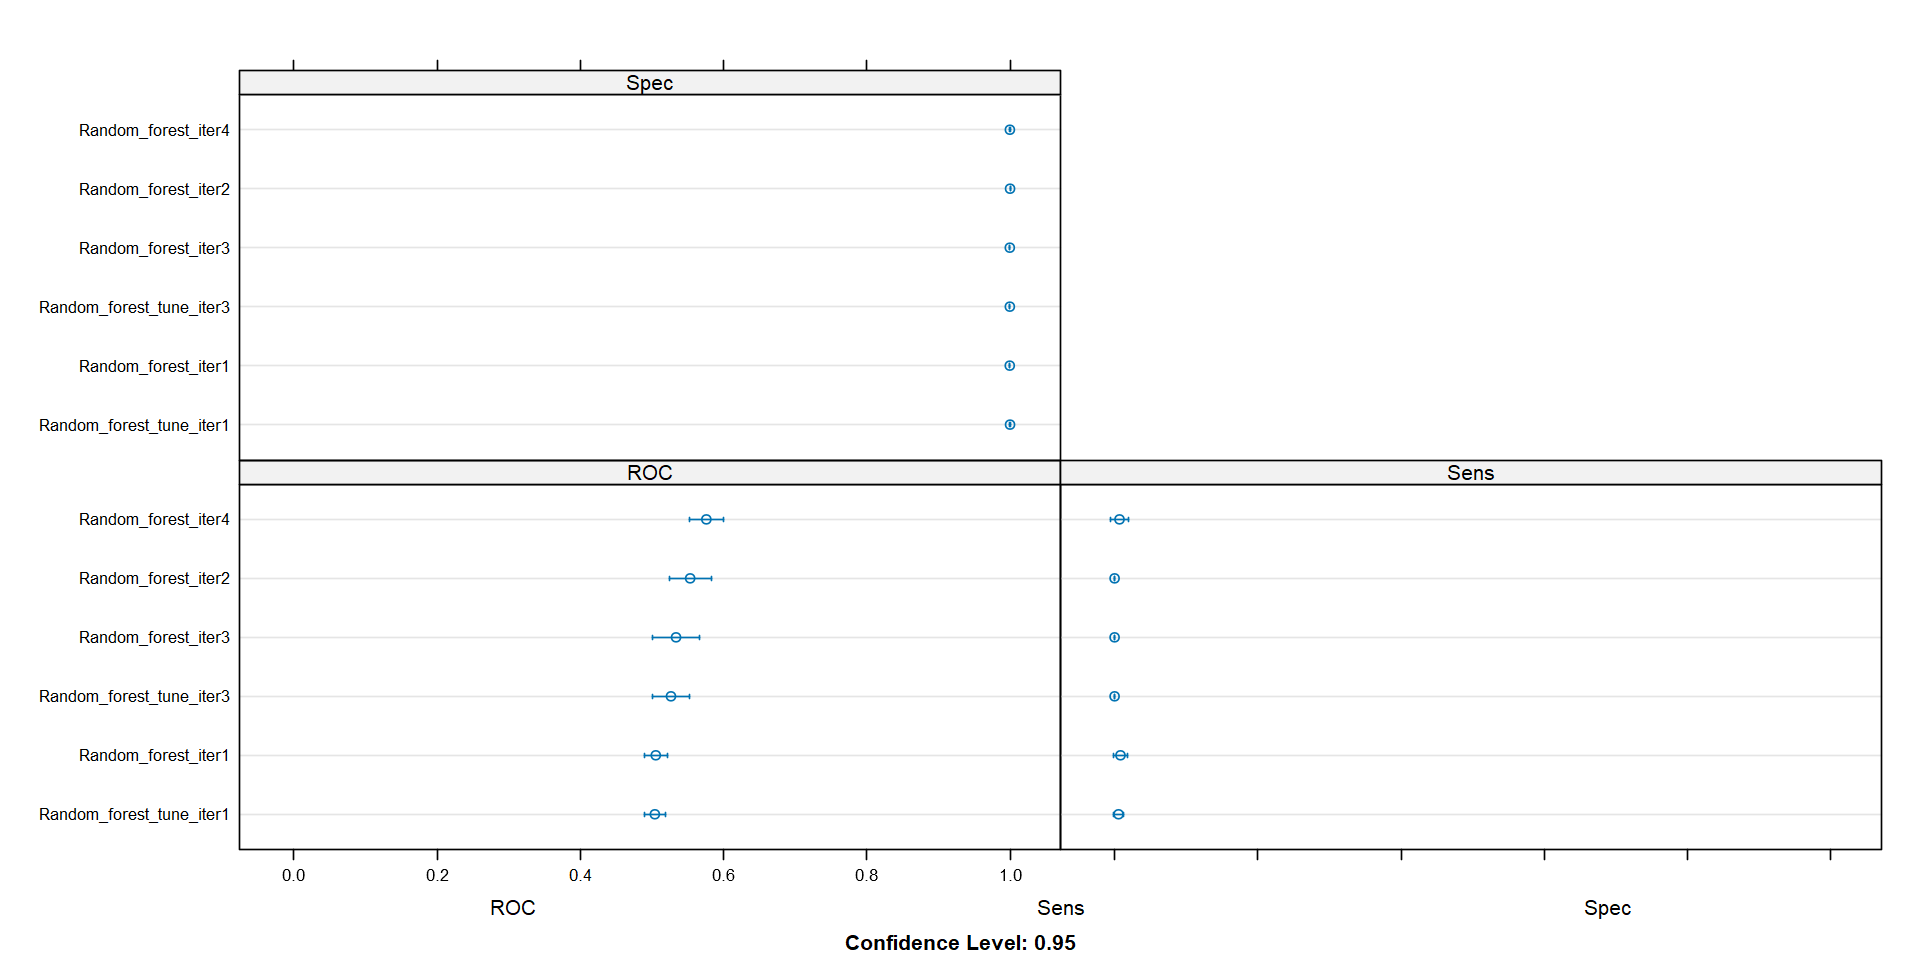

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

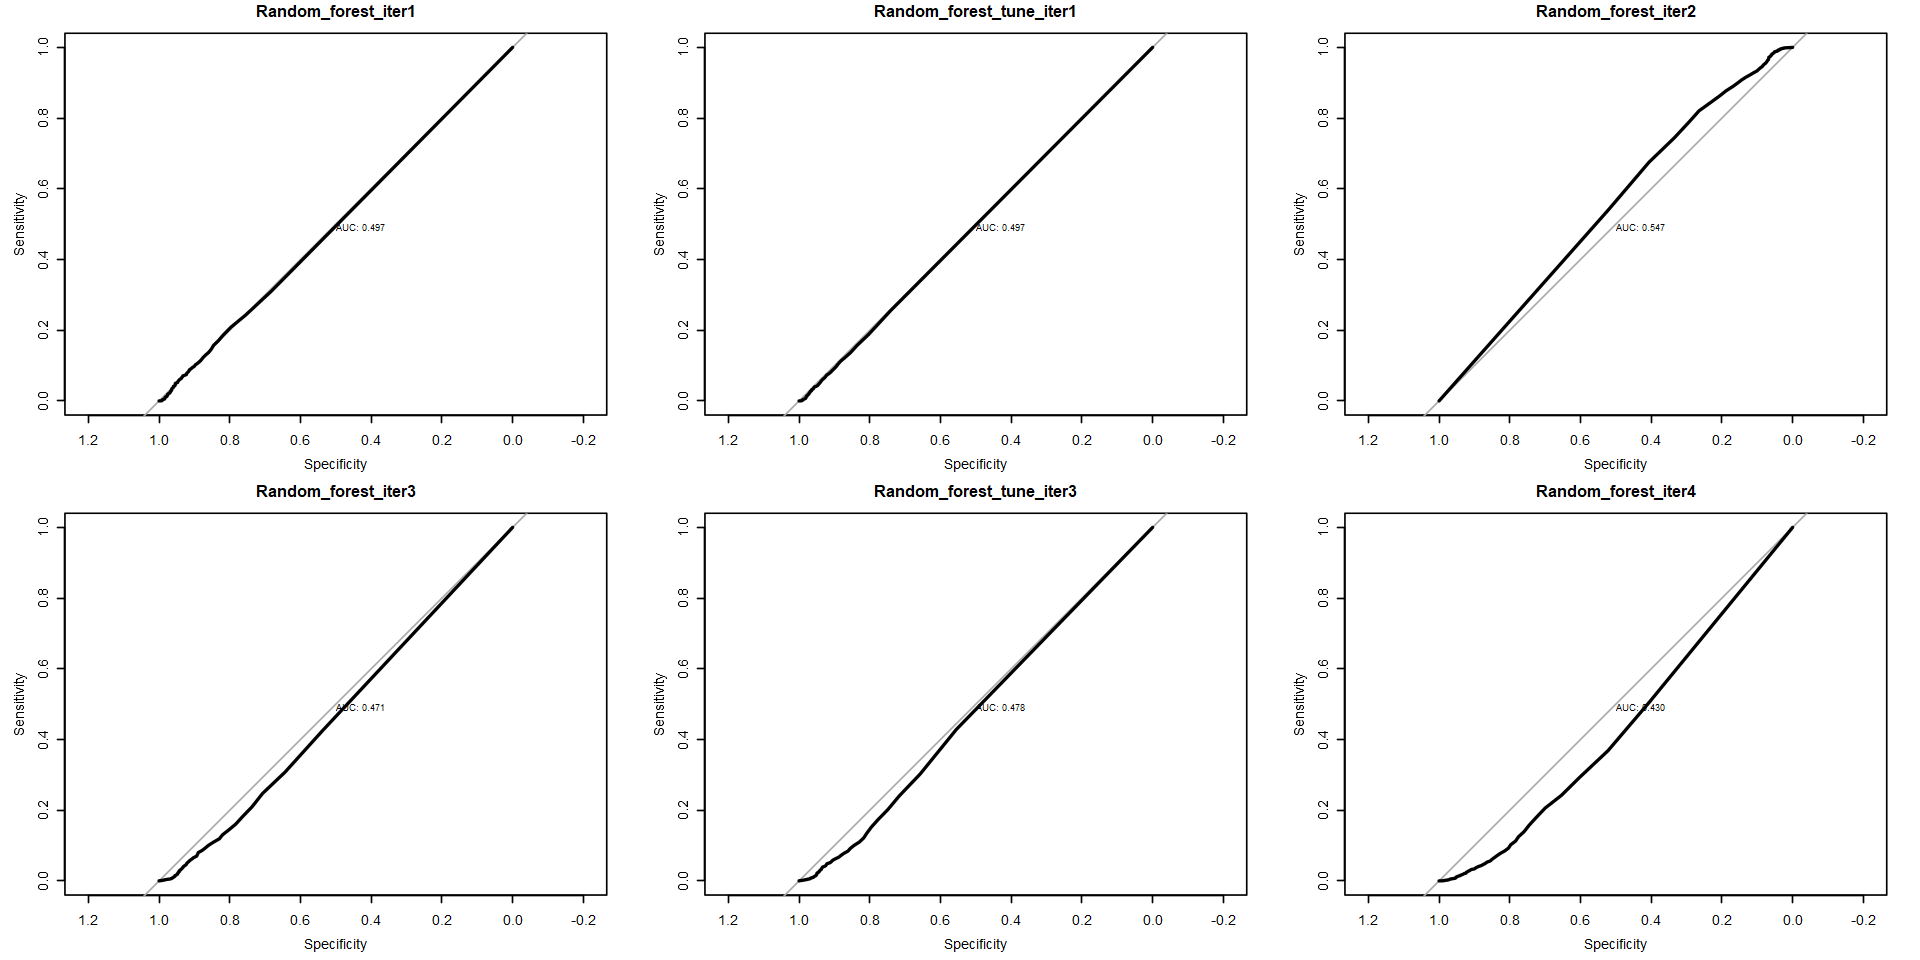

In [86]:
fit_models <- list(Random_forest_iter1 = model_RF, 
                   Random_forest_tune_iter1 = model_rf_tune,
                   Random_forest_iter2 = model_RF2,
                   Random_forest_iter3 = model_RF3,
                   Random_forest_tune_iter3 = model_rf_tune3,
                   Random_forest_iter4 = model_RF4)
results <- resamples(fit_models)
summary(results)
dotplot(results)
par(mfrow = c(2,3))
lapply(names(fit_models), function(name) {
  fit <- fit_models[[name]]
  plot.roc(fit$pred$obs, fit$pred$yes_buy,
           print.auc = TRUE)
  title(main = name, line = 3)
})

#### Iteration 5

The unbalanced data contributed to the poor results obtained in our classification models

There are methods to balance the data such as: Under-sampapling, over-sampling and Smote.

Under‐sampling: select a small part of the majority class examples and add them to the minority class cases

Over‐sampling: using some process to replicate the minority class examples

SMOTE: A method for over-sampling - artificially generates new examples of the minority class using the nearest neighbors of these cases. Furthermore, the majority class examples are also under‐sampled, leading to a more balanced dataset.

Let's test the oversampling method and see the results

#### Description of variables

In [88]:
library(psych)# library to run the describe function
# we use the data with the most important variables
class_customer_iter5 <- upSample(class_customer_iter3[, -ncol(class_customer_iter3)], class_customer_iter3$target)
describe(class_customer_iter5)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
real_monetary_value,1,68424,3.0004346,11.64989989,1.041667e+00,1.54916525,1.039550e+00,0.046479290,1474.42,1.474374e+03,49.4266970,4675.2473226,0.0445366928
avg_freight,2,68424,22.0474633,17.98009370,1.653000e+01,18.82954342,5.796966e+00,0.000000000,1002.29,1.002290e+03,7.6995885,192.2584494,0.0687365485
TM,3,68424,152.1430013,200.88326420,1.029600e+02,115.80207791,7.251397e+01,10.070000000,13664.08,1.365401e+04,10.7498322,390.2068185,0.7679616397
avg_price,4,68424,130.0955380,193.00037942,8.500000e+01,95.12019044,6.686526e+01,2.290000000,13440.00,1.343771e+04,11.3226951,427.4578657,0.7378259629
monetary_value,5,68424,164.7901326,214.73452568,1.073600e+02,123.00558805,7.779202e+01,10.070000000,13664.08,1.365401e+04,9.5758399,318.1951692,0.8209139726
real_frequency,6,68424,0.0207087,0.04893847,8.264463e-03,0.01246303,6.392814e-03,0.002777778,1.00,9.972222e-01,11.6950266,194.9134875,0.0001870881
recency,7,68424,133.8744008,92.94807562,1.220000e+02,126.92343807,1.141602e+02,1.000000000,360.00,3.590000e+02,0.4754470,-0.8656258,0.3553335159
life_time,8,68424,137.7370952,93.68631043,1.270000e+02,131.28582389,1.200906e+02,1.000000000,360.00,3.590000e+02,0.4279377,-0.9089298,0.3581557322
Class*,9,68424,1.5000000,0.50000365,1.500000e+00,1.50000000,7.413000e-01,1.000000000,2.00,1.000000e+00,0.0000000,-2.0000292,0.0019114764


#### Compare the initial target variable and the target after applying the oversampling method

In [89]:
table(class_customer_iter3$target)
table(class_customer_iter5$Class)


yes_buy not_buy 
    272   34212 


yes_buy not_buy 
  34212   34212 

This method created yes data in equal number to non-existing ones

#### Split data into training/test and define parameters for the model with new balanced data

Random Forest 

54740 samples
    8 predictor
    2 classes: 'yes_buy', 'not_buy' 

No pre-processing
Resampling: Cross-Validated (3 fold, repeated 2 times) 
Summary of sample sizes: 36493, 36494, 36493, 36493, 36494, 36493, ... 
Resampling results across tuning parameters:

  mtry  ROC        Sens  Spec     
  2     0.9996853  1     0.9968031
  5     0.9996697  1     0.9956156
  8     0.9996703  1     0.9949580

ROC was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.


Confusion Matrix and Statistics

          Reference
Prediction yes_buy not_buy
   yes_buy    6842      10
   not_buy       0    6832
                                          
               Accuracy : 0.9993          
                 95% CI : (0.9987, 0.9996)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9985          
                                          
 Mcnemar's Test P-Value : 0.004427        
                                          
            Sensitivity : 1.0000          
            Specificity : 0.9985          
         Pos Pred Value : 0.9985          
         Neg Pred Value : 1.0000          
              Precision : 0.9985          
                 Recall : 1.0000          
                     F1 : 0.9993          
             Prevalence : 0.5000          
         Detection Rate : 0.5000          
   Detection Prevalence : 0.5007          
      

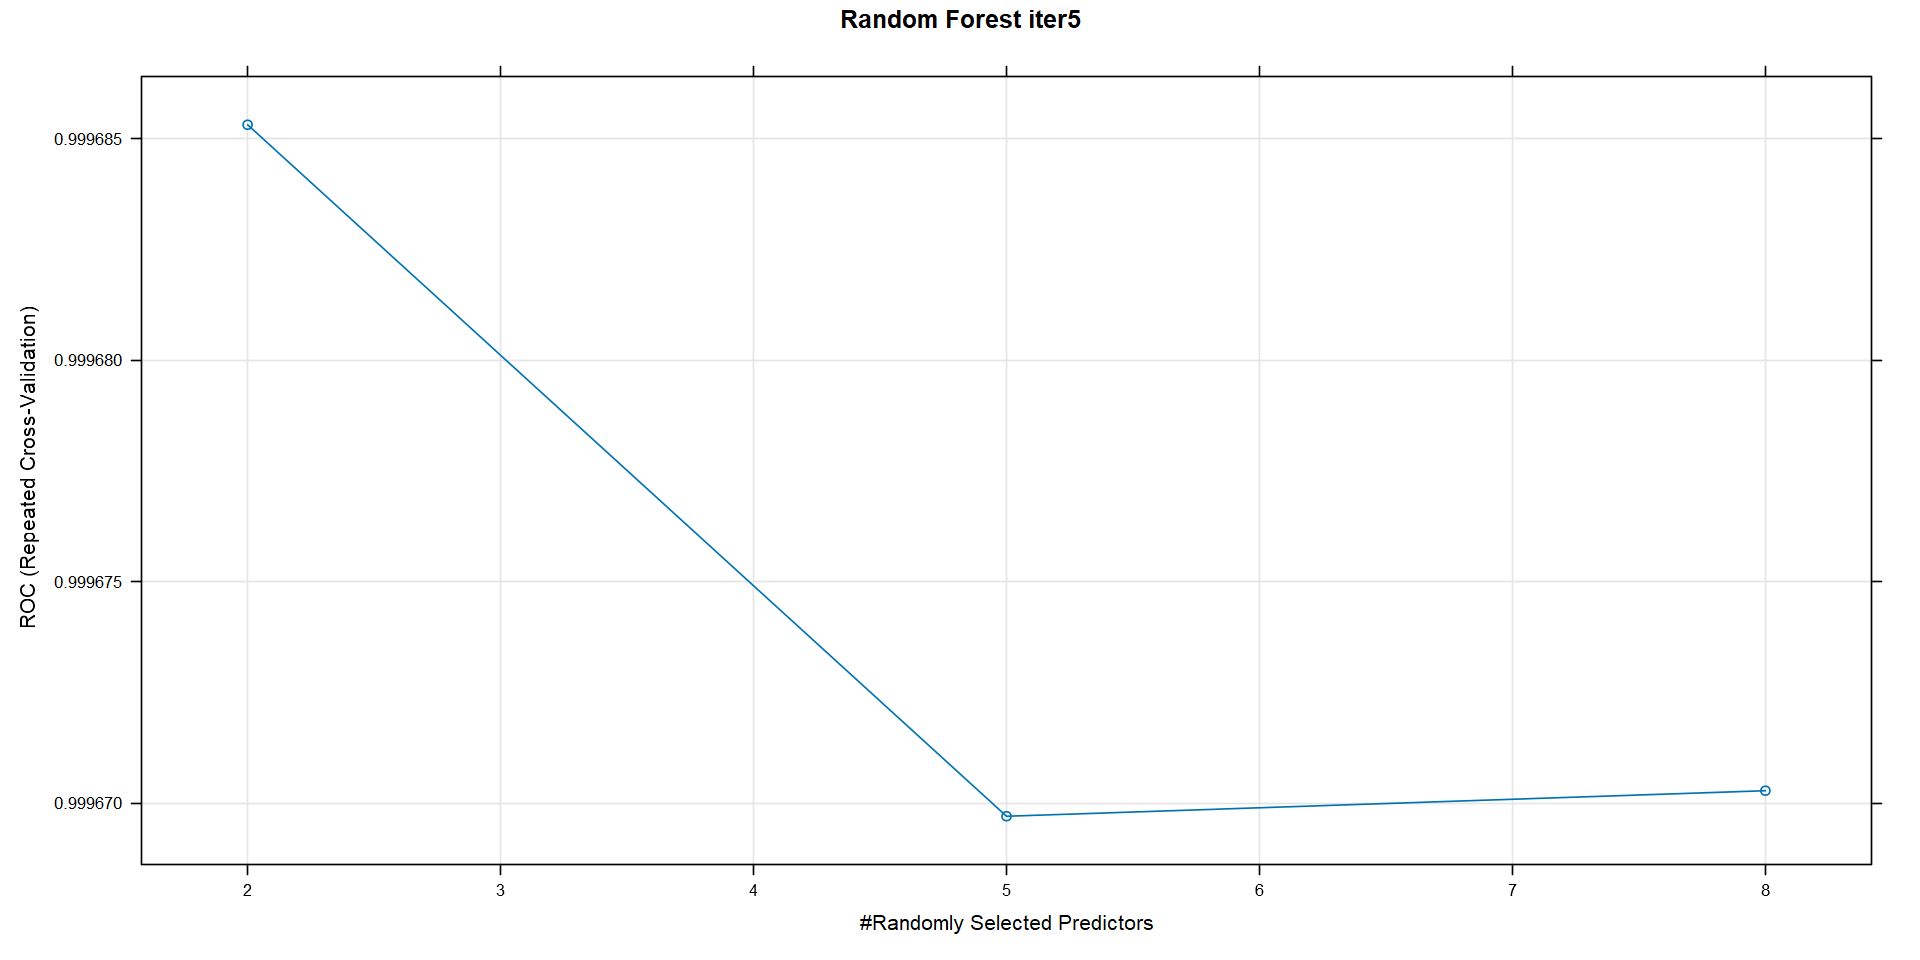

In [90]:
seed <- 377 
set.seed(seed)
train_index <- createDataPartition(class_customer_iter5$Class, p = 0.8, list = FALSE)
train_set <- class_customer_iter5[train_index, ]
test_set <- class_customer_iter5[-train_index, ]
metric <- "ROC"
control <- trainControl(method = "repeatedcv", 
                        number = 3, 
                        summaryFunction = twoClassSummary, 
                        classProbs = TRUE,
                        savePredictions = TRUE,
                        repeats = 2) 
# Train model
set.seed(seed)
model_RF_oversampling <- train(Class ~ .,
                               data = train_set,
                               method = 'rf',
                               metric = metric,
                               trControl = control)
# View model results
print(model_RF_oversampling)
# Plot ROC vs parameters used in the model
plot(model_RF_oversampling, main = "Random Forest iter5")
# Results
predictions_prob <- predict(model_RF_oversampling, test_set, type = "prob")
predictions_raw  <- predict(model_RF_oversampling, test_set, type = "raw")
# confusionMatrix
confusionMatrix(predictions_raw, test_set$Class, mode = "everything")

#### Compare models


Call:
summary.resamples(object = results)

Models: Random_forest_iter1, Random_forest_tune_iter1, Random_forest_iter2, Random_forest_iter3, Random_forest_tune_iter3, Random_forest_iter4, Random_forest_iter5 
Number of resamples: 6 

ROC 
                              Min.   1st Qu.    Median      Mean   3rd Qu.
Random_forest_iter1      0.4880607 0.4937968 0.5030762 0.5052373 0.5146232
Random_forest_tune_iter1 0.4851189 0.4944550 0.5037640 0.5039445 0.5146895
Random_forest_iter2      0.5283798 0.5401523 0.5442551 0.5532442 0.5533836
Random_forest_iter3      0.4937817 0.5131157 0.5340352 0.5335279 0.5470141
Random_forest_tune_iter3 0.4881374 0.5176032 0.5230682 0.5264488 0.5432487
Random_forest_iter4      0.5469806 0.5581671 0.5803695 0.5758414 0.5879718
Random_forest_iter5      0.9996103 0.9996682 0.9996954 0.9996853 0.9997213
                              Max. NA's
Random_forest_iter1      0.5280347    0
Random_forest_tune_iter1 0.5213365    0
Random_forest_iter2      0.6073637    0
R

Setting levels: control = yes_buy, case = not_buy

Setting direction: controls < cases

Setting levels: control = yes_buy, case = not_buy

Setting direction: controls < cases

Setting levels: control = yes_buy, case = not_buy

Setting direction: controls > cases

Setting levels: control = yes_buy, case = not_buy

Setting direction: controls < cases

Setting levels: control = yes_buy, case = not_buy

Setting direction: controls < cases

Setting levels: control = yes_buy, case = not_buy

Setting direction: controls < cases

Setting levels: control = yes_buy, case = not_buy

Setting direction: controls > cases



[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

                       Overall
real_monetary_value 100.000000
avg_freight          42.354859
TM                   79.220961
avg_price            46.171656
monetary_value       99.369764
real_frequency        3.496436
recency               0.000000
life_time             1.333136


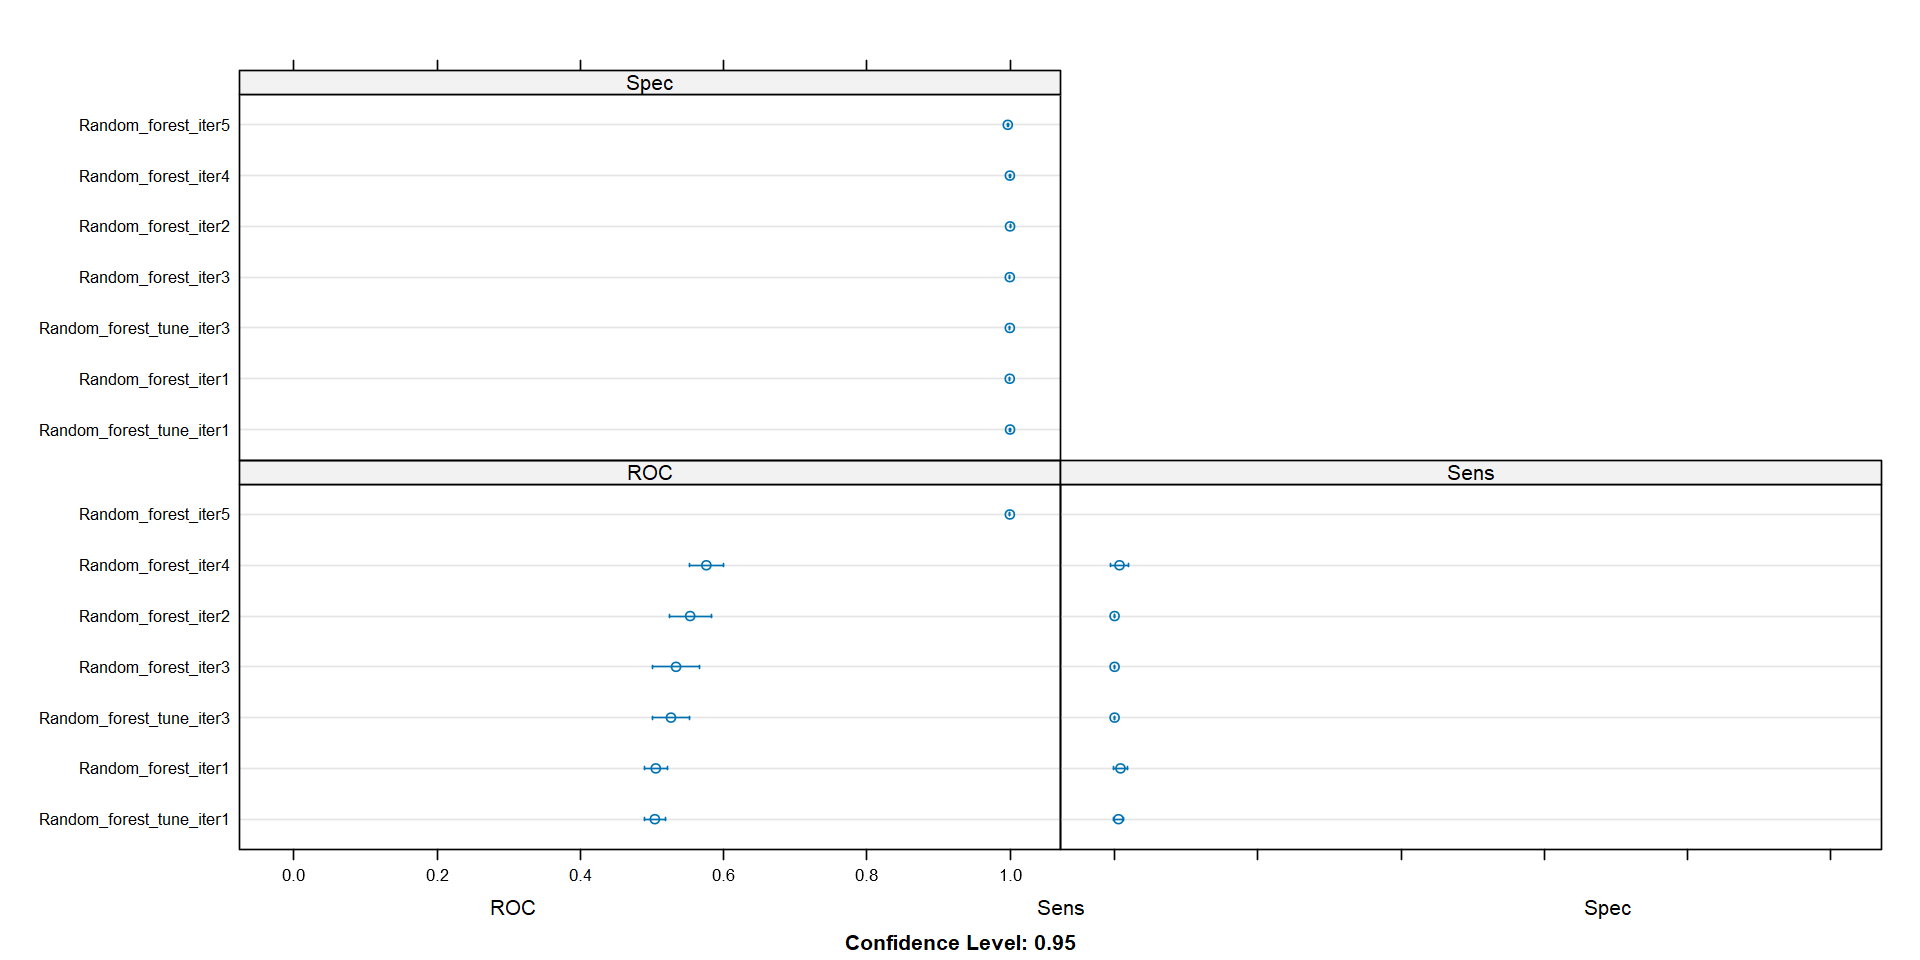

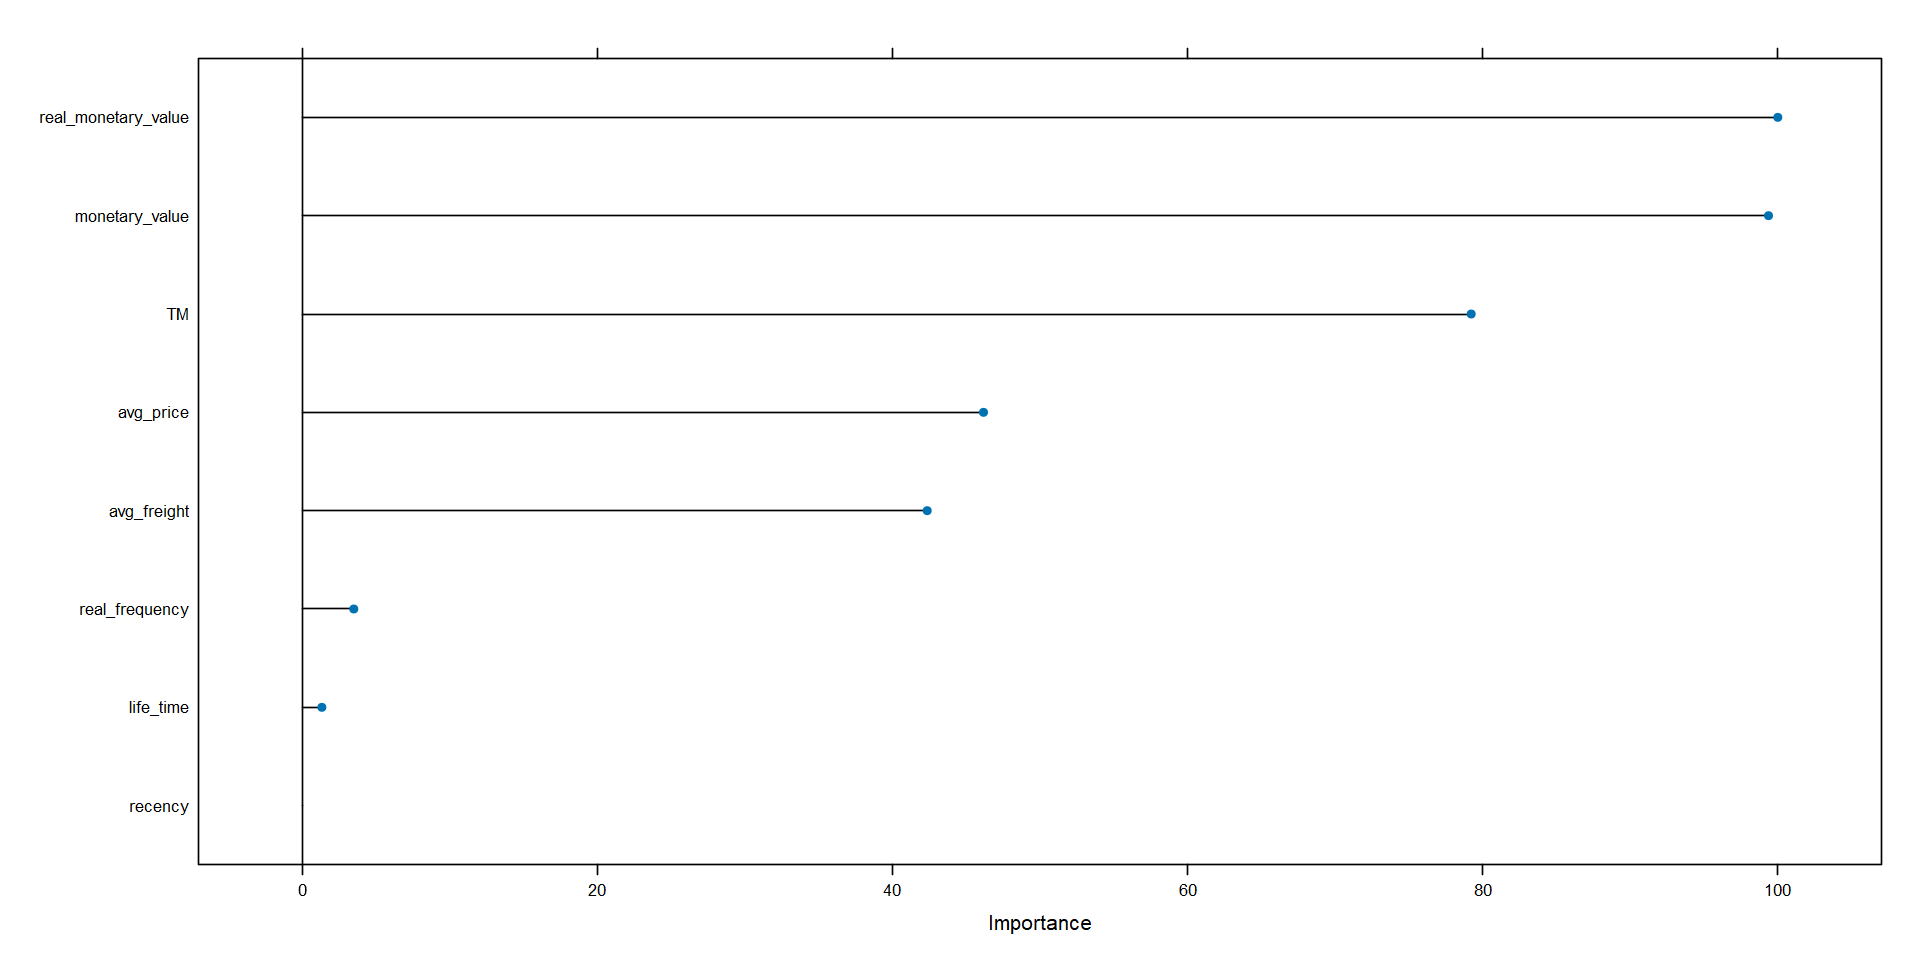

In [92]:
fit_models <- list(Random_forest_iter1 = model_RF, 
                   Random_forest_tune_iter1 = model_rf_tune,
                   Random_forest_iter2 = model_RF2,
                   Random_forest_iter3 = model_RF3,
                   Random_forest_tune_iter3 = model_rf_tune3,
                   Random_forest_iter4 = model_RF4,
                   Random_forest_iter5 = model_RF_oversampling)
results <- resamples(fit_models)
summary(results)
dotplot(results)
par(mfrow = c(3,3))
# Roc
lapply(names(fit_models), function(name) {
  fit <- fit_models[[name]]
  plot.roc(fit$pred$obs, fit$pred$yes_buy,
           print.auc = TRUE)
  title(main = name, line = 3)
})
# Getting the importance of variables
imp <- varImp(model_RF_oversampling)
# plot
plot(imp)
# Displaying the table with the importance of the variables
print(as.data.frame(imp$importance))

In this iteration the model achieved a good performance, however it will have difficulties in generalizing in new data. 

The model decides to classify customers who bought again based on real_monetary_value and monetary_value, which is not necessarily true. 

The fact that we used the oversampling method to balance the data originated this behavior of the model.

#### Iteration 6

For a better visualization in this iteration, and using data from iteration 5 (balanced data), let's create a Decision Tree model, in order to better see which feuters the model uses to classify customers.

#### Visualize model decision using decision tree

Confusion Matrix and Statistics

          Reference
Prediction yes_buy not_buy
   yes_buy    4496    2346
   not_buy    3196    3646
                                          
               Accuracy : 0.595           
                 95% CI : (0.5867, 0.6032)
    No Information Rate : 0.5621          
    P-Value [Acc > NIR] : 3.949e-15       
                                          
                  Kappa : 0.19            
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.5845          
            Specificity : 0.6085          
         Pos Pred Value : 0.6571          
         Neg Pred Value : 0.5329          
             Prevalence : 0.5621          
         Detection Rate : 0.3286          
   Detection Prevalence : 0.5000          
      Balanced Accuracy : 0.5965          
                                          
       'Positive' Class : yes_buy         
      

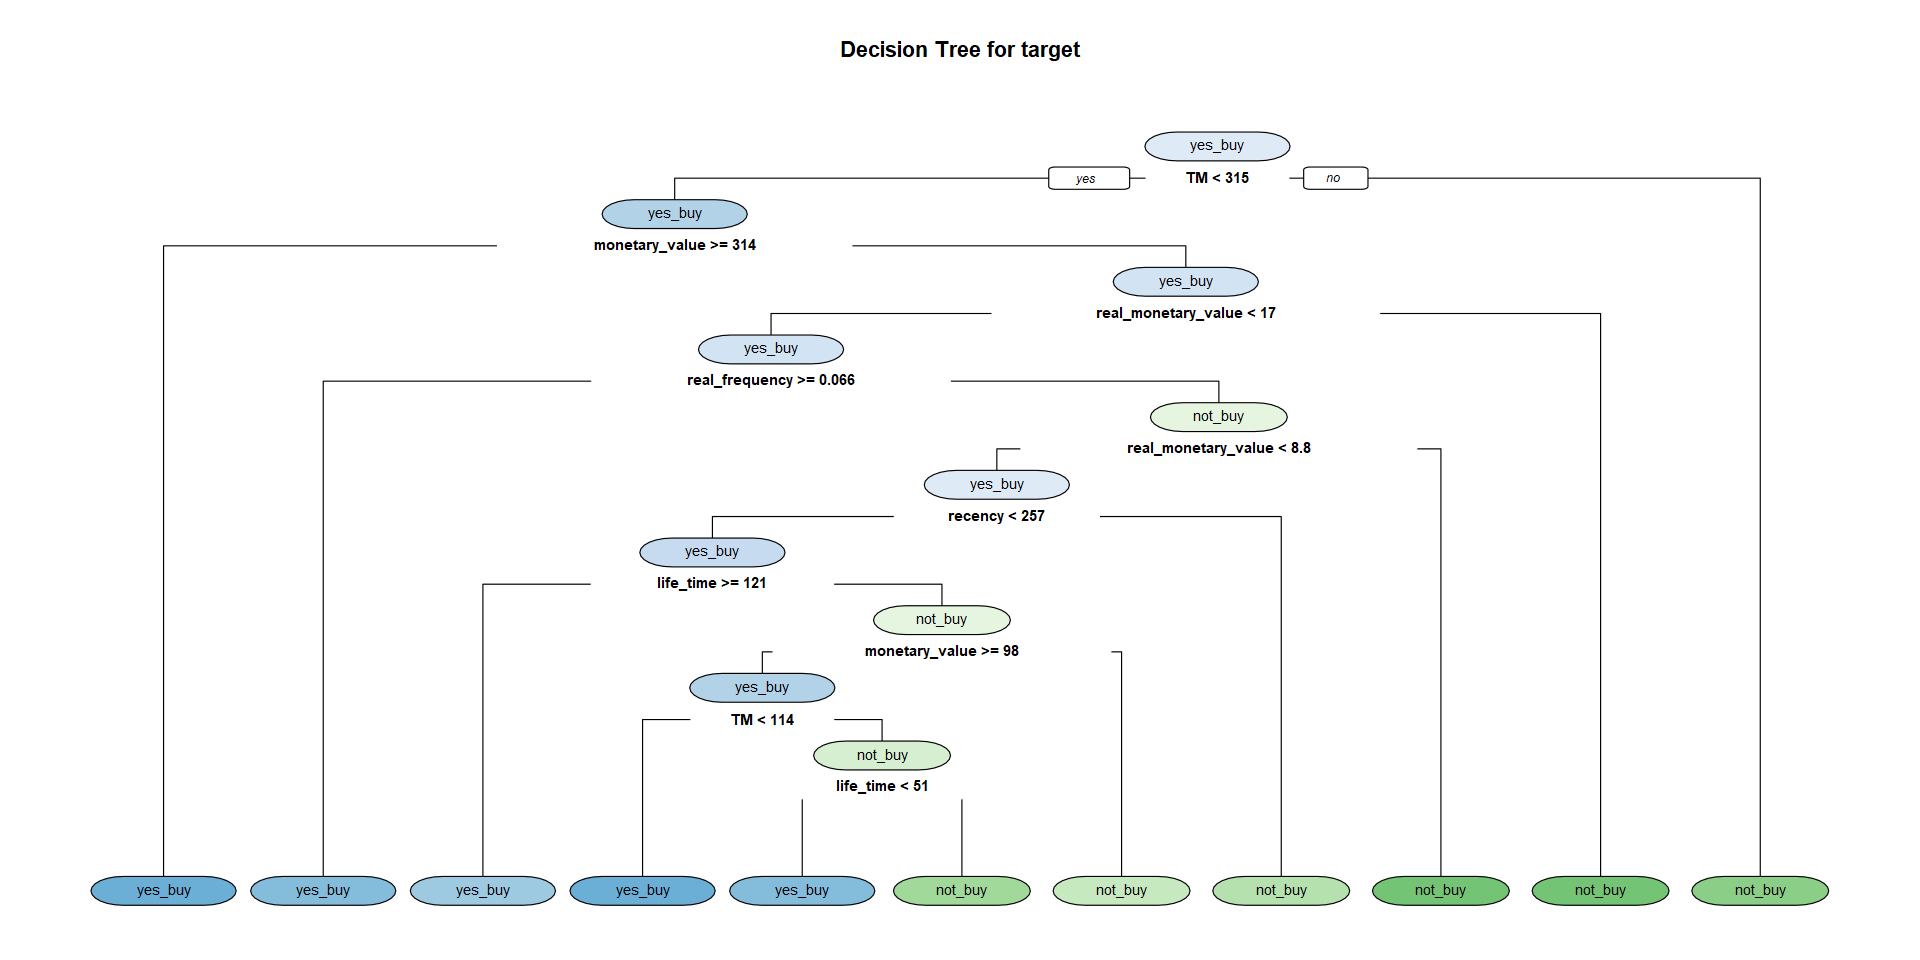

In [96]:
# Fit model
metric <- "ROC"
control <- trainControl(method = "repeatedcv", 
                        number = 3, 
                        summaryFunction = twoClassSummary, 
                        classProbs = TRUE,
                        savePredictions = FALSE,
                        repeats =2) 
# Decision Tree Model
model_tree <- rpart(Class ~ ., data = train_set) 
# See decision tree
rpart.plot(model_tree,
           main = "Decision Tree for target",
           type = 2,
           extra = 0)
# Decision Tree Model Predictions
prediction.dt <- predict(model_tree,
                         test_set,
                         type = "class")
# ConfusionMatrix
confusionMatrix(data = test_set$Class,
                reference = prediction.dt)

#### Decision Tree Model with Cross-Validation

In [97]:
model_DT <- train(Class ~ .,
                  data = train_set,
                  method = 'rpart',
                  metric = metric,
                  trControl = control)
# Predictions
predictions_prob <- predict(model_DT, test_set, type = "prob")
predictions_raw  <- predict(model_DT, test_set, type = "raw")
# ConfusionMatrix
confusionMatrix(predictions_raw, test_set$Class, mode = "everything")

Confusion Matrix and Statistics

          Reference
Prediction yes_buy not_buy
   yes_buy    4496    3196
   not_buy    2346    3646
                                          
               Accuracy : 0.595           
                 95% CI : (0.5867, 0.6032)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.19            
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.6571          
            Specificity : 0.5329          
         Pos Pred Value : 0.5845          
         Neg Pred Value : 0.6085          
              Precision : 0.5845          
                 Recall : 0.6571          
                     F1 : 0.6187          
             Prevalence : 0.5000          
         Detection Rate : 0.3286          
   Detection Prevalence : 0.5621          
      

With balanced data, Decision tree models had poor results. We therefore conclude that data balancing will not be a valid option to apply to our original data.

#### Conclusion

The forecast models did not show conclusive results, mainly because the available data are unbalanced.

We performed a teration with the data balanced by the undersampling method, which presented very good results. The model may be overfiting.

We think that with more data from the minority class (class of those who buy again) it would possibly generate better results.

In the case of K-means, the results were good, and we could implement the model to the business. By adding new features, such as the customer's geographic location, purchase cost (acquisition cost), among others, the model could improve and segment more efficient way.